In [1]:
%matplotlib notebook
from matplotlib.pyplot import *

import sys
toadd = '..'
if toadd not in sys.path:
    b = sys.path
    sys.path = [toadd] + b

import glob
import os
import numpy as np

from transfer_learning import TransferLearning, TransferLearningDisplay
from data_processing import MedianFilterData, ZoomData, GrayScaleData
from cutouts import BasicCutouts, BlobCutouts
from fingerprint import FingerprintResnet, FingerprintInceptionV3
from similarity import tSNE, Jaccard

import logging
logging.basicConfig(format='%(levelname)-6s: %(name)-10s %(asctime)-15s  %(message)s')
log = logging.getLogger("Runme")
log.setLevel(logging.WARNING)

# Input and Output Directories

In [2]:
input_file_pattern = 'acs_Halpha/*fits.gz'
output_directory = './'

input_files = glob.glob(input_file_pattern)

# Setup Fingerprint Calculator

In [3]:
fingerprint_inceptionv3 = FingerprintInceptionV3()

Using TensorFlow backend.


# Setup Pre-Processing of Data

In [9]:
data_processing = [MedianFilterData((3,3))]

#  Create Cutout 

In [10]:
basic_cutouts = BasicCutouts(output_size=224, step_size=112)

# Create Data Processing Instance

In [11]:
tl = TransferLearning(basic_cutouts, data_processing, fingerprint_inceptionv3)
tl.set_files(input_files)

# Calculate Fingerprints

In [12]:
fingerprints = tl.calculate(display=False)

INFO  : TransferLearning 2018-02-22 22:18:14,146  Processing filename acs_Halpha/j8dw04010_drz.fits.gz
INFO  : Fingerprint 2018-02-22 22:18:17,910  Calculate 200 predictions took 0.44886016845703125s
INFO  : Fingerprint 2018-02-22 22:18:18,031  Calculate 200 predictions took 0.11952900886535645s
INFO  : Fingerprint 2018-02-22 22:18:18,156  Calculate 200 predictions took 0.12479114532470703s
INFO  : Fingerprint 2018-02-22 22:18:18,290  Calculate 200 predictions took 0.1327190399169922s
INFO  : Fingerprint 2018-02-22 22:18:18,420  Calculate 200 predictions took 0.12941193580627441s
INFO  : Fingerprint 2018-02-22 22:18:18,554  Calculate 200 predictions took 0.13329505920410156s
INFO  : Fingerprint 2018-02-22 22:18:18,683  Calculate 200 predictions took 0.12771010398864746s
INFO  : Fingerprint 2018-02-22 22:18:18,818  Calculate 200 predictions took 0.13508200645446777s
INFO  : Fingerprint 2018-02-22 22:18:18,953  Calculate 200 predictions took 0.1340470314025879s
INFO  : Fingerprint 2018-0

INFO  : Fingerprint 2018-02-22 22:18:30,427  Calculate 200 predictions took 0.17870211601257324s
INFO  : Fingerprint 2018-02-22 22:18:30,595  Calculate 200 predictions took 0.16742515563964844s
INFO  : Fingerprint 2018-02-22 22:18:30,764  Calculate 200 predictions took 0.16831493377685547s
INFO  : Fingerprint 2018-02-22 22:18:30,937  Calculate 200 predictions took 0.17245221138000488s
INFO  : Fingerprint 2018-02-22 22:18:31,116  Calculate 200 predictions took 0.17766404151916504s
INFO  : Fingerprint 2018-02-22 22:18:31,296  Calculate 200 predictions took 0.17934703826904297s
INFO  : Fingerprint 2018-02-22 22:18:31,532  Calculate 200 predictions took 0.2351970672607422s
INFO  : Fingerprint 2018-02-22 22:18:31,725  Calculate 200 predictions took 0.19190120697021484s
INFO  : Fingerprint 2018-02-22 22:18:31,895  Calculate 200 predictions took 0.16887211799621582s
INFO  : Fingerprint 2018-02-22 22:18:32,066  Calculate 200 predictions took 0.17037701606750488s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:18:46,600  Calculate 200 predictions took 0.17543816566467285s
INFO  : Fingerprint 2018-02-22 22:18:46,773  Calculate 200 predictions took 0.17213797569274902s
INFO  : Fingerprint 2018-02-22 22:18:46,943  Calculate 200 predictions took 0.169342041015625s
INFO  : Fingerprint 2018-02-22 22:18:47,135  Calculate 200 predictions took 0.19124579429626465s
INFO  : Fingerprint 2018-02-22 22:18:47,343  Calculate 200 predictions took 0.2071549892425537s
INFO  : Fingerprint 2018-02-22 22:18:47,523  Calculate 200 predictions took 0.17902374267578125s
INFO  : Fingerprint 2018-02-22 22:18:47,700  Calculate 200 predictions took 0.17680573463439941s
INFO  : Fingerprint 2018-02-22 22:18:47,908  Calculate 200 predictions took 0.20646309852600098s
INFO  : Fingerprint 2018-02-22 22:18:48,104  Calculate 200 predictions took 0.19493913650512695s
INFO  : Fingerprint 2018-02-22 22:18:48,294  Calculate 200 predictions took 0.18912529945373535s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:19:01,386  Calculate 200 predictions took 0.15830206871032715s
INFO  : Fingerprint 2018-02-22 22:19:01,547  Calculate 200 predictions took 0.1607520580291748s
INFO  : Fingerprint 2018-02-22 22:19:01,707  Calculate 200 predictions took 0.1591932773590088s
INFO  : Fingerprint 2018-02-22 22:19:01,870  Calculate 200 predictions took 0.16180109977722168s
INFO  : Fingerprint 2018-02-22 22:19:02,031  Calculate 200 predictions took 0.15984272956848145s
INFO  : Fingerprint 2018-02-22 22:19:02,202  Calculate 200 predictions took 0.170180082321167s
INFO  : Fingerprint 2018-02-22 22:19:02,360  Calculate 200 predictions took 0.15787696838378906s
INFO  : Fingerprint 2018-02-22 22:19:02,517  Calculate 200 predictions took 0.1559607982635498s
INFO  : Fingerprint 2018-02-22 22:19:02,680  Calculate 200 predictions took 0.16263294219970703s
INFO  : Fingerprint 2018-02-22 22:19:02,841  Calculate 200 predictions took 0.16000795364379883s
INFO  : Fingerprint 2018-02-22 22:1

INFO  : Fingerprint 2018-02-22 22:19:15,595  Calculate 200 predictions took 0.1638040542602539s
INFO  : Fingerprint 2018-02-22 22:19:15,756  Calculate 200 predictions took 0.16003775596618652s
INFO  : Fingerprint 2018-02-22 22:19:15,921  Calculate 200 predictions took 0.16437482833862305s
INFO  : Fingerprint 2018-02-22 22:19:16,087  Calculate 200 predictions took 0.1650831699371338s
INFO  : Fingerprint 2018-02-22 22:19:16,260  Calculate 200 predictions took 0.17244815826416016s
INFO  : Fingerprint 2018-02-22 22:19:16,429  Calculate 200 predictions took 0.16806292533874512s
INFO  : Fingerprint 2018-02-22 22:19:16,620  Calculate 200 predictions took 0.19022274017333984s
INFO  : Fingerprint 2018-02-22 22:19:16,790  Calculate 200 predictions took 0.16927814483642578s
INFO  : Fingerprint 2018-02-22 22:19:16,959  Calculate 200 predictions took 0.16761112213134766s
INFO  : Fingerprint 2018-02-22 22:19:17,119  Calculate 200 predictions took 0.15913701057434082s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:19:29,788  Calculate 200 predictions took 0.17471790313720703s
INFO  : Fingerprint 2018-02-22 22:19:29,964  Calculate 200 predictions took 0.17470979690551758s
INFO  : Fingerprint 2018-02-22 22:19:30,143  Calculate 200 predictions took 0.1777489185333252s
INFO  : Fingerprint 2018-02-22 22:19:30,331  Calculate 200 predictions took 0.18788504600524902s
INFO  : Fingerprint 2018-02-22 22:19:30,499  Calculate 200 predictions took 0.1669769287109375s
INFO  : Fingerprint 2018-02-22 22:19:30,681  Calculate 200 predictions took 0.18104290962219238s
INFO  : Fingerprint 2018-02-22 22:19:30,857  Calculate 200 predictions took 0.17506003379821777s
INFO  : Fingerprint 2018-02-22 22:19:31,037  Calculate 200 predictions took 0.1791222095489502s
INFO  : Fingerprint 2018-02-22 22:19:31,221  Calculate 200 predictions took 0.1827380657196045s
INFO  : Fingerprint 2018-02-22 22:19:31,412  Calculate 200 predictions took 0.19008612632751465s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:19:45,894  Calculate 200 predictions took 0.17077279090881348s
INFO  : Fingerprint 2018-02-22 22:19:46,071  Calculate 200 predictions took 0.17613506317138672s
INFO  : Fingerprint 2018-02-22 22:19:46,258  Calculate 200 predictions took 0.1864299774169922s
INFO  : Fingerprint 2018-02-22 22:19:46,462  Calculate 200 predictions took 0.20254898071289062s
INFO  : Fingerprint 2018-02-22 22:19:46,646  Calculate 200 predictions took 0.18266010284423828s
INFO  : Fingerprint 2018-02-22 22:19:46,869  Calculate 200 predictions took 0.22243189811706543s
INFO  : Fingerprint 2018-02-22 22:19:47,056  Calculate 200 predictions took 0.18618488311767578s
INFO  : Fingerprint 2018-02-22 22:19:47,244  Calculate 200 predictions took 0.18663692474365234s
INFO  : Fingerprint 2018-02-22 22:19:47,432  Calculate 200 predictions took 0.18741130828857422s
INFO  : Fingerprint 2018-02-22 22:19:47,632  Calculate 200 predictions took 0.1984851360321045s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:20:00,031  Calculate 200 predictions took 0.14320898056030273s
INFO  : Fingerprint 2018-02-22 22:20:00,178  Calculate 200 predictions took 0.14697718620300293s
INFO  : Fingerprint 2018-02-22 22:20:00,324  Calculate 200 predictions took 0.14469504356384277s
INFO  : Fingerprint 2018-02-22 22:20:00,473  Calculate 200 predictions took 0.14793896675109863s
INFO  : Fingerprint 2018-02-22 22:20:00,620  Calculate 200 predictions took 0.14673304557800293s
INFO  : Fingerprint 2018-02-22 22:20:00,765  Calculate 200 predictions took 0.1443619728088379s
INFO  : Fingerprint 2018-02-22 22:20:00,910  Calculate 200 predictions took 0.1442108154296875s
INFO  : Fingerprint 2018-02-22 22:20:01,053  Calculate 200 predictions took 0.1417689323425293s
INFO  : Fingerprint 2018-02-22 22:20:01,208  Calculate 200 predictions took 0.15417003631591797s
INFO  : Fingerprint 2018-02-22 22:20:01,343  Calculate 200 predictions took 0.13437795639038086s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:20:12,779  Calculate 200 predictions took 0.15129494667053223s
INFO  : Fingerprint 2018-02-22 22:20:12,932  Calculate 200 predictions took 0.15267300605773926s
INFO  : Fingerprint 2018-02-22 22:20:13,088  Calculate 200 predictions took 0.15528297424316406s
INFO  : Fingerprint 2018-02-22 22:20:13,246  Calculate 200 predictions took 0.15697979927062988s
INFO  : Fingerprint 2018-02-22 22:20:13,403  Calculate 200 predictions took 0.15662121772766113s
INFO  : Fingerprint 2018-02-22 22:20:13,556  Calculate 200 predictions took 0.15162897109985352s
INFO  : Fingerprint 2018-02-22 22:20:13,704  Calculate 200 predictions took 0.14739036560058594s
INFO  : Fingerprint 2018-02-22 22:20:13,851  Calculate 200 predictions took 0.14622998237609863s
INFO  : Fingerprint 2018-02-22 22:20:14,000  Calculate 200 predictions took 0.1482400894165039s
INFO  : Fingerprint 2018-02-22 22:20:14,166  Calculate 200 predictions took 0.16469407081604004s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:20:25,629  Calculate 200 predictions took 0.14532089233398438s
INFO  : Fingerprint 2018-02-22 22:20:25,769  Calculate 200 predictions took 0.13937902450561523s
INFO  : Fingerprint 2018-02-22 22:20:25,906  Calculate 200 predictions took 0.13655805587768555s
INFO  : Fingerprint 2018-02-22 22:20:26,049  Calculate 200 predictions took 0.14167094230651855s
INFO  : Fingerprint 2018-02-22 22:20:26,210  Calculate 200 predictions took 0.16045188903808594s
INFO  : Fingerprint 2018-02-22 22:20:26,390  Calculate 200 predictions took 0.1795639991760254s
INFO  : Fingerprint 2018-02-22 22:20:26,549  Calculate 200 predictions took 0.1577620506286621s
INFO  : Fingerprint 2018-02-22 22:20:26,700  Calculate 200 predictions took 0.15022611618041992s
INFO  : Fingerprint 2018-02-22 22:20:26,840  Calculate 200 predictions took 0.1394047737121582s
INFO  : Fingerprint 2018-02-22 22:20:26,992  Calculate 200 predictions took 0.1513369083404541s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:20:38,428  Calculate 200 predictions took 0.1660318374633789s
INFO  : Fingerprint 2018-02-22 22:20:38,592  Calculate 200 predictions took 0.1633152961730957s
INFO  : Fingerprint 2018-02-22 22:20:38,742  Calculate 200 predictions took 0.1497361660003662s
INFO  : Fingerprint 2018-02-22 22:20:38,890  Calculate 200 predictions took 0.14667487144470215s
INFO  : Fingerprint 2018-02-22 22:20:39,038  Calculate 200 predictions took 0.14785194396972656s
INFO  : Fingerprint 2018-02-22 22:20:39,191  Calculate 200 predictions took 0.15204596519470215s
INFO  : Fingerprint 2018-02-22 22:20:39,345  Calculate 200 predictions took 0.15319490432739258s
INFO  : Fingerprint 2018-02-22 22:20:39,493  Calculate 200 predictions took 0.14700913429260254s
INFO  : Fingerprint 2018-02-22 22:20:39,648  Calculate 200 predictions took 0.15448403358459473s
INFO  : Fingerprint 2018-02-22 22:20:39,793  Calculate 200 predictions took 0.14339089393615723s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:20:51,048  Calculate 200 predictions took 0.1437549591064453s
INFO  : Fingerprint 2018-02-22 22:20:51,201  Calculate 200 predictions took 0.15152406692504883s
INFO  : Fingerprint 2018-02-22 22:20:51,343  Calculate 200 predictions took 0.14157414436340332s
INFO  : Fingerprint 2018-02-22 22:20:51,496  Calculate 200 predictions took 0.15195894241333008s
INFO  : Fingerprint 2018-02-22 22:20:51,642  Calculate 200 predictions took 0.14548397064208984s
INFO  : Fingerprint 2018-02-22 22:20:51,802  Calculate 200 predictions took 0.15903902053833008s
INFO  : Fingerprint 2018-02-22 22:20:51,984  Calculate 200 predictions took 0.18172717094421387s
INFO  : Fingerprint 2018-02-22 22:20:52,180  Calculate 200 predictions took 0.19446563720703125s
INFO  : Fingerprint 2018-02-22 22:20:52,339  Calculate 200 predictions took 0.1581709384918213s
INFO  : Fingerprint 2018-02-22 22:20:52,506  Calculate 200 predictions took 0.1668701171875s
INFO  : Fingerprint 2018-02-22 22:20

INFO  : Fingerprint 2018-02-22 22:21:04,446  Calculate 200 predictions took 0.1536240577697754s
INFO  : Fingerprint 2018-02-22 22:21:04,601  Calculate 200 predictions took 0.15384984016418457s
INFO  : Fingerprint 2018-02-22 22:21:04,750  Calculate 200 predictions took 0.1486191749572754s
INFO  : Fingerprint 2018-02-22 22:21:04,898  Calculate 200 predictions took 0.1473221778869629s
INFO  : Fingerprint 2018-02-22 22:21:05,042  Calculate 200 predictions took 0.14327406883239746s
INFO  : Fingerprint 2018-02-22 22:21:05,181  Calculate 200 predictions took 0.1376798152923584s
INFO  : Fingerprint 2018-02-22 22:21:05,319  Calculate 200 predictions took 0.13756799697875977s
INFO  : Fingerprint 2018-02-22 22:21:05,463  Calculate 200 predictions took 0.14261817932128906s
INFO  : Fingerprint 2018-02-22 22:21:05,608  Calculate 200 predictions took 0.14420485496520996s
INFO  : Fingerprint 2018-02-22 22:21:05,755  Calculate 200 predictions took 0.14686107635498047s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:21:18,222  Calculate 200 predictions took 0.1577928066253662s
INFO  : Fingerprint 2018-02-22 22:21:18,389  Calculate 200 predictions took 0.16558599472045898s
INFO  : Fingerprint 2018-02-22 22:21:18,556  Calculate 200 predictions took 0.16640615463256836s
INFO  : Fingerprint 2018-02-22 22:21:18,698  Calculate 200 predictions took 0.14138007164001465s
INFO  : Fingerprint 2018-02-22 22:21:18,842  Calculate 200 predictions took 0.14351892471313477s
INFO  : Fingerprint 2018-02-22 22:21:18,991  Calculate 200 predictions took 0.1477665901184082s
INFO  : Fingerprint 2018-02-22 22:21:19,138  Calculate 200 predictions took 0.1464099884033203s
INFO  : Fingerprint 2018-02-22 22:21:19,288  Calculate 200 predictions took 0.1496729850769043s
INFO  : Fingerprint 2018-02-22 22:21:19,444  Calculate 200 predictions took 0.1541919708251953s
INFO  : Fingerprint 2018-02-22 22:21:19,592  Calculate 200 predictions took 0.14696979522705078s
INFO  : Fingerprint 2018-02-22 22:2

INFO  : Fingerprint 2018-02-22 22:21:31,083  Calculate 200 predictions took 0.15189886093139648s
INFO  : Fingerprint 2018-02-22 22:21:31,236  Calculate 200 predictions took 0.15154099464416504s
INFO  : Fingerprint 2018-02-22 22:21:31,384  Calculate 200 predictions took 0.14777708053588867s
INFO  : Fingerprint 2018-02-22 22:21:31,532  Calculate 200 predictions took 0.1472761631011963s
INFO  : Fingerprint 2018-02-22 22:21:31,679  Calculate 200 predictions took 0.14619207382202148s
INFO  : Fingerprint 2018-02-22 22:21:31,829  Calculate 200 predictions took 0.14905214309692383s
INFO  : Fingerprint 2018-02-22 22:21:31,980  Calculate 200 predictions took 0.1497180461883545s
INFO  : Fingerprint 2018-02-22 22:21:32,129  Calculate 200 predictions took 0.14819884300231934s
INFO  : Fingerprint 2018-02-22 22:21:32,273  Calculate 200 predictions took 0.14412498474121094s
INFO  : Fingerprint 2018-02-22 22:21:32,419  Calculate 200 predictions took 0.14502191543579102s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:21:43,926  Calculate 200 predictions took 0.15533113479614258s
INFO  : Fingerprint 2018-02-22 22:21:44,073  Calculate 200 predictions took 0.14626717567443848s
INFO  : Fingerprint 2018-02-22 22:21:44,226  Calculate 200 predictions took 0.15218186378479004s
INFO  : Fingerprint 2018-02-22 22:21:44,366  Calculate 200 predictions took 0.1387639045715332s
INFO  : Fingerprint 2018-02-22 22:21:44,509  Calculate 200 predictions took 0.14289402961730957s
INFO  : Fingerprint 2018-02-22 22:21:44,661  Calculate 200 predictions took 0.15112709999084473s
INFO  : Fingerprint 2018-02-22 22:21:44,803  Calculate 200 predictions took 0.1413259506225586s
INFO  : Fingerprint 2018-02-22 22:21:44,942  Calculate 200 predictions took 0.13788485527038574s
INFO  : Fingerprint 2018-02-22 22:21:45,092  Calculate 200 predictions took 0.1486358642578125s
INFO  : Fingerprint 2018-02-22 22:21:45,240  Calculate 200 predictions took 0.1476118564605713s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:22:00,051  Calculate 200 predictions took 0.13857698440551758s
INFO  : Fingerprint 2018-02-22 22:22:00,196  Calculate 200 predictions took 0.14385509490966797s
INFO  : Fingerprint 2018-02-22 22:22:00,349  Calculate 200 predictions took 0.15217900276184082s
INFO  : Fingerprint 2018-02-22 22:22:00,497  Calculate 200 predictions took 0.14766311645507812s
INFO  : Fingerprint 2018-02-22 22:22:00,634  Calculate 200 predictions took 0.1365981101989746s
INFO  : Fingerprint 2018-02-22 22:22:00,770  Calculate 200 predictions took 0.13468098640441895s
INFO  : Fingerprint 2018-02-22 22:22:00,906  Calculate 200 predictions took 0.13579821586608887s
INFO  : Fingerprint 2018-02-22 22:22:01,048  Calculate 200 predictions took 0.14048194885253906s
INFO  : Fingerprint 2018-02-22 22:22:01,188  Calculate 200 predictions took 0.13961386680603027s
INFO  : Fingerprint 2018-02-22 22:22:01,331  Calculate 200 predictions took 0.1416168212890625s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:22:12,721  Calculate 200 predictions took 0.15515708923339844s
INFO  : Fingerprint 2018-02-22 22:22:12,882  Calculate 200 predictions took 0.15975689888000488s
INFO  : Fingerprint 2018-02-22 22:22:13,044  Calculate 200 predictions took 0.16172289848327637s
INFO  : Fingerprint 2018-02-22 22:22:13,209  Calculate 200 predictions took 0.16355609893798828s
INFO  : Fingerprint 2018-02-22 22:22:13,364  Calculate 200 predictions took 0.15403318405151367s
INFO  : Fingerprint 2018-02-22 22:22:13,520  Calculate 200 predictions took 0.15567302703857422s
INFO  : Fingerprint 2018-02-22 22:22:13,668  Calculate 200 predictions took 0.14678597450256348s
INFO  : Fingerprint 2018-02-22 22:22:13,824  Calculate 200 predictions took 0.15513134002685547s
INFO  : Fingerprint 2018-02-22 22:22:13,984  Calculate 200 predictions took 0.15963006019592285s
INFO  : Fingerprint 2018-02-22 22:22:14,139  Calculate 200 predictions took 0.15419697761535645s
INFO  : Fingerprint 2018-02-22

INFO  : Fingerprint 2018-02-22 22:22:25,842  Calculate 200 predictions took 0.14522218704223633s
INFO  : Fingerprint 2018-02-22 22:22:25,998  Calculate 200 predictions took 0.15485811233520508s
INFO  : Fingerprint 2018-02-22 22:22:26,155  Calculate 200 predictions took 0.15612506866455078s
INFO  : Fingerprint 2018-02-22 22:22:26,317  Calculate 200 predictions took 0.16091394424438477s
INFO  : Fingerprint 2018-02-22 22:22:26,480  Calculate 200 predictions took 0.16268420219421387s
INFO  : Fingerprint 2018-02-22 22:22:26,637  Calculate 200 predictions took 0.1558210849761963s
INFO  : Fingerprint 2018-02-22 22:22:26,784  Calculate 200 predictions took 0.14638113975524902s
INFO  : Fingerprint 2018-02-22 22:22:26,932  Calculate 200 predictions took 0.14725303649902344s
INFO  : Fingerprint 2018-02-22 22:22:27,078  Calculate 200 predictions took 0.14523959159851074s
INFO  : Fingerprint 2018-02-22 22:22:27,239  Calculate 200 predictions took 0.15973186492919922s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:22:38,830  Calculate 200 predictions took 0.16117525100708008s
INFO  : Fingerprint 2018-02-22 22:22:38,984  Calculate 200 predictions took 0.1537470817565918s
INFO  : Fingerprint 2018-02-22 22:22:39,142  Calculate 200 predictions took 0.15687084197998047s
INFO  : Fingerprint 2018-02-22 22:22:39,287  Calculate 200 predictions took 0.14434194564819336s
INFO  : Fingerprint 2018-02-22 22:22:39,444  Calculate 200 predictions took 0.15651798248291016s
INFO  : Fingerprint 2018-02-22 22:22:39,604  Calculate 200 predictions took 0.15923094749450684s
INFO  : Fingerprint 2018-02-22 22:22:39,760  Calculate 200 predictions took 0.15488791465759277s
INFO  : Fingerprint 2018-02-22 22:22:39,914  Calculate 200 predictions took 0.15346813201904297s
INFO  : Fingerprint 2018-02-22 22:22:40,066  Calculate 200 predictions took 0.1511843204498291s
INFO  : Fingerprint 2018-02-22 22:22:40,217  Calculate 200 predictions took 0.14992904663085938s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:22:51,636  Calculate 200 predictions took 0.15094709396362305s
INFO  : Fingerprint 2018-02-22 22:22:51,788  Calculate 200 predictions took 0.15168070793151855s
INFO  : Fingerprint 2018-02-22 22:22:51,951  Calculate 200 predictions took 0.16170215606689453s
INFO  : Fingerprint 2018-02-22 22:22:52,129  Calculate 200 predictions took 0.17727088928222656s
INFO  : Fingerprint 2018-02-22 22:22:52,271  Calculate 200 predictions took 0.14127302169799805s
INFO  : Fingerprint 2018-02-22 22:22:52,421  Calculate 200 predictions took 0.14869308471679688s
INFO  : Fingerprint 2018-02-22 22:22:52,573  Calculate 200 predictions took 0.15186786651611328s
INFO  : Fingerprint 2018-02-22 22:22:52,721  Calculate 200 predictions took 0.14656877517700195s
INFO  : Fingerprint 2018-02-22 22:22:52,863  Calculate 200 predictions took 0.1420888900756836s
INFO  : Fingerprint 2018-02-22 22:22:53,009  Calculate 200 predictions took 0.1451430320739746s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:23:04,342  Calculate 200 predictions took 0.1483159065246582s
INFO  : Fingerprint 2018-02-22 22:23:04,491  Calculate 200 predictions took 0.14866209030151367s
INFO  : Fingerprint 2018-02-22 22:23:04,636  Calculate 200 predictions took 0.14357829093933105s
INFO  : Fingerprint 2018-02-22 22:23:04,788  Calculate 200 predictions took 0.1511380672454834s
INFO  : Fingerprint 2018-02-22 22:23:04,937  Calculate 200 predictions took 0.14804983139038086s
INFO  : Fingerprint 2018-02-22 22:23:05,084  Calculate 200 predictions took 0.1467142105102539s
INFO  : Fingerprint 2018-02-22 22:23:05,236  Calculate 200 predictions took 0.15115761756896973s
INFO  : Fingerprint 2018-02-22 22:23:05,372  Calculate 200 predictions took 0.13493585586547852s
INFO  : Fingerprint 2018-02-22 22:23:05,529  Calculate 200 predictions took 0.1562039852142334s
INFO  : Fingerprint 2018-02-22 22:23:05,674  Calculate 200 predictions took 0.14413094520568848s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:23:16,800  Calculate 200 predictions took 0.14872503280639648s
INFO  : Fingerprint 2018-02-22 22:23:16,952  Calculate 200 predictions took 0.1514909267425537s
INFO  : Fingerprint 2018-02-22 22:23:17,101  Calculate 200 predictions took 0.14754009246826172s
INFO  : Fingerprint 2018-02-22 22:23:17,258  Calculate 200 predictions took 0.1567859649658203s
INFO  : Fingerprint 2018-02-22 22:23:17,415  Calculate 200 predictions took 0.1560378074645996s
INFO  : Fingerprint 2018-02-22 22:23:17,559  Calculate 200 predictions took 0.14294099807739258s
INFO  : Fingerprint 2018-02-22 22:23:17,706  Calculate 200 predictions took 0.14638280868530273s
INFO  : Fingerprint 2018-02-22 22:23:17,849  Calculate 200 predictions took 0.14276885986328125s
INFO  : Fingerprint 2018-02-22 22:23:17,996  Calculate 200 predictions took 0.14583301544189453s
INFO  : Fingerprint 2018-02-22 22:23:18,146  Calculate 200 predictions took 0.14952778816223145s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:23:29,711  Calculate 200 predictions took 0.14698219299316406s
INFO  : Fingerprint 2018-02-22 22:23:29,863  Calculate 200 predictions took 0.15129661560058594s
INFO  : Fingerprint 2018-02-22 22:23:30,019  Calculate 200 predictions took 0.15511703491210938s
INFO  : Fingerprint 2018-02-22 22:23:30,167  Calculate 200 predictions took 0.14727115631103516s
INFO  : Fingerprint 2018-02-22 22:23:30,327  Calculate 200 predictions took 0.15885186195373535s
INFO  : Fingerprint 2018-02-22 22:23:30,506  Calculate 200 predictions took 0.1783297061920166s
INFO  : Fingerprint 2018-02-22 22:23:30,681  Calculate 200 predictions took 0.17346620559692383s
INFO  : Fingerprint 2018-02-22 22:23:30,842  Calculate 200 predictions took 0.16034889221191406s
INFO  : Fingerprint 2018-02-22 22:23:31,001  Calculate 200 predictions took 0.1575450897216797s
INFO  : Fingerprint 2018-02-22 22:23:31,159  Calculate 200 predictions took 0.15770769119262695s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:23:42,317  Calculate 200 predictions took 0.15381717681884766s
INFO  : Fingerprint 2018-02-22 22:23:42,482  Calculate 200 predictions took 0.16355586051940918s
INFO  : Fingerprint 2018-02-22 22:23:42,637  Calculate 200 predictions took 0.15460896492004395s
INFO  : Fingerprint 2018-02-22 22:23:42,787  Calculate 200 predictions took 0.14900517463684082s
INFO  : Fingerprint 2018-02-22 22:23:42,939  Calculate 200 predictions took 0.15079808235168457s
INFO  : Fingerprint 2018-02-22 22:23:43,093  Calculate 200 predictions took 0.1533520221710205s
INFO  : Fingerprint 2018-02-22 22:23:43,249  Calculate 200 predictions took 0.15513300895690918s
INFO  : Fingerprint 2018-02-22 22:23:43,403  Calculate 200 predictions took 0.15373802185058594s
INFO  : Fingerprint 2018-02-22 22:23:43,561  Calculate 200 predictions took 0.1574552059173584s
INFO  : Fingerprint 2018-02-22 22:23:43,725  Calculate 200 predictions took 0.16315507888793945s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:23:55,305  Calculate 200 predictions took 0.1394181251525879s
INFO  : Fingerprint 2018-02-22 22:23:55,450  Calculate 200 predictions took 0.14450311660766602s
INFO  : Fingerprint 2018-02-22 22:23:55,594  Calculate 200 predictions took 0.14311504364013672s
INFO  : Fingerprint 2018-02-22 22:23:55,733  Calculate 200 predictions took 0.13812828063964844s
INFO  : Fingerprint 2018-02-22 22:23:55,876  Calculate 200 predictions took 0.14188313484191895s
INFO  : Fingerprint 2018-02-22 22:23:56,025  Calculate 200 predictions took 0.14830708503723145s
INFO  : Fingerprint 2018-02-22 22:23:56,175  Calculate 200 predictions took 0.14890480041503906s
INFO  : Fingerprint 2018-02-22 22:23:56,335  Calculate 200 predictions took 0.15908575057983398s
INFO  : Fingerprint 2018-02-22 22:23:56,484  Calculate 200 predictions took 0.1490011215209961s
INFO  : Fingerprint 2018-02-22 22:23:56,627  Calculate 200 predictions took 0.14194107055664062s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:24:07,688  Calculate 200 predictions took 0.13710308074951172s
INFO  : Fingerprint 2018-02-22 22:24:07,828  Calculate 200 predictions took 0.13922595977783203s
INFO  : Fingerprint 2018-02-22 22:24:07,967  Calculate 200 predictions took 0.13833093643188477s
INFO  : Fingerprint 2018-02-22 22:24:08,109  Calculate 200 predictions took 0.14085698127746582s
INFO  : Fingerprint 2018-02-22 22:24:08,261  Calculate 200 predictions took 0.15169715881347656s
INFO  : Fingerprint 2018-02-22 22:24:08,408  Calculate 200 predictions took 0.14600896835327148s
INFO  : Fingerprint 2018-02-22 22:24:08,558  Calculate 200 predictions took 0.1495499610900879s
INFO  : Fingerprint 2018-02-22 22:24:08,701  Calculate 200 predictions took 0.14261984825134277s
INFO  : Fingerprint 2018-02-22 22:24:08,855  Calculate 200 predictions took 0.1523749828338623s
INFO  : Fingerprint 2018-02-22 22:24:09,012  Calculate 200 predictions took 0.1568441390991211s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:24:20,780  Calculate 200 predictions took 0.15116286277770996s
INFO  : Fingerprint 2018-02-22 22:24:20,921  Calculate 200 predictions took 0.14013123512268066s
INFO  : Fingerprint 2018-02-22 22:24:21,069  Calculate 200 predictions took 0.1465439796447754s
INFO  : Fingerprint 2018-02-22 22:24:21,211  Calculate 200 predictions took 0.1417980194091797s
INFO  : Fingerprint 2018-02-22 22:24:21,358  Calculate 200 predictions took 0.14575409889221191s
INFO  : Fingerprint 2018-02-22 22:24:21,518  Calculate 200 predictions took 0.15969324111938477s
INFO  : Fingerprint 2018-02-22 22:24:21,712  Calculate 200 predictions took 0.1931629180908203s
INFO  : Fingerprint 2018-02-22 22:24:21,882  Calculate 200 predictions took 0.16867709159851074s
INFO  : Fingerprint 2018-02-22 22:24:22,062  Calculate 200 predictions took 0.1791689395904541s
INFO  : Fingerprint 2018-02-22 22:24:22,210  Calculate 200 predictions took 0.14765691757202148s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:24:33,669  Calculate 200 predictions took 0.14385604858398438s
INFO  : Fingerprint 2018-02-22 22:24:33,814  Calculate 200 predictions took 0.1436018943786621s
INFO  : Fingerprint 2018-02-22 22:24:33,953  Calculate 200 predictions took 0.13813495635986328s
INFO  : Fingerprint 2018-02-22 22:24:34,094  Calculate 200 predictions took 0.14043402671813965s
INFO  : Fingerprint 2018-02-22 22:24:34,245  Calculate 200 predictions took 0.15005803108215332s
INFO  : Fingerprint 2018-02-22 22:24:34,394  Calculate 200 predictions took 0.14820241928100586s
INFO  : Fingerprint 2018-02-22 22:24:34,551  Calculate 200 predictions took 0.1562957763671875s
INFO  : Fingerprint 2018-02-22 22:24:34,702  Calculate 200 predictions took 0.15086793899536133s
INFO  : Fingerprint 2018-02-22 22:24:34,855  Calculate 200 predictions took 0.1517040729522705s
INFO  : Fingerprint 2018-02-22 22:24:35,003  Calculate 200 predictions took 0.1470201015472412s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:24:46,849  Calculate 200 predictions took 0.15930533409118652s
INFO  : Fingerprint 2018-02-22 22:24:46,999  Calculate 200 predictions took 0.14883995056152344s
INFO  : Fingerprint 2018-02-22 22:24:47,145  Calculate 200 predictions took 0.14608311653137207s
INFO  : Fingerprint 2018-02-22 22:24:47,290  Calculate 200 predictions took 0.14371609687805176s
INFO  : Fingerprint 2018-02-22 22:24:47,427  Calculate 200 predictions took 0.13584423065185547s
INFO  : Fingerprint 2018-02-22 22:24:47,580  Calculate 200 predictions took 0.1530160903930664s
INFO  : Fingerprint 2018-02-22 22:24:47,722  Calculate 200 predictions took 0.1408848762512207s
INFO  : Fingerprint 2018-02-22 22:24:47,867  Calculate 200 predictions took 0.14406204223632812s
INFO  : Fingerprint 2018-02-22 22:24:48,005  Calculate 200 predictions took 0.13756203651428223s
INFO  : Fingerprint 2018-02-22 22:24:48,147  Calculate 200 predictions took 0.14055490493774414s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:24:59,702  Calculate 200 predictions took 0.1714949607849121s
INFO  : Fingerprint 2018-02-22 22:24:59,856  Calculate 200 predictions took 0.15301918983459473s
INFO  : Fingerprint 2018-02-22 22:25:00,010  Calculate 200 predictions took 0.15269231796264648s
INFO  : Fingerprint 2018-02-22 22:25:00,157  Calculate 200 predictions took 0.14641523361206055s
INFO  : Fingerprint 2018-02-22 22:25:00,324  Calculate 200 predictions took 0.16610407829284668s
INFO  : Fingerprint 2018-02-22 22:25:00,483  Calculate 200 predictions took 0.15847420692443848s
INFO  : Fingerprint 2018-02-22 22:25:00,642  Calculate 200 predictions took 0.15772700309753418s
INFO  : Fingerprint 2018-02-22 22:25:00,790  Calculate 200 predictions took 0.14736104011535645s
INFO  : Fingerprint 2018-02-22 22:25:00,932  Calculate 200 predictions took 0.1419048309326172s
INFO  : Fingerprint 2018-02-22 22:25:01,080  Calculate 200 predictions took 0.1470329761505127s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:25:12,325  Calculate 200 predictions took 0.1476590633392334s
INFO  : Fingerprint 2018-02-22 22:25:12,491  Calculate 200 predictions took 0.1649761199951172s
INFO  : Fingerprint 2018-02-22 22:25:12,642  Calculate 200 predictions took 0.1506361961364746s
INFO  : Fingerprint 2018-02-22 22:25:12,791  Calculate 200 predictions took 0.14825224876403809s
INFO  : Fingerprint 2018-02-22 22:25:12,945  Calculate 200 predictions took 0.1529998779296875s
INFO  : Fingerprint 2018-02-22 22:25:13,091  Calculate 200 predictions took 0.1449871063232422s
INFO  : Fingerprint 2018-02-22 22:25:13,238  Calculate 200 predictions took 0.1457841396331787s
INFO  : Fingerprint 2018-02-22 22:25:13,385  Calculate 200 predictions took 0.1465160846710205s
INFO  : Fingerprint 2018-02-22 22:25:13,536  Calculate 200 predictions took 0.14970707893371582s
INFO  : Fingerprint 2018-02-22 22:25:13,685  Calculate 200 predictions took 0.14891695976257324s
INFO  : Fingerprint 2018-02-22 22:25:

INFO  : Fingerprint 2018-02-22 22:25:28,280  Calculate 200 predictions took 0.15253305435180664s
INFO  : Fingerprint 2018-02-22 22:25:28,429  Calculate 200 predictions took 0.14888405799865723s
INFO  : Fingerprint 2018-02-22 22:25:28,576  Calculate 200 predictions took 0.1463181972503662s
INFO  : Fingerprint 2018-02-22 22:25:28,722  Calculate 200 predictions took 0.14480113983154297s
INFO  : Fingerprint 2018-02-22 22:25:28,870  Calculate 200 predictions took 0.14686203002929688s
INFO  : Fingerprint 2018-02-22 22:25:29,017  Calculate 200 predictions took 0.14675593376159668s
INFO  : Fingerprint 2018-02-22 22:25:29,171  Calculate 200 predictions took 0.15291786193847656s
INFO  : Fingerprint 2018-02-22 22:25:29,326  Calculate 200 predictions took 0.15421295166015625s
INFO  : Fingerprint 2018-02-22 22:25:29,477  Calculate 200 predictions took 0.15071702003479004s
INFO  : Fingerprint 2018-02-22 22:25:29,628  Calculate 200 predictions took 0.14946579933166504s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:25:41,318  Calculate 200 predictions took 0.15053391456604004s
INFO  : Fingerprint 2018-02-22 22:25:41,473  Calculate 200 predictions took 0.15436792373657227s
INFO  : Fingerprint 2018-02-22 22:25:41,626  Calculate 200 predictions took 0.15225601196289062s
INFO  : Fingerprint 2018-02-22 22:25:41,776  Calculate 200 predictions took 0.1497516632080078s
INFO  : Fingerprint 2018-02-22 22:25:41,925  Calculate 200 predictions took 0.14784598350524902s
INFO  : Fingerprint 2018-02-22 22:25:42,079  Calculate 200 predictions took 0.1530599594116211s
INFO  : Fingerprint 2018-02-22 22:25:42,235  Calculate 200 predictions took 0.15497684478759766s
INFO  : Fingerprint 2018-02-22 22:25:42,380  Calculate 200 predictions took 0.14470410346984863s
INFO  : Fingerprint 2018-02-22 22:25:42,537  Calculate 200 predictions took 0.1558079719543457s
INFO  : Fingerprint 2018-02-22 22:25:42,689  Calculate 200 predictions took 0.1513838768005371s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:25:53,970  Calculate 200 predictions took 0.1507577896118164s
INFO  : Fingerprint 2018-02-22 22:25:54,122  Calculate 200 predictions took 0.15070581436157227s
INFO  : Fingerprint 2018-02-22 22:25:54,273  Calculate 200 predictions took 0.1509230136871338s
INFO  : Fingerprint 2018-02-22 22:25:54,460  Calculate 200 predictions took 0.18586206436157227s
INFO  : Fingerprint 2018-02-22 22:25:54,612  Calculate 200 predictions took 0.15082502365112305s
INFO  : Fingerprint 2018-02-22 22:25:54,765  Calculate 200 predictions took 0.1530299186706543s
INFO  : Fingerprint 2018-02-22 22:25:54,921  Calculate 200 predictions took 0.1551837921142578s
INFO  : Fingerprint 2018-02-22 22:25:55,076  Calculate 200 predictions took 0.15375995635986328s
INFO  : Fingerprint 2018-02-22 22:25:55,236  Calculate 200 predictions took 0.15949583053588867s
INFO  : Fingerprint 2018-02-22 22:25:55,387  Calculate 200 predictions took 0.15020418167114258s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:26:06,648  Calculate 200 predictions took 0.1433563232421875s
INFO  : Fingerprint 2018-02-22 22:26:06,801  Calculate 200 predictions took 0.1522679328918457s
INFO  : Fingerprint 2018-02-22 22:26:06,956  Calculate 200 predictions took 0.15391325950622559s
INFO  : Fingerprint 2018-02-22 22:26:07,105  Calculate 200 predictions took 0.14827990531921387s
INFO  : Fingerprint 2018-02-22 22:26:07,281  Calculate 200 predictions took 0.17522192001342773s
INFO  : Fingerprint 2018-02-22 22:26:07,449  Calculate 200 predictions took 0.16645503044128418s
INFO  : Fingerprint 2018-02-22 22:26:07,601  Calculate 200 predictions took 0.15129590034484863s
INFO  : Fingerprint 2018-02-22 22:26:07,750  Calculate 200 predictions took 0.14881515502929688s
INFO  : Fingerprint 2018-02-22 22:26:07,904  Calculate 200 predictions took 0.1528940200805664s
INFO  : Fingerprint 2018-02-22 22:26:08,056  Calculate 200 predictions took 0.15097904205322266s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:26:19,742  Calculate 200 predictions took 0.14253473281860352s
INFO  : Fingerprint 2018-02-22 22:26:19,885  Calculate 200 predictions took 0.1429309844970703s
INFO  : Fingerprint 2018-02-22 22:26:20,031  Calculate 200 predictions took 0.14506912231445312s
INFO  : Fingerprint 2018-02-22 22:26:20,179  Calculate 200 predictions took 0.14746403694152832s
INFO  : Fingerprint 2018-02-22 22:26:20,324  Calculate 200 predictions took 0.14336800575256348s
INFO  : Fingerprint 2018-02-22 22:26:20,469  Calculate 200 predictions took 0.14475178718566895s
INFO  : Fingerprint 2018-02-22 22:26:20,613  Calculate 200 predictions took 0.14335012435913086s
INFO  : Fingerprint 2018-02-22 22:26:20,754  Calculate 200 predictions took 0.14003300666809082s
INFO  : Fingerprint 2018-02-22 22:26:20,898  Calculate 200 predictions took 0.14331912994384766s
INFO  : Fingerprint 2018-02-22 22:26:21,046  Calculate 200 predictions took 0.14721107482910156s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:26:32,393  Calculate 200 predictions took 0.13963985443115234s
INFO  : Fingerprint 2018-02-22 22:26:32,541  Calculate 200 predictions took 0.14712095260620117s
INFO  : Fingerprint 2018-02-22 22:26:32,686  Calculate 200 predictions took 0.14406299591064453s
INFO  : Fingerprint 2018-02-22 22:26:32,831  Calculate 200 predictions took 0.14461898803710938s
INFO  : Fingerprint 2018-02-22 22:26:32,973  Calculate 200 predictions took 0.1406252384185791s
INFO  : Fingerprint 2018-02-22 22:26:33,110  Calculate 200 predictions took 0.1370091438293457s
INFO  : Fingerprint 2018-02-22 22:26:33,255  Calculate 200 predictions took 0.1438889503479004s
INFO  : Fingerprint 2018-02-22 22:26:33,394  Calculate 200 predictions took 0.13804197311401367s
INFO  : Fingerprint 2018-02-22 22:26:33,535  Calculate 200 predictions took 0.1399688720703125s
INFO  : Fingerprint 2018-02-22 22:26:33,679  Calculate 200 predictions took 0.14327669143676758s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:26:44,966  Calculate 200 predictions took 0.15125489234924316s
INFO  : Fingerprint 2018-02-22 22:26:45,111  Calculate 200 predictions took 0.14417290687561035s
INFO  : Fingerprint 2018-02-22 22:26:45,257  Calculate 200 predictions took 0.14569425582885742s
INFO  : Fingerprint 2018-02-22 22:26:45,410  Calculate 200 predictions took 0.1522808074951172s
INFO  : Fingerprint 2018-02-22 22:26:45,554  Calculate 200 predictions took 0.14321422576904297s
INFO  : Fingerprint 2018-02-22 22:26:45,691  Calculate 200 predictions took 0.13595080375671387s
INFO  : Fingerprint 2018-02-22 22:26:45,833  Calculate 200 predictions took 0.14071393013000488s
INFO  : Fingerprint 2018-02-22 22:26:45,977  Calculate 200 predictions took 0.143096923828125s
INFO  : Fingerprint 2018-02-22 22:26:46,123  Calculate 200 predictions took 0.14577388763427734s
INFO  : Fingerprint 2018-02-22 22:26:46,272  Calculate 200 predictions took 0.14800095558166504s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:26:57,556  Calculate 200 predictions took 0.137559175491333s
INFO  : Fingerprint 2018-02-22 22:26:57,699  Calculate 200 predictions took 0.14277291297912598s
INFO  : Fingerprint 2018-02-22 22:26:57,840  Calculate 200 predictions took 0.1400301456451416s
INFO  : Fingerprint 2018-02-22 22:26:57,987  Calculate 200 predictions took 0.14594006538391113s
INFO  : Fingerprint 2018-02-22 22:26:58,132  Calculate 200 predictions took 0.14448785781860352s
INFO  : Fingerprint 2018-02-22 22:26:58,276  Calculate 200 predictions took 0.14302897453308105s
INFO  : Fingerprint 2018-02-22 22:26:58,423  Calculate 200 predictions took 0.14650297164916992s
INFO  : Fingerprint 2018-02-22 22:26:58,571  Calculate 200 predictions took 0.14737415313720703s
INFO  : Fingerprint 2018-02-22 22:26:58,720  Calculate 200 predictions took 0.14782214164733887s
INFO  : Fingerprint 2018-02-22 22:26:58,866  Calculate 200 predictions took 0.14562368392944336s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:27:10,226  Calculate 200 predictions took 0.14733004570007324s
INFO  : Fingerprint 2018-02-22 22:27:10,374  Calculate 200 predictions took 0.14757418632507324s
INFO  : Fingerprint 2018-02-22 22:27:10,518  Calculate 200 predictions took 0.14317893981933594s
INFO  : Fingerprint 2018-02-22 22:27:10,664  Calculate 200 predictions took 0.14548015594482422s
INFO  : Fingerprint 2018-02-22 22:27:10,813  Calculate 200 predictions took 0.14754605293273926s
INFO  : Fingerprint 2018-02-22 22:27:10,964  Calculate 200 predictions took 0.15035080909729004s
INFO  : Fingerprint 2018-02-22 22:27:11,107  Calculate 200 predictions took 0.14226126670837402s
INFO  : Fingerprint 2018-02-22 22:27:11,252  Calculate 200 predictions took 0.14374136924743652s
INFO  : Fingerprint 2018-02-22 22:27:11,392  Calculate 200 predictions took 0.13929009437561035s
INFO  : Fingerprint 2018-02-22 22:27:11,537  Calculate 200 predictions took 0.1448051929473877s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:27:23,025  Calculate 200 predictions took 0.14626026153564453s
INFO  : Fingerprint 2018-02-22 22:27:23,187  Calculate 200 predictions took 0.16077208518981934s
INFO  : Fingerprint 2018-02-22 22:27:23,350  Calculate 200 predictions took 0.16236591339111328s
INFO  : Fingerprint 2018-02-22 22:27:23,511  Calculate 200 predictions took 0.16009187698364258s
INFO  : Fingerprint 2018-02-22 22:27:23,669  Calculate 200 predictions took 0.15716290473937988s
INFO  : Fingerprint 2018-02-22 22:27:23,828  Calculate 200 predictions took 0.1587510108947754s
INFO  : Fingerprint 2018-02-22 22:27:23,987  Calculate 200 predictions took 0.15783405303955078s
INFO  : Fingerprint 2018-02-22 22:27:24,146  Calculate 200 predictions took 0.15834689140319824s
INFO  : Fingerprint 2018-02-22 22:27:24,305  Calculate 200 predictions took 0.15826201438903809s
INFO  : Fingerprint 2018-02-22 22:27:24,463  Calculate 200 predictions took 0.15765595436096191s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:27:35,723  Calculate 200 predictions took 0.13864874839782715s
INFO  : Fingerprint 2018-02-22 22:27:35,861  Calculate 200 predictions took 0.13745594024658203s
INFO  : Fingerprint 2018-02-22 22:27:36,005  Calculate 200 predictions took 0.14365077018737793s
INFO  : Fingerprint 2018-02-22 22:27:36,150  Calculate 200 predictions took 0.1439518928527832s
INFO  : Fingerprint 2018-02-22 22:27:36,291  Calculate 200 predictions took 0.1400468349456787s
INFO  : Fingerprint 2018-02-22 22:27:36,432  Calculate 200 predictions took 0.14072799682617188s
INFO  : Fingerprint 2018-02-22 22:27:36,575  Calculate 200 predictions took 0.1416020393371582s
INFO  : Fingerprint 2018-02-22 22:27:36,714  Calculate 200 predictions took 0.13791990280151367s
INFO  : Fingerprint 2018-02-22 22:27:36,856  Calculate 200 predictions took 0.14207220077514648s
INFO  : Fingerprint 2018-02-22 22:27:37,000  Calculate 200 predictions took 0.1428818702697754s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:27:48,337  Calculate 200 predictions took 0.1377418041229248s
INFO  : Fingerprint 2018-02-22 22:27:48,472  Calculate 200 predictions took 0.13381195068359375s
INFO  : Fingerprint 2018-02-22 22:27:48,608  Calculate 200 predictions took 0.13576698303222656s
INFO  : Fingerprint 2018-02-22 22:27:48,752  Calculate 200 predictions took 0.14260315895080566s
INFO  : Fingerprint 2018-02-22 22:27:48,885  Calculate 200 predictions took 0.13251590728759766s
INFO  : Fingerprint 2018-02-22 22:27:49,023  Calculate 200 predictions took 0.13679122924804688s
INFO  : Fingerprint 2018-02-22 22:27:49,160  Calculate 200 predictions took 0.13634371757507324s
INFO  : Fingerprint 2018-02-22 22:27:49,295  Calculate 200 predictions took 0.1347789764404297s
INFO  : Fingerprint 2018-02-22 22:27:49,431  Calculate 200 predictions took 0.135023832321167s
INFO  : Fingerprint 2018-02-22 22:27:49,561  Calculate 200 predictions took 0.128831148147583s
INFO  : Fingerprint 2018-02-22 22:27

INFO  : Fingerprint 2018-02-22 22:28:00,254  Calculate 200 predictions took 0.13750100135803223s
INFO  : Fingerprint 2018-02-22 22:28:00,397  Calculate 200 predictions took 0.1427769660949707s
INFO  : Fingerprint 2018-02-22 22:28:00,529  Calculate 200 predictions took 0.1311647891998291s
INFO  : Fingerprint 2018-02-22 22:28:00,662  Calculate 200 predictions took 0.13229894638061523s
INFO  : Fingerprint 2018-02-22 22:28:00,790  Calculate 200 predictions took 0.12636208534240723s
INFO  : Fingerprint 2018-02-22 22:28:00,920  Calculate 200 predictions took 0.1297619342803955s
INFO  : Fingerprint 2018-02-22 22:28:01,055  Calculate 200 predictions took 0.134490966796875s
INFO  : Fingerprint 2018-02-22 22:28:01,192  Calculate 200 predictions took 0.13582992553710938s
INFO  : Fingerprint 2018-02-22 22:28:01,333  Calculate 200 predictions took 0.1407032012939453s
INFO  : Fingerprint 2018-02-22 22:28:01,465  Calculate 200 predictions took 0.13157105445861816s
INFO  : Fingerprint 2018-02-22 22:28

INFO  : Fingerprint 2018-02-22 22:28:11,892  Calculate 200 predictions took 0.13145804405212402s
INFO  : Fingerprint 2018-02-22 22:28:12,024  Calculate 200 predictions took 0.13064813613891602s
INFO  : Fingerprint 2018-02-22 22:28:12,160  Calculate 200 predictions took 0.1352372169494629s
INFO  : Fingerprint 2018-02-22 22:28:12,297  Calculate 200 predictions took 0.13613486289978027s
INFO  : Fingerprint 2018-02-22 22:28:12,432  Calculate 200 predictions took 0.13482213020324707s
INFO  : Fingerprint 2018-02-22 22:28:12,568  Calculate 200 predictions took 0.13505792617797852s
INFO  : Fingerprint 2018-02-22 22:28:12,698  Calculate 200 predictions took 0.129011869430542s
INFO  : Fingerprint 2018-02-22 22:28:12,827  Calculate 200 predictions took 0.12825608253479004s
INFO  : Fingerprint 2018-02-22 22:28:12,961  Calculate 200 predictions took 0.1336650848388672s
INFO  : Fingerprint 2018-02-22 22:28:13,094  Calculate 200 predictions took 0.13217878341674805s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:28:23,622  Calculate 200 predictions took 0.1362168788909912s
INFO  : Fingerprint 2018-02-22 22:28:23,762  Calculate 200 predictions took 0.1396188735961914s
INFO  : Fingerprint 2018-02-22 22:28:23,897  Calculate 200 predictions took 0.13434600830078125s
INFO  : Fingerprint 2018-02-22 22:28:24,032  Calculate 200 predictions took 0.13373398780822754s
INFO  : Fingerprint 2018-02-22 22:28:24,164  Calculate 200 predictions took 0.13086986541748047s
INFO  : Fingerprint 2018-02-22 22:28:24,304  Calculate 200 predictions took 0.13938212394714355s
INFO  : Fingerprint 2018-02-22 22:28:24,443  Calculate 200 predictions took 0.1380012035369873s
INFO  : Fingerprint 2018-02-22 22:28:24,580  Calculate 200 predictions took 0.13674211502075195s
INFO  : Fingerprint 2018-02-22 22:28:24,721  Calculate 200 predictions took 0.14037418365478516s
INFO  : Fingerprint 2018-02-22 22:28:24,865  Calculate 200 predictions took 0.14247608184814453s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:28:35,294  Calculate 200 predictions took 0.13919496536254883s
INFO  : Fingerprint 2018-02-22 22:28:35,431  Calculate 200 predictions took 0.1363520622253418s
INFO  : Fingerprint 2018-02-22 22:28:35,568  Calculate 200 predictions took 0.1363978385925293s
INFO  : Fingerprint 2018-02-22 22:28:35,704  Calculate 200 predictions took 0.1356210708618164s
INFO  : TransferLearning 2018-02-22 22:28:35,705  Processing filename acs_Halpha/j8r802030_drz.fits.gz
INFO  : Fingerprint 2018-02-22 22:28:39,132  Calculate 200 predictions took 0.11582589149475098s
INFO  : Fingerprint 2018-02-22 22:28:39,262  Calculate 200 predictions took 0.12903881072998047s
INFO  : Fingerprint 2018-02-22 22:28:39,387  Calculate 200 predictions took 0.1244962215423584s
INFO  : Fingerprint 2018-02-22 22:28:39,515  Calculate 200 predictions took 0.12740826606750488s
INFO  : Fingerprint 2018-02-22 22:28:39,638  Calculate 200 predictions took 0.1225740909576416s
INFO  : Fingerprint 2018-02-2

INFO  : Fingerprint 2018-02-22 22:28:49,840  Calculate 200 predictions took 0.14574694633483887s
INFO  : Fingerprint 2018-02-22 22:28:49,984  Calculate 200 predictions took 0.14404916763305664s
INFO  : Fingerprint 2018-02-22 22:28:50,131  Calculate 200 predictions took 0.14544200897216797s
INFO  : Fingerprint 2018-02-22 22:28:50,276  Calculate 200 predictions took 0.1444699764251709s
INFO  : Fingerprint 2018-02-22 22:28:50,414  Calculate 200 predictions took 0.13780879974365234s
INFO  : Fingerprint 2018-02-22 22:28:50,549  Calculate 200 predictions took 0.13351178169250488s
INFO  : Fingerprint 2018-02-22 22:28:50,684  Calculate 200 predictions took 0.13426589965820312s
INFO  : Fingerprint 2018-02-22 22:28:50,818  Calculate 200 predictions took 0.1333000659942627s
INFO  : Fingerprint 2018-02-22 22:28:50,952  Calculate 200 predictions took 0.13376092910766602s
INFO  : Fingerprint 2018-02-22 22:28:51,087  Calculate 200 predictions took 0.13418006896972656s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:29:01,558  Calculate 200 predictions took 0.13176703453063965s
INFO  : Fingerprint 2018-02-22 22:29:01,703  Calculate 200 predictions took 0.1443948745727539s
INFO  : Fingerprint 2018-02-22 22:29:01,848  Calculate 200 predictions took 0.14379191398620605s
INFO  : Fingerprint 2018-02-22 22:29:01,986  Calculate 200 predictions took 0.1374509334564209s
INFO  : Fingerprint 2018-02-22 22:29:02,123  Calculate 200 predictions took 0.1359410285949707s
INFO  : Fingerprint 2018-02-22 22:29:02,265  Calculate 200 predictions took 0.1415698528289795s
INFO  : Fingerprint 2018-02-22 22:29:02,404  Calculate 200 predictions took 0.13774609565734863s
INFO  : Fingerprint 2018-02-22 22:29:02,543  Calculate 200 predictions took 0.1385350227355957s
INFO  : Fingerprint 2018-02-22 22:29:02,682  Calculate 200 predictions took 0.138016939163208s
INFO  : Fingerprint 2018-02-22 22:29:02,817  Calculate 200 predictions took 0.13472795486450195s
INFO  : Fingerprint 2018-02-22 22:29:

INFO  : Fingerprint 2018-02-22 22:29:13,297  Calculate 200 predictions took 0.14375591278076172s
INFO  : Fingerprint 2018-02-22 22:29:13,435  Calculate 200 predictions took 0.13759875297546387s
INFO  : Fingerprint 2018-02-22 22:29:13,572  Calculate 200 predictions took 0.13584089279174805s
INFO  : Fingerprint 2018-02-22 22:29:13,715  Calculate 200 predictions took 0.14239215850830078s
INFO  : Fingerprint 2018-02-22 22:29:13,851  Calculate 200 predictions took 0.13557934761047363s
INFO  : Fingerprint 2018-02-22 22:29:13,988  Calculate 200 predictions took 0.13616490364074707s
INFO  : Fingerprint 2018-02-22 22:29:14,126  Calculate 200 predictions took 0.1372227668762207s
INFO  : Fingerprint 2018-02-22 22:29:14,271  Calculate 200 predictions took 0.1443030834197998s
INFO  : Fingerprint 2018-02-22 22:29:14,417  Calculate 200 predictions took 0.14467310905456543s
INFO  : Fingerprint 2018-02-22 22:29:14,560  Calculate 200 predictions took 0.14219999313354492s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:29:25,094  Calculate 200 predictions took 0.142164945602417s
INFO  : Fingerprint 2018-02-22 22:29:25,237  Calculate 200 predictions took 0.14272308349609375s
INFO  : Fingerprint 2018-02-22 22:29:25,372  Calculate 200 predictions took 0.13440394401550293s
INFO  : Fingerprint 2018-02-22 22:29:25,510  Calculate 200 predictions took 0.13685917854309082s
INFO  : Fingerprint 2018-02-22 22:29:25,643  Calculate 200 predictions took 0.13267207145690918s
INFO  : Fingerprint 2018-02-22 22:29:25,781  Calculate 200 predictions took 0.13678717613220215s
INFO  : Fingerprint 2018-02-22 22:29:25,919  Calculate 200 predictions took 0.13716912269592285s
INFO  : Fingerprint 2018-02-22 22:29:26,056  Calculate 200 predictions took 0.13670706748962402s
INFO  : Fingerprint 2018-02-22 22:29:26,198  Calculate 200 predictions took 0.14043188095092773s
INFO  : Fingerprint 2018-02-22 22:29:26,325  Calculate 200 predictions took 0.12663984298706055s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:29:36,713  Calculate 200 predictions took 0.13733911514282227s
INFO  : Fingerprint 2018-02-22 22:29:36,849  Calculate 200 predictions took 0.13571619987487793s
INFO  : Fingerprint 2018-02-22 22:29:36,978  Calculate 200 predictions took 0.1284961700439453s
INFO  : Fingerprint 2018-02-22 22:29:37,119  Calculate 200 predictions took 0.14029908180236816s
INFO  : Fingerprint 2018-02-22 22:29:37,263  Calculate 200 predictions took 0.14281105995178223s
INFO  : Fingerprint 2018-02-22 22:29:37,407  Calculate 200 predictions took 0.14316415786743164s
INFO  : Fingerprint 2018-02-22 22:29:37,546  Calculate 200 predictions took 0.13790011405944824s
INFO  : Fingerprint 2018-02-22 22:29:37,686  Calculate 200 predictions took 0.1397871971130371s
INFO  : Fingerprint 2018-02-22 22:29:37,823  Calculate 200 predictions took 0.13596510887145996s
INFO  : Fingerprint 2018-02-22 22:29:37,961  Calculate 200 predictions took 0.1376500129699707s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:29:48,384  Calculate 200 predictions took 0.13831019401550293s
INFO  : Fingerprint 2018-02-22 22:29:48,539  Calculate 200 predictions took 0.15456509590148926s
INFO  : Fingerprint 2018-02-22 22:29:48,669  Calculate 200 predictions took 0.12926006317138672s
INFO  : Fingerprint 2018-02-22 22:29:48,805  Calculate 200 predictions took 0.13535380363464355s
INFO  : Fingerprint 2018-02-22 22:29:48,937  Calculate 200 predictions took 0.1313800811767578s
INFO  : Fingerprint 2018-02-22 22:29:49,075  Calculate 200 predictions took 0.13634991645812988s
INFO  : Fingerprint 2018-02-22 22:29:49,211  Calculate 200 predictions took 0.13579297065734863s
INFO  : Fingerprint 2018-02-22 22:29:49,350  Calculate 200 predictions took 0.13773703575134277s
INFO  : Fingerprint 2018-02-22 22:29:49,487  Calculate 200 predictions took 0.136505126953125s
INFO  : Fingerprint 2018-02-22 22:29:49,624  Calculate 200 predictions took 0.13631916046142578s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:29:59,957  Calculate 200 predictions took 0.13275861740112305s
INFO  : Fingerprint 2018-02-22 22:30:00,088  Calculate 200 predictions took 0.13065290451049805s
INFO  : Fingerprint 2018-02-22 22:30:00,237  Calculate 200 predictions took 0.14734792709350586s
INFO  : Fingerprint 2018-02-22 22:30:00,383  Calculate 200 predictions took 0.145751953125s
INFO  : Fingerprint 2018-02-22 22:30:00,532  Calculate 200 predictions took 0.14841890335083008s
INFO  : Fingerprint 2018-02-22 22:30:00,673  Calculate 200 predictions took 0.13956618309020996s
INFO  : Fingerprint 2018-02-22 22:30:00,811  Calculate 200 predictions took 0.13741517066955566s
INFO  : Fingerprint 2018-02-22 22:30:00,951  Calculate 200 predictions took 0.13956785202026367s
INFO  : Fingerprint 2018-02-22 22:30:01,088  Calculate 200 predictions took 0.13604998588562012s
INFO  : Fingerprint 2018-02-22 22:30:01,222  Calculate 200 predictions took 0.1334238052368164s
INFO  : Fingerprint 2018-02-22 22:30

INFO  : Fingerprint 2018-02-22 22:30:11,712  Calculate 200 predictions took 0.13507795333862305s
INFO  : Fingerprint 2018-02-22 22:30:11,844  Calculate 200 predictions took 0.13054990768432617s
INFO  : Fingerprint 2018-02-22 22:30:11,973  Calculate 200 predictions took 0.12812185287475586s
INFO  : Fingerprint 2018-02-22 22:30:12,105  Calculate 200 predictions took 0.1319880485534668s
INFO  : Fingerprint 2018-02-22 22:30:12,246  Calculate 200 predictions took 0.1401653289794922s
INFO  : Fingerprint 2018-02-22 22:30:12,390  Calculate 200 predictions took 0.14293694496154785s
INFO  : Fingerprint 2018-02-22 22:30:12,532  Calculate 200 predictions took 0.1410059928894043s
INFO  : Fingerprint 2018-02-22 22:30:12,671  Calculate 200 predictions took 0.13812017440795898s
INFO  : Fingerprint 2018-02-22 22:30:12,811  Calculate 200 predictions took 0.13985705375671387s
INFO  : Fingerprint 2018-02-22 22:30:12,957  Calculate 200 predictions took 0.1452770233154297s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:30:24,476  Calculate 200 predictions took 0.13677692413330078s
INFO  : Fingerprint 2018-02-22 22:30:24,614  Calculate 200 predictions took 0.13705015182495117s
INFO  : Fingerprint 2018-02-22 22:30:24,752  Calculate 200 predictions took 0.13747191429138184s
INFO  : Fingerprint 2018-02-22 22:30:24,892  Calculate 200 predictions took 0.13893413543701172s
INFO  : Fingerprint 2018-02-22 22:30:25,032  Calculate 200 predictions took 0.13933420181274414s
INFO  : Fingerprint 2018-02-22 22:30:25,172  Calculate 200 predictions took 0.13924908638000488s
INFO  : Fingerprint 2018-02-22 22:30:25,311  Calculate 200 predictions took 0.13840079307556152s
INFO  : Fingerprint 2018-02-22 22:30:25,465  Calculate 200 predictions took 0.1536719799041748s
INFO  : Fingerprint 2018-02-22 22:30:25,613  Calculate 200 predictions took 0.14650583267211914s
INFO  : Fingerprint 2018-02-22 22:30:25,751  Calculate 200 predictions took 0.13752985000610352s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:30:36,135  Calculate 200 predictions took 0.12433290481567383s
INFO  : Fingerprint 2018-02-22 22:30:36,274  Calculate 200 predictions took 0.1385328769683838s
INFO  : Fingerprint 2018-02-22 22:30:36,407  Calculate 200 predictions took 0.1316080093383789s
INFO  : Fingerprint 2018-02-22 22:30:36,536  Calculate 200 predictions took 0.12860894203186035s
INFO  : Fingerprint 2018-02-22 22:30:36,671  Calculate 200 predictions took 0.13406729698181152s
INFO  : Fingerprint 2018-02-22 22:30:36,809  Calculate 200 predictions took 0.13769173622131348s
INFO  : Fingerprint 2018-02-22 22:30:36,940  Calculate 200 predictions took 0.13018107414245605s
INFO  : Fingerprint 2018-02-22 22:30:37,072  Calculate 200 predictions took 0.13063311576843262s
INFO  : Fingerprint 2018-02-22 22:30:37,201  Calculate 200 predictions took 0.12879180908203125s
INFO  : Fingerprint 2018-02-22 22:30:37,335  Calculate 200 predictions took 0.13276982307434082s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:30:47,695  Calculate 200 predictions took 0.12140917778015137s
INFO  : Fingerprint 2018-02-22 22:30:47,828  Calculate 200 predictions took 0.1316688060760498s
INFO  : Fingerprint 2018-02-22 22:30:47,962  Calculate 200 predictions took 0.13354086875915527s
INFO  : Fingerprint 2018-02-22 22:30:48,100  Calculate 200 predictions took 0.1374037265777588s
INFO  : Fingerprint 2018-02-22 22:30:48,245  Calculate 200 predictions took 0.1436471939086914s
INFO  : Fingerprint 2018-02-22 22:30:48,401  Calculate 200 predictions took 0.15486812591552734s
INFO  : Fingerprint 2018-02-22 22:30:48,538  Calculate 200 predictions took 0.13686394691467285s
INFO  : Fingerprint 2018-02-22 22:30:48,671  Calculate 200 predictions took 0.13158011436462402s
INFO  : Fingerprint 2018-02-22 22:30:48,800  Calculate 200 predictions took 0.12884521484375s
INFO  : Fingerprint 2018-02-22 22:30:48,931  Calculate 200 predictions took 0.12996578216552734s
INFO  : Fingerprint 2018-02-22 22:30

INFO  : Fingerprint 2018-02-22 22:30:59,353  Calculate 200 predictions took 0.13401484489440918s
INFO  : Fingerprint 2018-02-22 22:30:59,494  Calculate 200 predictions took 0.14057111740112305s
INFO  : Fingerprint 2018-02-22 22:30:59,636  Calculate 200 predictions took 0.14124011993408203s
INFO  : Fingerprint 2018-02-22 22:30:59,768  Calculate 200 predictions took 0.13129115104675293s
INFO  : Fingerprint 2018-02-22 22:30:59,902  Calculate 200 predictions took 0.13303923606872559s
INFO  : Fingerprint 2018-02-22 22:31:00,037  Calculate 200 predictions took 0.13425278663635254s
INFO  : Fingerprint 2018-02-22 22:31:00,168  Calculate 200 predictions took 0.13053107261657715s
INFO  : Fingerprint 2018-02-22 22:31:00,310  Calculate 200 predictions took 0.14110589027404785s
INFO  : Fingerprint 2018-02-22 22:31:00,445  Calculate 200 predictions took 0.13460707664489746s
INFO  : Fingerprint 2018-02-22 22:31:00,582  Calculate 200 predictions took 0.13628268241882324s
INFO  : Fingerprint 2018-02-22

INFO  : Fingerprint 2018-02-22 22:31:11,134  Calculate 200 predictions took 0.14251303672790527s
INFO  : Fingerprint 2018-02-22 22:31:11,272  Calculate 200 predictions took 0.1377122402191162s
INFO  : Fingerprint 2018-02-22 22:31:11,412  Calculate 200 predictions took 0.13849210739135742s
INFO  : Fingerprint 2018-02-22 22:31:11,550  Calculate 200 predictions took 0.13772892951965332s
INFO  : Fingerprint 2018-02-22 22:31:11,688  Calculate 200 predictions took 0.1365060806274414s
INFO  : Fingerprint 2018-02-22 22:31:11,824  Calculate 200 predictions took 0.1352400779724121s
INFO  : Fingerprint 2018-02-22 22:31:11,962  Calculate 200 predictions took 0.1376650333404541s
INFO  : Fingerprint 2018-02-22 22:31:12,100  Calculate 200 predictions took 0.13747406005859375s
INFO  : Fingerprint 2018-02-22 22:31:12,241  Calculate 200 predictions took 0.14041805267333984s
INFO  : Fingerprint 2018-02-22 22:31:12,381  Calculate 200 predictions took 0.1392052173614502s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:31:22,972  Calculate 200 predictions took 0.13414597511291504s
INFO  : Fingerprint 2018-02-22 22:31:23,100  Calculate 200 predictions took 0.1274549961090088s
INFO  : Fingerprint 2018-02-22 22:31:23,233  Calculate 200 predictions took 0.1322951316833496s
INFO  : Fingerprint 2018-02-22 22:31:23,370  Calculate 200 predictions took 0.13576984405517578s
INFO  : Fingerprint 2018-02-22 22:31:23,503  Calculate 200 predictions took 0.13264822959899902s
INFO  : Fingerprint 2018-02-22 22:31:23,634  Calculate 200 predictions took 0.13057589530944824s
INFO  : Fingerprint 2018-02-22 22:31:23,768  Calculate 200 predictions took 0.13308095932006836s
INFO  : Fingerprint 2018-02-22 22:31:23,897  Calculate 200 predictions took 0.12810707092285156s
INFO  : Fingerprint 2018-02-22 22:31:24,031  Calculate 200 predictions took 0.13269710540771484s
INFO  : Fingerprint 2018-02-22 22:31:24,160  Calculate 200 predictions took 0.12865924835205078s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:31:34,592  Calculate 200 predictions took 0.1336829662322998s
INFO  : Fingerprint 2018-02-22 22:31:34,729  Calculate 200 predictions took 0.13628005981445312s
INFO  : Fingerprint 2018-02-22 22:31:34,867  Calculate 200 predictions took 0.13701391220092773s
INFO  : Fingerprint 2018-02-22 22:31:35,009  Calculate 200 predictions took 0.1414628028869629s
INFO  : Fingerprint 2018-02-22 22:31:35,151  Calculate 200 predictions took 0.1415081024169922s
INFO  : Fingerprint 2018-02-22 22:31:35,295  Calculate 200 predictions took 0.1428999900817871s
INFO  : Fingerprint 2018-02-22 22:31:35,431  Calculate 200 predictions took 0.13510727882385254s
INFO  : Fingerprint 2018-02-22 22:31:35,567  Calculate 200 predictions took 0.1350538730621338s
INFO  : Fingerprint 2018-02-22 22:31:35,706  Calculate 200 predictions took 0.13813304901123047s
INFO  : Fingerprint 2018-02-22 22:31:35,839  Calculate 200 predictions took 0.13272690773010254s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:31:49,204  Calculate 200 predictions took 0.1293630599975586s
INFO  : Fingerprint 2018-02-22 22:31:49,336  Calculate 200 predictions took 0.1312718391418457s
INFO  : Fingerprint 2018-02-22 22:31:49,479  Calculate 200 predictions took 0.14174795150756836s
INFO  : Fingerprint 2018-02-22 22:31:49,614  Calculate 200 predictions took 0.13496112823486328s
INFO  : Fingerprint 2018-02-22 22:31:49,747  Calculate 200 predictions took 0.1316368579864502s
INFO  : Fingerprint 2018-02-22 22:31:49,882  Calculate 200 predictions took 0.1347188949584961s
INFO  : Fingerprint 2018-02-22 22:31:50,014  Calculate 200 predictions took 0.13129496574401855s
INFO  : Fingerprint 2018-02-22 22:31:50,155  Calculate 200 predictions took 0.14072084426879883s
INFO  : Fingerprint 2018-02-22 22:31:50,302  Calculate 200 predictions took 0.1459949016571045s
INFO  : Fingerprint 2018-02-22 22:31:50,456  Calculate 200 predictions took 0.1528329849243164s
INFO  : Fingerprint 2018-02-22 22:31

INFO  : Fingerprint 2018-02-22 22:32:00,898  Calculate 200 predictions took 0.13804316520690918s
INFO  : Fingerprint 2018-02-22 22:32:01,037  Calculate 200 predictions took 0.13825201988220215s
INFO  : Fingerprint 2018-02-22 22:32:01,179  Calculate 200 predictions took 0.14063119888305664s
INFO  : Fingerprint 2018-02-22 22:32:01,313  Calculate 200 predictions took 0.1337110996246338s
INFO  : Fingerprint 2018-02-22 22:32:01,457  Calculate 200 predictions took 0.1425490379333496s
INFO  : Fingerprint 2018-02-22 22:32:01,597  Calculate 200 predictions took 0.1399848461151123s
INFO  : Fingerprint 2018-02-22 22:32:01,738  Calculate 200 predictions took 0.13974809646606445s
INFO  : Fingerprint 2018-02-22 22:32:01,874  Calculate 200 predictions took 0.13527894020080566s
INFO  : Fingerprint 2018-02-22 22:32:02,007  Calculate 200 predictions took 0.13272404670715332s
INFO  : Fingerprint 2018-02-22 22:32:02,140  Calculate 200 predictions took 0.13228678703308105s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:32:12,591  Calculate 200 predictions took 0.1395719051361084s
INFO  : Fingerprint 2018-02-22 22:32:12,728  Calculate 200 predictions took 0.13655400276184082s
INFO  : Fingerprint 2018-02-22 22:32:12,871  Calculate 200 predictions took 0.1419219970703125s
INFO  : Fingerprint 2018-02-22 22:32:13,008  Calculate 200 predictions took 0.1364150047302246s
INFO  : Fingerprint 2018-02-22 22:32:13,152  Calculate 200 predictions took 0.14291596412658691s
INFO  : Fingerprint 2018-02-22 22:32:13,289  Calculate 200 predictions took 0.13631105422973633s
INFO  : Fingerprint 2018-02-22 22:32:13,423  Calculate 200 predictions took 0.1327071189880371s
INFO  : Fingerprint 2018-02-22 22:32:13,555  Calculate 200 predictions took 0.13169479370117188s
INFO  : Fingerprint 2018-02-22 22:32:13,684  Calculate 200 predictions took 0.12783432006835938s
INFO  : Fingerprint 2018-02-22 22:32:13,818  Calculate 200 predictions took 0.13373994827270508s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:32:24,184  Calculate 200 predictions took 0.1397550106048584s
INFO  : Fingerprint 2018-02-22 22:32:24,325  Calculate 200 predictions took 0.13962197303771973s
INFO  : Fingerprint 2018-02-22 22:32:24,461  Calculate 200 predictions took 0.13552594184875488s
INFO  : Fingerprint 2018-02-22 22:32:24,602  Calculate 200 predictions took 0.13969874382019043s
INFO  : Fingerprint 2018-02-22 22:32:24,740  Calculate 200 predictions took 0.137434720993042s
INFO  : Fingerprint 2018-02-22 22:32:24,879  Calculate 200 predictions took 0.13880014419555664s
INFO  : Fingerprint 2018-02-22 22:32:25,016  Calculate 200 predictions took 0.13569188117980957s
INFO  : Fingerprint 2018-02-22 22:32:25,158  Calculate 200 predictions took 0.14133906364440918s
INFO  : Fingerprint 2018-02-22 22:32:25,289  Calculate 200 predictions took 0.1297767162322998s
INFO  : Fingerprint 2018-02-22 22:32:25,426  Calculate 200 predictions took 0.13691496849060059s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:32:35,797  Calculate 200 predictions took 0.13381505012512207s
INFO  : Fingerprint 2018-02-22 22:32:35,927  Calculate 200 predictions took 0.1289200782775879s
INFO  : Fingerprint 2018-02-22 22:32:36,057  Calculate 200 predictions took 0.12999415397644043s
INFO  : Fingerprint 2018-02-22 22:32:36,191  Calculate 200 predictions took 0.13271331787109375s
INFO  : Fingerprint 2018-02-22 22:32:36,325  Calculate 200 predictions took 0.13376903533935547s
INFO  : Fingerprint 2018-02-22 22:32:36,460  Calculate 200 predictions took 0.13454508781433105s
INFO  : Fingerprint 2018-02-22 22:32:36,588  Calculate 200 predictions took 0.12692809104919434s
INFO  : Fingerprint 2018-02-22 22:32:36,724  Calculate 200 predictions took 0.13480091094970703s
INFO  : Fingerprint 2018-02-22 22:32:36,857  Calculate 200 predictions took 0.13263416290283203s
INFO  : Fingerprint 2018-02-22 22:32:36,991  Calculate 200 predictions took 0.1329042911529541s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:32:47,380  Calculate 200 predictions took 0.13949894905090332s
INFO  : Fingerprint 2018-02-22 22:32:47,517  Calculate 200 predictions took 0.1361527442932129s
INFO  : Fingerprint 2018-02-22 22:32:47,654  Calculate 200 predictions took 0.13592123985290527s
INFO  : Fingerprint 2018-02-22 22:32:47,793  Calculate 200 predictions took 0.13773202896118164s
INFO  : Fingerprint 2018-02-22 22:32:47,930  Calculate 200 predictions took 0.13698363304138184s
INFO  : Fingerprint 2018-02-22 22:32:48,071  Calculate 200 predictions took 0.14005422592163086s
INFO  : Fingerprint 2018-02-22 22:32:48,211  Calculate 200 predictions took 0.13908696174621582s
INFO  : Fingerprint 2018-02-22 22:32:48,344  Calculate 200 predictions took 0.13177990913391113s
INFO  : Fingerprint 2018-02-22 22:32:48,481  Calculate 200 predictions took 0.1371171474456787s
INFO  : Fingerprint 2018-02-22 22:32:48,616  Calculate 200 predictions took 0.1340019702911377s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:32:59,041  Calculate 200 predictions took 0.13460993766784668s
INFO  : Fingerprint 2018-02-22 22:32:59,173  Calculate 200 predictions took 0.1312708854675293s
INFO  : Fingerprint 2018-02-22 22:32:59,307  Calculate 200 predictions took 0.13391423225402832s
INFO  : Fingerprint 2018-02-22 22:32:59,449  Calculate 200 predictions took 0.14031386375427246s
INFO  : Fingerprint 2018-02-22 22:32:59,599  Calculate 200 predictions took 0.14945411682128906s
INFO  : Fingerprint 2018-02-22 22:32:59,732  Calculate 200 predictions took 0.13201904296875s
INFO  : Fingerprint 2018-02-22 22:32:59,862  Calculate 200 predictions took 0.13007831573486328s
INFO  : Fingerprint 2018-02-22 22:32:59,996  Calculate 200 predictions took 0.13315820693969727s
INFO  : Fingerprint 2018-02-22 22:33:00,127  Calculate 200 predictions took 0.13011908531188965s
INFO  : Fingerprint 2018-02-22 22:33:00,267  Calculate 200 predictions took 0.13924288749694824s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:33:10,725  Calculate 200 predictions took 0.13437581062316895s
INFO  : Fingerprint 2018-02-22 22:33:10,861  Calculate 200 predictions took 0.13527894020080566s
INFO  : Fingerprint 2018-02-22 22:33:10,999  Calculate 200 predictions took 0.1366868019104004s
INFO  : Fingerprint 2018-02-22 22:33:11,136  Calculate 200 predictions took 0.13635611534118652s
INFO  : Fingerprint 2018-02-22 22:33:11,275  Calculate 200 predictions took 0.13786101341247559s
INFO  : Fingerprint 2018-02-22 22:33:11,415  Calculate 200 predictions took 0.13936090469360352s
INFO  : Fingerprint 2018-02-22 22:33:11,557  Calculate 200 predictions took 0.1410541534423828s
INFO  : Fingerprint 2018-02-22 22:33:11,697  Calculate 200 predictions took 0.13917994499206543s
INFO  : Fingerprint 2018-02-22 22:33:11,836  Calculate 200 predictions took 0.1383962631225586s
INFO  : Fingerprint 2018-02-22 22:33:11,979  Calculate 200 predictions took 0.1419692039489746s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:33:22,353  Calculate 200 predictions took 0.1296529769897461s
INFO  : Fingerprint 2018-02-22 22:33:22,487  Calculate 200 predictions took 0.13344621658325195s
INFO  : Fingerprint 2018-02-22 22:33:22,619  Calculate 200 predictions took 0.1316971778869629s
INFO  : Fingerprint 2018-02-22 22:33:22,751  Calculate 200 predictions took 0.13038015365600586s
INFO  : Fingerprint 2018-02-22 22:33:22,877  Calculate 200 predictions took 0.1255049705505371s
INFO  : Fingerprint 2018-02-22 22:33:23,011  Calculate 200 predictions took 0.1334400177001953s
INFO  : Fingerprint 2018-02-22 22:33:23,145  Calculate 200 predictions took 0.13318991661071777s
INFO  : Fingerprint 2018-02-22 22:33:23,279  Calculate 200 predictions took 0.1338188648223877s
INFO  : Fingerprint 2018-02-22 22:33:23,406  Calculate 200 predictions took 0.12585806846618652s
INFO  : Fingerprint 2018-02-22 22:33:23,530  Calculate 200 predictions took 0.12279868125915527s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:33:33,929  Calculate 200 predictions took 0.13794183731079102s
INFO  : Fingerprint 2018-02-22 22:33:34,067  Calculate 200 predictions took 0.13715505599975586s
INFO  : Fingerprint 2018-02-22 22:33:34,200  Calculate 200 predictions took 0.13201093673706055s
INFO  : Fingerprint 2018-02-22 22:33:34,338  Calculate 200 predictions took 0.13746094703674316s
INFO  : Fingerprint 2018-02-22 22:33:34,472  Calculate 200 predictions took 0.1332707405090332s
INFO  : Fingerprint 2018-02-22 22:33:34,603  Calculate 200 predictions took 0.13009405136108398s
INFO  : Fingerprint 2018-02-22 22:33:34,730  Calculate 200 predictions took 0.1266918182373047s
INFO  : Fingerprint 2018-02-22 22:33:34,863  Calculate 200 predictions took 0.13205504417419434s
INFO  : Fingerprint 2018-02-22 22:33:34,996  Calculate 200 predictions took 0.13182330131530762s
INFO  : Fingerprint 2018-02-22 22:33:35,126  Calculate 200 predictions took 0.12948989868164062s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:33:45,451  Calculate 200 predictions took 0.1389787197113037s
INFO  : Fingerprint 2018-02-22 22:33:45,592  Calculate 200 predictions took 0.14061999320983887s
INFO  : Fingerprint 2018-02-22 22:33:45,734  Calculate 200 predictions took 0.14158964157104492s
INFO  : Fingerprint 2018-02-22 22:33:45,873  Calculate 200 predictions took 0.13744306564331055s
INFO  : Fingerprint 2018-02-22 22:33:46,008  Calculate 200 predictions took 0.13459491729736328s
INFO  : Fingerprint 2018-02-22 22:33:46,149  Calculate 200 predictions took 0.13976001739501953s
INFO  : Fingerprint 2018-02-22 22:33:46,288  Calculate 200 predictions took 0.13890528678894043s
INFO  : Fingerprint 2018-02-22 22:33:46,433  Calculate 200 predictions took 0.14383912086486816s
INFO  : Fingerprint 2018-02-22 22:33:46,570  Calculate 200 predictions took 0.13683009147644043s
INFO  : Fingerprint 2018-02-22 22:33:46,707  Calculate 200 predictions took 0.13593196868896484s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:33:57,178  Calculate 200 predictions took 0.14095282554626465s
INFO  : Fingerprint 2018-02-22 22:33:57,320  Calculate 200 predictions took 0.1407029628753662s
INFO  : Fingerprint 2018-02-22 22:33:57,461  Calculate 200 predictions took 0.14051198959350586s
INFO  : Fingerprint 2018-02-22 22:33:57,601  Calculate 200 predictions took 0.13872289657592773s
INFO  : Fingerprint 2018-02-22 22:33:57,737  Calculate 200 predictions took 0.13593316078186035s
INFO  : Fingerprint 2018-02-22 22:33:57,871  Calculate 200 predictions took 0.13306093215942383s
INFO  : Fingerprint 2018-02-22 22:33:58,007  Calculate 200 predictions took 0.13516521453857422s
INFO  : Fingerprint 2018-02-22 22:33:58,142  Calculate 200 predictions took 0.13385391235351562s
INFO  : Fingerprint 2018-02-22 22:33:58,280  Calculate 200 predictions took 0.13757109642028809s
INFO  : Fingerprint 2018-02-22 22:33:58,416  Calculate 200 predictions took 0.13554978370666504s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:34:08,827  Calculate 200 predictions took 0.13318800926208496s
INFO  : Fingerprint 2018-02-22 22:34:08,959  Calculate 200 predictions took 0.13077807426452637s
INFO  : Fingerprint 2018-02-22 22:34:09,093  Calculate 200 predictions took 0.13298583030700684s
INFO  : Fingerprint 2018-02-22 22:34:09,233  Calculate 200 predictions took 0.13939976692199707s
INFO  : Fingerprint 2018-02-22 22:34:09,372  Calculate 200 predictions took 0.13783502578735352s
INFO  : Fingerprint 2018-02-22 22:34:09,509  Calculate 200 predictions took 0.1366100311279297s
INFO  : Fingerprint 2018-02-22 22:34:09,643  Calculate 200 predictions took 0.13372182846069336s
INFO  : Fingerprint 2018-02-22 22:34:09,780  Calculate 200 predictions took 0.13587307929992676s
INFO  : Fingerprint 2018-02-22 22:34:09,918  Calculate 200 predictions took 0.13695001602172852s
INFO  : Fingerprint 2018-02-22 22:34:10,053  Calculate 200 predictions took 0.13405919075012207s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:34:20,426  Calculate 200 predictions took 0.13379287719726562s
INFO  : Fingerprint 2018-02-22 22:34:20,561  Calculate 200 predictions took 0.13470101356506348s
INFO  : Fingerprint 2018-02-22 22:34:20,697  Calculate 200 predictions took 0.13480091094970703s
INFO  : Fingerprint 2018-02-22 22:34:20,828  Calculate 200 predictions took 0.13039422035217285s
INFO  : Fingerprint 2018-02-22 22:34:20,965  Calculate 200 predictions took 0.13596105575561523s
INFO  : Fingerprint 2018-02-22 22:34:21,096  Calculate 200 predictions took 0.13077902793884277s
INFO  : Fingerprint 2018-02-22 22:34:21,228  Calculate 200 predictions took 0.13130474090576172s
INFO  : Fingerprint 2018-02-22 22:34:21,363  Calculate 200 predictions took 0.13408708572387695s
INFO  : Fingerprint 2018-02-22 22:34:21,497  Calculate 200 predictions took 0.1334519386291504s
INFO  : Fingerprint 2018-02-22 22:34:21,631  Calculate 200 predictions took 0.13294410705566406s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:34:32,133  Calculate 200 predictions took 0.14054083824157715s
INFO  : Fingerprint 2018-02-22 22:34:32,274  Calculate 200 predictions took 0.13965177536010742s
INFO  : Fingerprint 2018-02-22 22:34:32,409  Calculate 200 predictions took 0.13462018966674805s
INFO  : Fingerprint 2018-02-22 22:34:32,546  Calculate 200 predictions took 0.1357588768005371s
INFO  : Fingerprint 2018-02-22 22:34:32,681  Calculate 200 predictions took 0.13444089889526367s
INFO  : Fingerprint 2018-02-22 22:34:32,816  Calculate 200 predictions took 0.13392305374145508s
INFO  : Fingerprint 2018-02-22 22:34:32,950  Calculate 200 predictions took 0.1334400177001953s
INFO  : Fingerprint 2018-02-22 22:34:33,084  Calculate 200 predictions took 0.13306784629821777s
INFO  : Fingerprint 2018-02-22 22:34:33,216  Calculate 200 predictions took 0.13132214546203613s
INFO  : Fingerprint 2018-02-22 22:34:33,349  Calculate 200 predictions took 0.13249993324279785s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:34:43,706  Calculate 200 predictions took 0.13355803489685059s
INFO  : Fingerprint 2018-02-22 22:34:43,843  Calculate 200 predictions took 0.13688397407531738s
INFO  : Fingerprint 2018-02-22 22:34:43,984  Calculate 200 predictions took 0.13976502418518066s
INFO  : Fingerprint 2018-02-22 22:34:44,127  Calculate 200 predictions took 0.14261603355407715s
INFO  : Fingerprint 2018-02-22 22:34:44,276  Calculate 200 predictions took 0.14791011810302734s
INFO  : Fingerprint 2018-02-22 22:34:44,423  Calculate 200 predictions took 0.14648175239562988s
INFO  : Fingerprint 2018-02-22 22:34:44,572  Calculate 200 predictions took 0.14827394485473633s
INFO  : Fingerprint 2018-02-22 22:34:44,709  Calculate 200 predictions took 0.13640904426574707s
INFO  : Fingerprint 2018-02-22 22:34:44,851  Calculate 200 predictions took 0.14094066619873047s
INFO  : Fingerprint 2018-02-22 22:34:44,993  Calculate 200 predictions took 0.14059209823608398s
INFO  : Fingerprint 2018-02-22

INFO  : Fingerprint 2018-02-22 22:34:58,531  Calculate 200 predictions took 0.14468693733215332s
INFO  : Fingerprint 2018-02-22 22:34:58,664  Calculate 200 predictions took 0.13156986236572266s
INFO  : Fingerprint 2018-02-22 22:34:58,790  Calculate 200 predictions took 0.12583017349243164s
INFO  : Fingerprint 2018-02-22 22:34:58,923  Calculate 200 predictions took 0.13180208206176758s
INFO  : Fingerprint 2018-02-22 22:34:59,055  Calculate 200 predictions took 0.13144898414611816s
INFO  : Fingerprint 2018-02-22 22:34:59,187  Calculate 200 predictions took 0.13143491744995117s
INFO  : Fingerprint 2018-02-22 22:34:59,317  Calculate 200 predictions took 0.12896299362182617s
INFO  : Fingerprint 2018-02-22 22:34:59,452  Calculate 200 predictions took 0.1350390911102295s
INFO  : Fingerprint 2018-02-22 22:34:59,607  Calculate 200 predictions took 0.15406107902526855s
INFO  : Fingerprint 2018-02-22 22:34:59,744  Calculate 200 predictions took 0.13620209693908691s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:35:10,212  Calculate 200 predictions took 0.1421680450439453s
INFO  : Fingerprint 2018-02-22 22:35:10,351  Calculate 200 predictions took 0.13858938217163086s
INFO  : Fingerprint 2018-02-22 22:35:10,487  Calculate 200 predictions took 0.13490629196166992s
INFO  : Fingerprint 2018-02-22 22:35:10,621  Calculate 200 predictions took 0.1330099105834961s
INFO  : Fingerprint 2018-02-22 22:35:10,755  Calculate 200 predictions took 0.1338801383972168s
INFO  : Fingerprint 2018-02-22 22:35:10,891  Calculate 200 predictions took 0.13453269004821777s
INFO  : Fingerprint 2018-02-22 22:35:11,023  Calculate 200 predictions took 0.13197684288024902s
INFO  : Fingerprint 2018-02-22 22:35:11,158  Calculate 200 predictions took 0.1344308853149414s
INFO  : Fingerprint 2018-02-22 22:35:11,293  Calculate 200 predictions took 0.1339890956878662s
INFO  : Fingerprint 2018-02-22 22:35:11,432  Calculate 200 predictions took 0.1384129524230957s
INFO  : Fingerprint 2018-02-22 22:35

INFO  : Fingerprint 2018-02-22 22:35:21,727  Calculate 200 predictions took 0.1332840919494629s
INFO  : Fingerprint 2018-02-22 22:35:21,864  Calculate 200 predictions took 0.13642525672912598s
INFO  : Fingerprint 2018-02-22 22:35:22,005  Calculate 200 predictions took 0.1398918628692627s
INFO  : Fingerprint 2018-02-22 22:35:22,164  Calculate 200 predictions took 0.15798211097717285s
INFO  : Fingerprint 2018-02-22 22:35:22,303  Calculate 200 predictions took 0.1383810043334961s
INFO  : Fingerprint 2018-02-22 22:35:22,456  Calculate 200 predictions took 0.1528182029724121s
INFO  : Fingerprint 2018-02-22 22:35:22,603  Calculate 200 predictions took 0.1453392505645752s
INFO  : Fingerprint 2018-02-22 22:35:22,739  Calculate 200 predictions took 0.13613510131835938s
INFO  : Fingerprint 2018-02-22 22:35:22,873  Calculate 200 predictions took 0.1331329345703125s
INFO  : Fingerprint 2018-02-22 22:35:23,012  Calculate 200 predictions took 0.13726210594177246s
INFO  : Fingerprint 2018-02-22 22:35

INFO  : Fingerprint 2018-02-22 22:35:33,440  Calculate 200 predictions took 0.1366260051727295s
INFO  : Fingerprint 2018-02-22 22:35:33,577  Calculate 200 predictions took 0.1359860897064209s
INFO  : Fingerprint 2018-02-22 22:35:33,713  Calculate 200 predictions took 0.13559198379516602s
INFO  : Fingerprint 2018-02-22 22:35:33,844  Calculate 200 predictions took 0.13008427619934082s
INFO  : Fingerprint 2018-02-22 22:35:33,977  Calculate 200 predictions took 0.13229703903198242s
INFO  : Fingerprint 2018-02-22 22:35:34,110  Calculate 200 predictions took 0.13221502304077148s
INFO  : Fingerprint 2018-02-22 22:35:34,247  Calculate 200 predictions took 0.13605499267578125s
INFO  : Fingerprint 2018-02-22 22:35:34,384  Calculate 200 predictions took 0.1361401081085205s
INFO  : Fingerprint 2018-02-22 22:35:34,515  Calculate 200 predictions took 0.12966513633728027s
INFO  : Fingerprint 2018-02-22 22:35:34,647  Calculate 200 predictions took 0.1319880485534668s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:35:45,125  Calculate 200 predictions took 0.13945221900939941s
INFO  : Fingerprint 2018-02-22 22:35:45,259  Calculate 200 predictions took 0.13344120979309082s
INFO  : Fingerprint 2018-02-22 22:35:45,397  Calculate 200 predictions took 0.1369001865386963s
INFO  : Fingerprint 2018-02-22 22:35:45,530  Calculate 200 predictions took 0.13247895240783691s
INFO  : Fingerprint 2018-02-22 22:35:45,660  Calculate 200 predictions took 0.1294269561767578s
INFO  : Fingerprint 2018-02-22 22:35:45,798  Calculate 200 predictions took 0.13724899291992188s
INFO  : Fingerprint 2018-02-22 22:35:45,931  Calculate 200 predictions took 0.13161325454711914s
INFO  : Fingerprint 2018-02-22 22:35:46,064  Calculate 200 predictions took 0.13266801834106445s
INFO  : Fingerprint 2018-02-22 22:35:46,198  Calculate 200 predictions took 0.1334240436553955s
INFO  : Fingerprint 2018-02-22 22:35:46,335  Calculate 200 predictions took 0.13562917709350586s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:35:56,691  Calculate 200 predictions took 0.13576817512512207s
INFO  : Fingerprint 2018-02-22 22:35:56,824  Calculate 200 predictions took 0.13242888450622559s
INFO  : Fingerprint 2018-02-22 22:35:56,957  Calculate 200 predictions took 0.1321887969970703s
INFO  : Fingerprint 2018-02-22 22:35:57,090  Calculate 200 predictions took 0.13217592239379883s
INFO  : Fingerprint 2018-02-22 22:35:57,224  Calculate 200 predictions took 0.13276195526123047s
INFO  : Fingerprint 2018-02-22 22:35:57,360  Calculate 200 predictions took 0.13565921783447266s
INFO  : Fingerprint 2018-02-22 22:35:57,499  Calculate 200 predictions took 0.13791728019714355s
INFO  : Fingerprint 2018-02-22 22:35:57,635  Calculate 200 predictions took 0.13510799407958984s
INFO  : Fingerprint 2018-02-22 22:35:57,768  Calculate 200 predictions took 0.13277220726013184s
INFO  : Fingerprint 2018-02-22 22:35:57,904  Calculate 200 predictions took 0.13492822647094727s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:36:08,310  Calculate 200 predictions took 0.1392068862915039s
INFO  : Fingerprint 2018-02-22 22:36:08,448  Calculate 200 predictions took 0.13695693016052246s
INFO  : Fingerprint 2018-02-22 22:36:08,584  Calculate 200 predictions took 0.13479900360107422s
INFO  : Fingerprint 2018-02-22 22:36:08,722  Calculate 200 predictions took 0.13749098777770996s
INFO  : Fingerprint 2018-02-22 22:36:08,860  Calculate 200 predictions took 0.13778090476989746s
INFO  : Fingerprint 2018-02-22 22:36:09,001  Calculate 200 predictions took 0.1396160125732422s
INFO  : Fingerprint 2018-02-22 22:36:09,138  Calculate 200 predictions took 0.13671588897705078s
INFO  : Fingerprint 2018-02-22 22:36:09,271  Calculate 200 predictions took 0.1319749355316162s
INFO  : Fingerprint 2018-02-22 22:36:09,405  Calculate 200 predictions took 0.13322186470031738s
INFO  : Fingerprint 2018-02-22 22:36:09,538  Calculate 200 predictions took 0.132354736328125s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:36:19,934  Calculate 200 predictions took 0.13489365577697754s
INFO  : Fingerprint 2018-02-22 22:36:20,065  Calculate 200 predictions took 0.13040590286254883s
INFO  : Fingerprint 2018-02-22 22:36:20,198  Calculate 200 predictions took 0.13283419609069824s
INFO  : Fingerprint 2018-02-22 22:36:20,332  Calculate 200 predictions took 0.1327800750732422s
INFO  : Fingerprint 2018-02-22 22:36:20,463  Calculate 200 predictions took 0.12994885444641113s
INFO  : Fingerprint 2018-02-22 22:36:20,642  Calculate 200 predictions took 0.17850184440612793s
INFO  : Fingerprint 2018-02-22 22:36:20,800  Calculate 200 predictions took 0.15737199783325195s
INFO  : Fingerprint 2018-02-22 22:36:20,961  Calculate 200 predictions took 0.15991902351379395s
INFO  : Fingerprint 2018-02-22 22:36:21,106  Calculate 200 predictions took 0.144578218460083s
INFO  : Fingerprint 2018-02-22 22:36:21,248  Calculate 200 predictions took 0.14052200317382812s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:36:31,703  Calculate 200 predictions took 0.13851189613342285s
INFO  : Fingerprint 2018-02-22 22:36:31,841  Calculate 200 predictions took 0.1366732120513916s
INFO  : Fingerprint 2018-02-22 22:36:31,980  Calculate 200 predictions took 0.13804197311401367s
INFO  : Fingerprint 2018-02-22 22:36:32,112  Calculate 200 predictions took 0.13185787200927734s
INFO  : Fingerprint 2018-02-22 22:36:32,246  Calculate 200 predictions took 0.13270902633666992s
INFO  : Fingerprint 2018-02-22 22:36:32,380  Calculate 200 predictions took 0.13348913192749023s
INFO  : Fingerprint 2018-02-22 22:36:32,514  Calculate 200 predictions took 0.13300514221191406s
INFO  : Fingerprint 2018-02-22 22:36:32,647  Calculate 200 predictions took 0.13292503356933594s
INFO  : Fingerprint 2018-02-22 22:36:32,780  Calculate 200 predictions took 0.13181304931640625s
INFO  : Fingerprint 2018-02-22 22:36:32,911  Calculate 200 predictions took 0.1305088996887207s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:36:43,349  Calculate 200 predictions took 0.13346099853515625s
INFO  : Fingerprint 2018-02-22 22:36:43,484  Calculate 200 predictions took 0.13501691818237305s
INFO  : Fingerprint 2018-02-22 22:36:43,624  Calculate 200 predictions took 0.13901305198669434s
INFO  : Fingerprint 2018-02-22 22:36:43,762  Calculate 200 predictions took 0.13689303398132324s
INFO  : Fingerprint 2018-02-22 22:36:43,898  Calculate 200 predictions took 0.13580894470214844s
INFO  : Fingerprint 2018-02-22 22:36:44,035  Calculate 200 predictions took 0.13605308532714844s
INFO  : Fingerprint 2018-02-22 22:36:44,175  Calculate 200 predictions took 0.13914179801940918s
INFO  : Fingerprint 2018-02-22 22:36:44,306  Calculate 200 predictions took 0.13037586212158203s
INFO  : Fingerprint 2018-02-22 22:36:44,444  Calculate 200 predictions took 0.1368248462677002s
INFO  : Fingerprint 2018-02-22 22:36:44,581  Calculate 200 predictions took 0.13636136054992676s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:36:55,002  Calculate 200 predictions took 0.1358318328857422s
INFO  : Fingerprint 2018-02-22 22:36:55,140  Calculate 200 predictions took 0.13682985305786133s
INFO  : Fingerprint 2018-02-22 22:36:55,281  Calculate 200 predictions took 0.1406102180480957s
INFO  : Fingerprint 2018-02-22 22:36:55,415  Calculate 200 predictions took 0.13303709030151367s
INFO  : Fingerprint 2018-02-22 22:36:55,553  Calculate 200 predictions took 0.13713407516479492s
INFO  : Fingerprint 2018-02-22 22:36:55,690  Calculate 200 predictions took 0.13648605346679688s
INFO  : Fingerprint 2018-02-22 22:36:55,828  Calculate 200 predictions took 0.13666605949401855s
INFO  : Fingerprint 2018-02-22 22:36:55,959  Calculate 200 predictions took 0.13079500198364258s
INFO  : Fingerprint 2018-02-22 22:36:56,092  Calculate 200 predictions took 0.13217997550964355s
INFO  : Fingerprint 2018-02-22 22:36:56,222  Calculate 200 predictions took 0.12945795059204102s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:37:06,704  Calculate 200 predictions took 0.1341381072998047s
INFO  : Fingerprint 2018-02-22 22:37:06,844  Calculate 200 predictions took 0.1394038200378418s
INFO  : Fingerprint 2018-02-22 22:37:06,981  Calculate 200 predictions took 0.13596892356872559s
INFO  : Fingerprint 2018-02-22 22:37:07,119  Calculate 200 predictions took 0.1369190216064453s
INFO  : Fingerprint 2018-02-22 22:37:07,254  Calculate 200 predictions took 0.13430190086364746s
INFO  : Fingerprint 2018-02-22 22:37:07,393  Calculate 200 predictions took 0.13784289360046387s
INFO  : Fingerprint 2018-02-22 22:37:07,526  Calculate 200 predictions took 0.13300204277038574s
INFO  : Fingerprint 2018-02-22 22:37:07,658  Calculate 200 predictions took 0.13103318214416504s
INFO  : Fingerprint 2018-02-22 22:37:07,789  Calculate 200 predictions took 0.1299450397491455s
INFO  : Fingerprint 2018-02-22 22:37:07,921  Calculate 200 predictions took 0.13141393661499023s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:37:18,349  Calculate 200 predictions took 0.13110589981079102s
INFO  : Fingerprint 2018-02-22 22:37:18,476  Calculate 200 predictions took 0.1264190673828125s
INFO  : Fingerprint 2018-02-22 22:37:18,604  Calculate 200 predictions took 0.127730131149292s
INFO  : Fingerprint 2018-02-22 22:37:18,737  Calculate 200 predictions took 0.13217687606811523s
INFO  : Fingerprint 2018-02-22 22:37:18,872  Calculate 200 predictions took 0.13344311714172363s
INFO  : Fingerprint 2018-02-22 22:37:19,005  Calculate 200 predictions took 0.13240599632263184s
INFO  : Fingerprint 2018-02-22 22:37:19,136  Calculate 200 predictions took 0.12985825538635254s
INFO  : Fingerprint 2018-02-22 22:37:19,270  Calculate 200 predictions took 0.1335458755493164s
INFO  : Fingerprint 2018-02-22 22:37:19,405  Calculate 200 predictions took 0.1342470645904541s
INFO  : Fingerprint 2018-02-22 22:37:19,539  Calculate 200 predictions took 0.13325786590576172s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:37:30,002  Calculate 200 predictions took 0.13908004760742188s
INFO  : Fingerprint 2018-02-22 22:37:30,144  Calculate 200 predictions took 0.14141106605529785s
INFO  : Fingerprint 2018-02-22 22:37:30,288  Calculate 200 predictions took 0.14336681365966797s
INFO  : Fingerprint 2018-02-22 22:37:30,428  Calculate 200 predictions took 0.13872194290161133s
INFO  : Fingerprint 2018-02-22 22:37:30,574  Calculate 200 predictions took 0.1455700397491455s
INFO  : Fingerprint 2018-02-22 22:37:30,724  Calculate 200 predictions took 0.14914679527282715s
INFO  : Fingerprint 2018-02-22 22:37:30,854  Calculate 200 predictions took 0.1288299560546875s
INFO  : Fingerprint 2018-02-22 22:37:30,992  Calculate 200 predictions took 0.1373891830444336s
INFO  : Fingerprint 2018-02-22 22:37:31,134  Calculate 200 predictions took 0.14119696617126465s
INFO  : Fingerprint 2018-02-22 22:37:31,270  Calculate 200 predictions took 0.13508319854736328s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:37:41,618  Calculate 200 predictions took 0.13494181632995605s
INFO  : Fingerprint 2018-02-22 22:37:41,751  Calculate 200 predictions took 0.13249588012695312s
INFO  : Fingerprint 2018-02-22 22:37:41,888  Calculate 200 predictions took 0.13631796836853027s
INFO  : Fingerprint 2018-02-22 22:37:42,019  Calculate 200 predictions took 0.1296539306640625s
INFO  : Fingerprint 2018-02-22 22:37:42,155  Calculate 200 predictions took 0.13585996627807617s
INFO  : Fingerprint 2018-02-22 22:37:42,289  Calculate 200 predictions took 0.1325681209564209s
INFO  : Fingerprint 2018-02-22 22:37:42,433  Calculate 200 predictions took 0.14359188079833984s
INFO  : Fingerprint 2018-02-22 22:37:42,578  Calculate 200 predictions took 0.14412903785705566s
INFO  : Fingerprint 2018-02-22 22:37:42,720  Calculate 200 predictions took 0.14166927337646484s
INFO  : Fingerprint 2018-02-22 22:37:42,854  Calculate 200 predictions took 0.13310503959655762s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:37:56,271  Calculate 200 predictions took 0.13100409507751465s
INFO  : Fingerprint 2018-02-22 22:37:56,399  Calculate 200 predictions took 0.12752676010131836s
INFO  : Fingerprint 2018-02-22 22:37:56,527  Calculate 200 predictions took 0.1270589828491211s
INFO  : Fingerprint 2018-02-22 22:37:56,659  Calculate 200 predictions took 0.13127994537353516s
INFO  : Fingerprint 2018-02-22 22:37:56,790  Calculate 200 predictions took 0.13035798072814941s
INFO  : Fingerprint 2018-02-22 22:37:56,925  Calculate 200 predictions took 0.13431692123413086s
INFO  : Fingerprint 2018-02-22 22:37:57,058  Calculate 200 predictions took 0.13250994682312012s
INFO  : Fingerprint 2018-02-22 22:37:57,200  Calculate 200 predictions took 0.14113831520080566s
INFO  : Fingerprint 2018-02-22 22:37:57,327  Calculate 200 predictions took 0.12588977813720703s
INFO  : Fingerprint 2018-02-22 22:37:57,457  Calculate 200 predictions took 0.12912511825561523s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:38:07,819  Calculate 200 predictions took 0.13928723335266113s
INFO  : Fingerprint 2018-02-22 22:38:07,957  Calculate 200 predictions took 0.1372699737548828s
INFO  : Fingerprint 2018-02-22 22:38:08,092  Calculate 200 predictions took 0.13430190086364746s
INFO  : Fingerprint 2018-02-22 22:38:08,239  Calculate 200 predictions took 0.14609193801879883s
INFO  : Fingerprint 2018-02-22 22:38:08,382  Calculate 200 predictions took 0.1424579620361328s
INFO  : Fingerprint 2018-02-22 22:38:08,522  Calculate 200 predictions took 0.1388411521911621s
INFO  : Fingerprint 2018-02-22 22:38:08,662  Calculate 200 predictions took 0.1388859748840332s
INFO  : Fingerprint 2018-02-22 22:38:08,796  Calculate 200 predictions took 0.1331038475036621s
INFO  : Fingerprint 2018-02-22 22:38:08,929  Calculate 200 predictions took 0.13191699981689453s
INFO  : Fingerprint 2018-02-22 22:38:09,062  Calculate 200 predictions took 0.13251614570617676s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:38:19,424  Calculate 200 predictions took 0.13423800468444824s
INFO  : Fingerprint 2018-02-22 22:38:19,556  Calculate 200 predictions took 0.13158392906188965s
INFO  : Fingerprint 2018-02-22 22:38:19,691  Calculate 200 predictions took 0.13401293754577637s
INFO  : Fingerprint 2018-02-22 22:38:19,824  Calculate 200 predictions took 0.13258910179138184s
INFO  : Fingerprint 2018-02-22 22:38:19,961  Calculate 200 predictions took 0.13652300834655762s
INFO  : Fingerprint 2018-02-22 22:38:20,099  Calculate 200 predictions took 0.1363821029663086s
INFO  : Fingerprint 2018-02-22 22:38:20,245  Calculate 200 predictions took 0.14558172225952148s
INFO  : Fingerprint 2018-02-22 22:38:20,384  Calculate 200 predictions took 0.13778090476989746s
INFO  : Fingerprint 2018-02-22 22:38:20,519  Calculate 200 predictions took 0.13476300239562988s
INFO  : Fingerprint 2018-02-22 22:38:20,662  Calculate 200 predictions took 0.14194893836975098s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:38:31,137  Calculate 200 predictions took 0.13600420951843262s
INFO  : Fingerprint 2018-02-22 22:38:31,279  Calculate 200 predictions took 0.14136672019958496s
INFO  : Fingerprint 2018-02-22 22:38:31,418  Calculate 200 predictions took 0.13738393783569336s
INFO  : Fingerprint 2018-02-22 22:38:31,555  Calculate 200 predictions took 0.13693499565124512s
INFO  : Fingerprint 2018-02-22 22:38:31,693  Calculate 200 predictions took 0.1372509002685547s
INFO  : Fingerprint 2018-02-22 22:38:31,827  Calculate 200 predictions took 0.13244009017944336s
INFO  : Fingerprint 2018-02-22 22:38:31,963  Calculate 200 predictions took 0.13588213920593262s
INFO  : Fingerprint 2018-02-22 22:38:32,103  Calculate 200 predictions took 0.13860607147216797s
INFO  : Fingerprint 2018-02-22 22:38:32,249  Calculate 200 predictions took 0.14565300941467285s
INFO  : Fingerprint 2018-02-22 22:38:32,393  Calculate 200 predictions took 0.14295029640197754s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:38:42,736  Calculate 200 predictions took 0.13226819038391113s
INFO  : Fingerprint 2018-02-22 22:38:42,865  Calculate 200 predictions took 0.1289989948272705s
INFO  : Fingerprint 2018-02-22 22:38:43,002  Calculate 200 predictions took 0.1356809139251709s
INFO  : Fingerprint 2018-02-22 22:38:43,134  Calculate 200 predictions took 0.13092613220214844s
INFO  : Fingerprint 2018-02-22 22:38:43,274  Calculate 200 predictions took 0.13974499702453613s
INFO  : Fingerprint 2018-02-22 22:38:43,409  Calculate 200 predictions took 0.13450288772583008s
INFO  : Fingerprint 2018-02-22 22:38:43,539  Calculate 200 predictions took 0.12894392013549805s
INFO  : Fingerprint 2018-02-22 22:38:43,671  Calculate 200 predictions took 0.13129806518554688s
INFO  : Fingerprint 2018-02-22 22:38:43,802  Calculate 200 predictions took 0.12980127334594727s
INFO  : Fingerprint 2018-02-22 22:38:43,930  Calculate 200 predictions took 0.1280839443206787s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:38:54,339  Calculate 200 predictions took 0.1351611614227295s
INFO  : Fingerprint 2018-02-22 22:38:54,476  Calculate 200 predictions took 0.13703203201293945s
INFO  : Fingerprint 2018-02-22 22:38:54,612  Calculate 200 predictions took 0.13470983505249023s
INFO  : Fingerprint 2018-02-22 22:38:54,747  Calculate 200 predictions took 0.13397908210754395s
INFO  : Fingerprint 2018-02-22 22:38:54,885  Calculate 200 predictions took 0.1373908519744873s
INFO  : Fingerprint 2018-02-22 22:38:55,021  Calculate 200 predictions took 0.13522887229919434s
INFO  : Fingerprint 2018-02-22 22:38:55,156  Calculate 200 predictions took 0.13479900360107422s
INFO  : Fingerprint 2018-02-22 22:38:55,286  Calculate 200 predictions took 0.129410982131958s
INFO  : Fingerprint 2018-02-22 22:38:55,424  Calculate 200 predictions took 0.13684701919555664s
INFO  : Fingerprint 2018-02-22 22:38:55,563  Calculate 200 predictions took 0.13765883445739746s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:39:06,049  Calculate 200 predictions took 0.13649988174438477s
INFO  : Fingerprint 2018-02-22 22:39:06,194  Calculate 200 predictions took 0.1438608169555664s
INFO  : Fingerprint 2018-02-22 22:39:06,330  Calculate 200 predictions took 0.13533902168273926s
INFO  : Fingerprint 2018-02-22 22:39:06,463  Calculate 200 predictions took 0.13209795951843262s
INFO  : Fingerprint 2018-02-22 22:39:06,593  Calculate 200 predictions took 0.12932801246643066s
INFO  : Fingerprint 2018-02-22 22:39:06,730  Calculate 200 predictions took 0.13622403144836426s
INFO  : Fingerprint 2018-02-22 22:39:06,862  Calculate 200 predictions took 0.13110899925231934s
INFO  : Fingerprint 2018-02-22 22:39:07,000  Calculate 200 predictions took 0.1370849609375s
INFO  : Fingerprint 2018-02-22 22:39:07,134  Calculate 200 predictions took 0.13326692581176758s
INFO  : Fingerprint 2018-02-22 22:39:07,270  Calculate 200 predictions took 0.13524317741394043s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:39:17,641  Calculate 200 predictions took 0.13343000411987305s
INFO  : Fingerprint 2018-02-22 22:39:17,775  Calculate 200 predictions took 0.13279986381530762s
INFO  : Fingerprint 2018-02-22 22:39:17,905  Calculate 200 predictions took 0.12972593307495117s
INFO  : Fingerprint 2018-02-22 22:39:18,038  Calculate 200 predictions took 0.1324617862701416s
INFO  : Fingerprint 2018-02-22 22:39:18,176  Calculate 200 predictions took 0.1372668743133545s
INFO  : Fingerprint 2018-02-22 22:39:18,311  Calculate 200 predictions took 0.13341403007507324s
INFO  : Fingerprint 2018-02-22 22:39:18,452  Calculate 200 predictions took 0.140153169631958s
INFO  : Fingerprint 2018-02-22 22:39:18,587  Calculate 200 predictions took 0.13506793975830078s
INFO  : Fingerprint 2018-02-22 22:39:18,721  Calculate 200 predictions took 0.1324748992919922s
INFO  : Fingerprint 2018-02-22 22:39:18,859  Calculate 200 predictions took 0.13796401023864746s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:39:29,275  Calculate 200 predictions took 0.14487290382385254s
INFO  : Fingerprint 2018-02-22 22:39:29,414  Calculate 200 predictions took 0.1389141082763672s
INFO  : Fingerprint 2018-02-22 22:39:29,553  Calculate 200 predictions took 0.13783597946166992s
INFO  : Fingerprint 2018-02-22 22:39:29,686  Calculate 200 predictions took 0.13223886489868164s
INFO  : Fingerprint 2018-02-22 22:39:29,826  Calculate 200 predictions took 0.1388869285583496s
INFO  : Fingerprint 2018-02-22 22:39:29,960  Calculate 200 predictions took 0.13329720497131348s
INFO  : Fingerprint 2018-02-22 22:39:30,095  Calculate 200 predictions took 0.13419890403747559s
INFO  : Fingerprint 2018-02-22 22:39:30,232  Calculate 200 predictions took 0.1368560791015625s
INFO  : Fingerprint 2018-02-22 22:39:30,367  Calculate 200 predictions took 0.13427519798278809s
INFO  : Fingerprint 2018-02-22 22:39:30,500  Calculate 200 predictions took 0.13188409805297852s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:39:40,894  Calculate 200 predictions took 0.13512492179870605s
INFO  : Fingerprint 2018-02-22 22:39:41,029  Calculate 200 predictions took 0.13403701782226562s
INFO  : Fingerprint 2018-02-22 22:39:41,160  Calculate 200 predictions took 0.1304481029510498s
INFO  : Fingerprint 2018-02-22 22:39:41,291  Calculate 200 predictions took 0.13049530982971191s
INFO  : Fingerprint 2018-02-22 22:39:41,424  Calculate 200 predictions took 0.13241004943847656s
INFO  : Fingerprint 2018-02-22 22:39:41,556  Calculate 200 predictions took 0.13091588020324707s
INFO  : Fingerprint 2018-02-22 22:39:41,688  Calculate 200 predictions took 0.13115286827087402s
INFO  : Fingerprint 2018-02-22 22:39:41,823  Calculate 200 predictions took 0.13436532020568848s
INFO  : Fingerprint 2018-02-22 22:39:41,962  Calculate 200 predictions took 0.1377880573272705s
INFO  : Fingerprint 2018-02-22 22:39:42,101  Calculate 200 predictions took 0.13842415809631348s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:39:52,551  Calculate 200 predictions took 0.135512113571167s
INFO  : Fingerprint 2018-02-22 22:39:52,688  Calculate 200 predictions took 0.13570308685302734s
INFO  : Fingerprint 2018-02-22 22:39:52,829  Calculate 200 predictions took 0.14099693298339844s
INFO  : Fingerprint 2018-02-22 22:39:52,968  Calculate 200 predictions took 0.13771915435791016s
INFO  : Fingerprint 2018-02-22 22:39:53,107  Calculate 200 predictions took 0.13866710662841797s
INFO  : Fingerprint 2018-02-22 22:39:53,241  Calculate 200 predictions took 0.13350200653076172s
INFO  : Fingerprint 2018-02-22 22:39:53,376  Calculate 200 predictions took 0.13366484642028809s
INFO  : Fingerprint 2018-02-22 22:39:53,512  Calculate 200 predictions took 0.135422945022583s
INFO  : Fingerprint 2018-02-22 22:39:53,650  Calculate 200 predictions took 0.13651204109191895s
INFO  : Fingerprint 2018-02-22 22:39:53,785  Calculate 200 predictions took 0.1348438262939453s
INFO  : Fingerprint 2018-02-22 22:3

INFO  : Fingerprint 2018-02-22 22:40:04,126  Calculate 200 predictions took 0.13488483428955078s
INFO  : Fingerprint 2018-02-22 22:40:04,262  Calculate 200 predictions took 0.13575077056884766s
INFO  : Fingerprint 2018-02-22 22:40:04,402  Calculate 200 predictions took 0.13855695724487305s
INFO  : Fingerprint 2018-02-22 22:40:04,541  Calculate 200 predictions took 0.13776087760925293s
INFO  : Fingerprint 2018-02-22 22:40:04,684  Calculate 200 predictions took 0.1420900821685791s
INFO  : Fingerprint 2018-02-22 22:40:04,821  Calculate 200 predictions took 0.13622498512268066s
INFO  : Fingerprint 2018-02-22 22:40:04,960  Calculate 200 predictions took 0.13907694816589355s
INFO  : Fingerprint 2018-02-22 22:40:05,093  Calculate 200 predictions took 0.13151311874389648s
INFO  : Fingerprint 2018-02-22 22:40:05,249  Calculate 200 predictions took 0.15525412559509277s
INFO  : Fingerprint 2018-02-22 22:40:05,388  Calculate 200 predictions took 0.13856005668640137s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:40:15,862  Calculate 200 predictions took 0.1427621841430664s
INFO  : Fingerprint 2018-02-22 22:40:16,001  Calculate 200 predictions took 0.139146089553833s
INFO  : Fingerprint 2018-02-22 22:40:16,150  Calculate 200 predictions took 0.14754676818847656s
INFO  : Fingerprint 2018-02-22 22:40:16,294  Calculate 200 predictions took 0.14386987686157227s
INFO  : Fingerprint 2018-02-22 22:40:16,448  Calculate 200 predictions took 0.15308427810668945s
INFO  : Fingerprint 2018-02-22 22:40:16,592  Calculate 200 predictions took 0.14362096786499023s
INFO  : Fingerprint 2018-02-22 22:40:16,732  Calculate 200 predictions took 0.1385200023651123s
INFO  : Fingerprint 2018-02-22 22:40:16,876  Calculate 200 predictions took 0.14313507080078125s
INFO  : Fingerprint 2018-02-22 22:40:17,018  Calculate 200 predictions took 0.1414930820465088s
INFO  : Fingerprint 2018-02-22 22:40:17,165  Calculate 200 predictions took 0.1462559700012207s
INFO  : Fingerprint 2018-02-22 22:40

INFO  : Fingerprint 2018-02-22 22:40:27,583  Calculate 200 predictions took 0.13359999656677246s
INFO  : Fingerprint 2018-02-22 22:40:27,721  Calculate 200 predictions took 0.13694214820861816s
INFO  : Fingerprint 2018-02-22 22:40:27,861  Calculate 200 predictions took 0.13902616500854492s
INFO  : Fingerprint 2018-02-22 22:40:27,998  Calculate 200 predictions took 0.1367509365081787s
INFO  : Fingerprint 2018-02-22 22:40:28,132  Calculate 200 predictions took 0.1333329677581787s
INFO  : Fingerprint 2018-02-22 22:40:28,272  Calculate 200 predictions took 0.13859796524047852s
INFO  : Fingerprint 2018-02-22 22:40:28,411  Calculate 200 predictions took 0.13814711570739746s
INFO  : Fingerprint 2018-02-22 22:40:28,547  Calculate 200 predictions took 0.13550782203674316s
INFO  : Fingerprint 2018-02-22 22:40:28,680  Calculate 200 predictions took 0.13252472877502441s
INFO  : Fingerprint 2018-02-22 22:40:28,808  Calculate 200 predictions took 0.12706208229064941s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:40:39,113  Calculate 200 predictions took 0.1347520351409912s
INFO  : Fingerprint 2018-02-22 22:40:39,254  Calculate 200 predictions took 0.14034295082092285s
INFO  : Fingerprint 2018-02-22 22:40:39,391  Calculate 200 predictions took 0.13686490058898926s
INFO  : Fingerprint 2018-02-22 22:40:39,527  Calculate 200 predictions took 0.1343541145324707s
INFO  : Fingerprint 2018-02-22 22:40:39,661  Calculate 200 predictions took 0.1335299015045166s
INFO  : Fingerprint 2018-02-22 22:40:39,797  Calculate 200 predictions took 0.1359720230102539s
INFO  : Fingerprint 2018-02-22 22:40:39,928  Calculate 200 predictions took 0.1295778751373291s
INFO  : Fingerprint 2018-02-22 22:40:40,061  Calculate 200 predictions took 0.1320030689239502s
INFO  : Fingerprint 2018-02-22 22:40:40,203  Calculate 200 predictions took 0.14178705215454102s
INFO  : Fingerprint 2018-02-22 22:40:40,345  Calculate 200 predictions took 0.1411762237548828s
INFO  : Fingerprint 2018-02-22 22:40:

INFO  : Fingerprint 2018-02-22 22:40:50,704  Calculate 200 predictions took 0.1404130458831787s
INFO  : Fingerprint 2018-02-22 22:40:50,836  Calculate 200 predictions took 0.13150715827941895s
INFO  : Fingerprint 2018-02-22 22:40:50,976  Calculate 200 predictions took 0.13886690139770508s
INFO  : Fingerprint 2018-02-22 22:40:51,114  Calculate 200 predictions took 0.13704490661621094s
INFO  : Fingerprint 2018-02-22 22:40:51,251  Calculate 200 predictions took 0.13554716110229492s
INFO  : Fingerprint 2018-02-22 22:40:51,386  Calculate 200 predictions took 0.13458514213562012s
INFO  : Fingerprint 2018-02-22 22:40:51,517  Calculate 200 predictions took 0.13064169883728027s
INFO  : Fingerprint 2018-02-22 22:40:51,654  Calculate 200 predictions took 0.13591599464416504s
INFO  : Fingerprint 2018-02-22 22:40:51,792  Calculate 200 predictions took 0.1367349624633789s
INFO  : Fingerprint 2018-02-22 22:40:51,929  Calculate 200 predictions took 0.1369948387145996s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:41:05,527  Calculate 200 predictions took 0.1313610076904297s
INFO  : Fingerprint 2018-02-22 22:41:05,656  Calculate 200 predictions took 0.12790584564208984s
INFO  : Fingerprint 2018-02-22 22:41:05,787  Calculate 200 predictions took 0.13043618202209473s
INFO  : Fingerprint 2018-02-22 22:41:05,918  Calculate 200 predictions took 0.1302640438079834s
INFO  : Fingerprint 2018-02-22 22:41:06,052  Calculate 200 predictions took 0.1332848072052002s
INFO  : Fingerprint 2018-02-22 22:41:06,190  Calculate 200 predictions took 0.13777399063110352s
INFO  : Fingerprint 2018-02-22 22:41:06,319  Calculate 200 predictions took 0.12824702262878418s
INFO  : Fingerprint 2018-02-22 22:41:06,453  Calculate 200 predictions took 0.13298606872558594s
INFO  : Fingerprint 2018-02-22 22:41:06,586  Calculate 200 predictions took 0.13199281692504883s
INFO  : Fingerprint 2018-02-22 22:41:06,719  Calculate 200 predictions took 0.1331930160522461s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:41:17,322  Calculate 200 predictions took 0.1330418586730957s
INFO  : Fingerprint 2018-02-22 22:41:17,459  Calculate 200 predictions took 0.13635921478271484s
INFO  : Fingerprint 2018-02-22 22:41:17,591  Calculate 200 predictions took 0.13113880157470703s
INFO  : Fingerprint 2018-02-22 22:41:17,723  Calculate 200 predictions took 0.13138198852539062s
INFO  : Fingerprint 2018-02-22 22:41:17,857  Calculate 200 predictions took 0.1330089569091797s
INFO  : Fingerprint 2018-02-22 22:41:17,989  Calculate 200 predictions took 0.13107991218566895s
INFO  : Fingerprint 2018-02-22 22:41:18,122  Calculate 200 predictions took 0.13222002983093262s
INFO  : Fingerprint 2018-02-22 22:41:18,261  Calculate 200 predictions took 0.13831186294555664s
INFO  : Fingerprint 2018-02-22 22:41:18,389  Calculate 200 predictions took 0.12811875343322754s
INFO  : Fingerprint 2018-02-22 22:41:18,520  Calculate 200 predictions took 0.12931299209594727s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:41:28,921  Calculate 200 predictions took 0.13010716438293457s
INFO  : Fingerprint 2018-02-22 22:41:29,054  Calculate 200 predictions took 0.13250207901000977s
INFO  : Fingerprint 2018-02-22 22:41:29,188  Calculate 200 predictions took 0.13327407836914062s
INFO  : Fingerprint 2018-02-22 22:41:29,322  Calculate 200 predictions took 0.13316702842712402s
INFO  : Fingerprint 2018-02-22 22:41:29,453  Calculate 200 predictions took 0.13010215759277344s
INFO  : Fingerprint 2018-02-22 22:41:29,586  Calculate 200 predictions took 0.13202476501464844s
INFO  : Fingerprint 2018-02-22 22:41:29,718  Calculate 200 predictions took 0.13152313232421875s
INFO  : Fingerprint 2018-02-22 22:41:29,854  Calculate 200 predictions took 0.13512897491455078s
INFO  : Fingerprint 2018-02-22 22:41:29,984  Calculate 200 predictions took 0.1297152042388916s
INFO  : Fingerprint 2018-02-22 22:41:30,116  Calculate 200 predictions took 0.13148784637451172s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:41:40,563  Calculate 200 predictions took 0.1348869800567627s
INFO  : Fingerprint 2018-02-22 22:41:40,698  Calculate 200 predictions took 0.13425898551940918s
INFO  : Fingerprint 2018-02-22 22:41:40,834  Calculate 200 predictions took 0.13539719581604004s
INFO  : Fingerprint 2018-02-22 22:41:40,971  Calculate 200 predictions took 0.13638615608215332s
INFO  : Fingerprint 2018-02-22 22:41:41,102  Calculate 200 predictions took 0.12943291664123535s
INFO  : Fingerprint 2018-02-22 22:41:41,239  Calculate 200 predictions took 0.13676095008850098s
INFO  : Fingerprint 2018-02-22 22:41:41,379  Calculate 200 predictions took 0.13937997817993164s
INFO  : Fingerprint 2018-02-22 22:41:41,520  Calculate 200 predictions took 0.13942313194274902s
INFO  : Fingerprint 2018-02-22 22:41:41,651  Calculate 200 predictions took 0.1303107738494873s
INFO  : Fingerprint 2018-02-22 22:41:41,785  Calculate 200 predictions took 0.13341903686523438s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:41:52,194  Calculate 200 predictions took 0.15082406997680664s
INFO  : Fingerprint 2018-02-22 22:41:52,328  Calculate 200 predictions took 0.1342768669128418s
INFO  : Fingerprint 2018-02-22 22:41:52,463  Calculate 200 predictions took 0.13378310203552246s
INFO  : Fingerprint 2018-02-22 22:41:52,596  Calculate 200 predictions took 0.13261795043945312s
INFO  : Fingerprint 2018-02-22 22:41:52,730  Calculate 200 predictions took 0.1330862045288086s
INFO  : Fingerprint 2018-02-22 22:41:52,860  Calculate 200 predictions took 0.12881088256835938s
INFO  : Fingerprint 2018-02-22 22:41:52,993  Calculate 200 predictions took 0.13274216651916504s
INFO  : Fingerprint 2018-02-22 22:41:53,128  Calculate 200 predictions took 0.13389015197753906s
INFO  : Fingerprint 2018-02-22 22:41:53,264  Calculate 200 predictions took 0.1353778839111328s
INFO  : Fingerprint 2018-02-22 22:41:53,397  Calculate 200 predictions took 0.13239669799804688s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:42:03,856  Calculate 200 predictions took 0.15027523040771484s
INFO  : Fingerprint 2018-02-22 22:42:03,994  Calculate 200 predictions took 0.13757896423339844s
INFO  : Fingerprint 2018-02-22 22:42:04,133  Calculate 200 predictions took 0.13743329048156738s
INFO  : Fingerprint 2018-02-22 22:42:04,261  Calculate 200 predictions took 0.1281599998474121s
INFO  : Fingerprint 2018-02-22 22:42:04,398  Calculate 200 predictions took 0.13572978973388672s
INFO  : Fingerprint 2018-02-22 22:42:04,537  Calculate 200 predictions took 0.13798904418945312s
INFO  : Fingerprint 2018-02-22 22:42:04,671  Calculate 200 predictions took 0.13344311714172363s
INFO  : Fingerprint 2018-02-22 22:42:04,802  Calculate 200 predictions took 0.1303250789642334s
INFO  : Fingerprint 2018-02-22 22:42:04,938  Calculate 200 predictions took 0.13531494140625s
INFO  : Fingerprint 2018-02-22 22:42:05,073  Calculate 200 predictions took 0.1337599754333496s
INFO  : Fingerprint 2018-02-22 22:42

INFO  : Fingerprint 2018-02-22 22:42:15,454  Calculate 200 predictions took 0.13204479217529297s
INFO  : Fingerprint 2018-02-22 22:42:15,588  Calculate 200 predictions took 0.1336669921875s
INFO  : Fingerprint 2018-02-22 22:42:15,722  Calculate 200 predictions took 0.13313579559326172s
INFO  : Fingerprint 2018-02-22 22:42:15,860  Calculate 200 predictions took 0.13646531105041504s
INFO  : Fingerprint 2018-02-22 22:42:15,993  Calculate 200 predictions took 0.1329207420349121s
INFO  : Fingerprint 2018-02-22 22:42:16,128  Calculate 200 predictions took 0.13405990600585938s
INFO  : Fingerprint 2018-02-22 22:42:16,261  Calculate 200 predictions took 0.13253498077392578s
INFO  : Fingerprint 2018-02-22 22:42:16,399  Calculate 200 predictions took 0.1365208625793457s
INFO  : Fingerprint 2018-02-22 22:42:16,537  Calculate 200 predictions took 0.13778400421142578s
INFO  : Fingerprint 2018-02-22 22:42:16,673  Calculate 200 predictions took 0.13507819175720215s
INFO  : Fingerprint 2018-02-22 22:42

INFO  : Fingerprint 2018-02-22 22:42:27,009  Calculate 200 predictions took 0.13399124145507812s
INFO  : Fingerprint 2018-02-22 22:42:27,147  Calculate 200 predictions took 0.1371779441833496s
INFO  : Fingerprint 2018-02-22 22:42:27,281  Calculate 200 predictions took 0.1341261863708496s
INFO  : Fingerprint 2018-02-22 22:42:27,420  Calculate 200 predictions took 0.13773894309997559s
INFO  : Fingerprint 2018-02-22 22:42:27,558  Calculate 200 predictions took 0.1365797519683838s
INFO  : Fingerprint 2018-02-22 22:42:27,693  Calculate 200 predictions took 0.134613037109375s
INFO  : Fingerprint 2018-02-22 22:42:27,821  Calculate 200 predictions took 0.12781000137329102s
INFO  : Fingerprint 2018-02-22 22:42:27,957  Calculate 200 predictions took 0.13521480560302734s
INFO  : Fingerprint 2018-02-22 22:42:28,089  Calculate 200 predictions took 0.13031721115112305s
INFO  : Fingerprint 2018-02-22 22:42:28,224  Calculate 200 predictions took 0.1345231533050537s
INFO  : Fingerprint 2018-02-22 22:42

INFO  : Fingerprint 2018-02-22 22:42:38,639  Calculate 200 predictions took 0.1355750560760498s
INFO  : Fingerprint 2018-02-22 22:42:38,772  Calculate 200 predictions took 0.13247990608215332s
INFO  : Fingerprint 2018-02-22 22:42:38,909  Calculate 200 predictions took 0.13648700714111328s
INFO  : Fingerprint 2018-02-22 22:42:39,046  Calculate 200 predictions took 0.13632774353027344s
INFO  : Fingerprint 2018-02-22 22:42:39,185  Calculate 200 predictions took 0.13818120956420898s
INFO  : Fingerprint 2018-02-22 22:42:39,323  Calculate 200 predictions took 0.13675189018249512s
INFO  : Fingerprint 2018-02-22 22:42:39,456  Calculate 200 predictions took 0.13203191757202148s
INFO  : Fingerprint 2018-02-22 22:42:39,595  Calculate 200 predictions took 0.13895511627197266s
INFO  : Fingerprint 2018-02-22 22:42:39,729  Calculate 200 predictions took 0.13272905349731445s
INFO  : Fingerprint 2018-02-22 22:42:39,860  Calculate 200 predictions took 0.12992405891418457s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:42:50,289  Calculate 200 predictions took 0.13795113563537598s
INFO  : Fingerprint 2018-02-22 22:42:50,421  Calculate 200 predictions took 0.13122987747192383s
INFO  : Fingerprint 2018-02-22 22:42:50,554  Calculate 200 predictions took 0.13294100761413574s
INFO  : Fingerprint 2018-02-22 22:42:50,687  Calculate 200 predictions took 0.13202810287475586s
INFO  : Fingerprint 2018-02-22 22:42:50,819  Calculate 200 predictions took 0.13136982917785645s
INFO  : Fingerprint 2018-02-22 22:42:50,950  Calculate 200 predictions took 0.1300029754638672s
INFO  : Fingerprint 2018-02-22 22:42:51,080  Calculate 200 predictions took 0.12865304946899414s
INFO  : Fingerprint 2018-02-22 22:42:51,217  Calculate 200 predictions took 0.13670086860656738s
INFO  : Fingerprint 2018-02-22 22:42:51,353  Calculate 200 predictions took 0.13519001007080078s
INFO  : Fingerprint 2018-02-22 22:42:51,488  Calculate 200 predictions took 0.1340179443359375s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:43:02,131  Calculate 200 predictions took 0.1446070671081543s
INFO  : Fingerprint 2018-02-22 22:43:02,273  Calculate 200 predictions took 0.141571044921875s
INFO  : Fingerprint 2018-02-22 22:43:02,417  Calculate 200 predictions took 0.14258909225463867s
INFO  : Fingerprint 2018-02-22 22:43:02,560  Calculate 200 predictions took 0.14245891571044922s
INFO  : Fingerprint 2018-02-22 22:43:02,697  Calculate 200 predictions took 0.13625621795654297s
INFO  : Fingerprint 2018-02-22 22:43:02,840  Calculate 200 predictions took 0.14280104637145996s
INFO  : Fingerprint 2018-02-22 22:43:02,981  Calculate 200 predictions took 0.13963580131530762s
INFO  : Fingerprint 2018-02-22 22:43:03,118  Calculate 200 predictions took 0.13581490516662598s
INFO  : Fingerprint 2018-02-22 22:43:03,254  Calculate 200 predictions took 0.13515901565551758s
INFO  : Fingerprint 2018-02-22 22:43:03,389  Calculate 200 predictions took 0.13508915901184082s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:43:13,774  Calculate 200 predictions took 0.1428818702697754s
INFO  : Fingerprint 2018-02-22 22:43:13,932  Calculate 200 predictions took 0.15692687034606934s
INFO  : Fingerprint 2018-02-22 22:43:14,069  Calculate 200 predictions took 0.13604497909545898s
INFO  : Fingerprint 2018-02-22 22:43:14,207  Calculate 200 predictions took 0.13736295700073242s
INFO  : Fingerprint 2018-02-22 22:43:14,337  Calculate 200 predictions took 0.12958812713623047s
INFO  : Fingerprint 2018-02-22 22:43:14,472  Calculate 200 predictions took 0.13465189933776855s
INFO  : Fingerprint 2018-02-22 22:43:14,613  Calculate 200 predictions took 0.13965296745300293s
INFO  : Fingerprint 2018-02-22 22:43:14,749  Calculate 200 predictions took 0.13548803329467773s
INFO  : Fingerprint 2018-02-22 22:43:14,885  Calculate 200 predictions took 0.13555622100830078s
INFO  : Fingerprint 2018-02-22 22:43:15,019  Calculate 200 predictions took 0.13258123397827148s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:43:25,437  Calculate 200 predictions took 0.1377253532409668s
INFO  : Fingerprint 2018-02-22 22:43:25,572  Calculate 200 predictions took 0.1343991756439209s
INFO  : Fingerprint 2018-02-22 22:43:25,708  Calculate 200 predictions took 0.1352541446685791s
INFO  : Fingerprint 2018-02-22 22:43:25,846  Calculate 200 predictions took 0.13654303550720215s
INFO  : Fingerprint 2018-02-22 22:43:25,983  Calculate 200 predictions took 0.13644075393676758s
INFO  : Fingerprint 2018-02-22 22:43:26,121  Calculate 200 predictions took 0.1375720500946045s
INFO  : Fingerprint 2018-02-22 22:43:26,265  Calculate 200 predictions took 0.14334678649902344s
INFO  : Fingerprint 2018-02-22 22:43:26,402  Calculate 200 predictions took 0.13533592224121094s
INFO  : Fingerprint 2018-02-22 22:43:26,539  Calculate 200 predictions took 0.13654708862304688s
INFO  : Fingerprint 2018-02-22 22:43:26,672  Calculate 200 predictions took 0.13216185569763184s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:43:37,083  Calculate 200 predictions took 0.13456106185913086s
INFO  : Fingerprint 2018-02-22 22:43:37,219  Calculate 200 predictions took 0.13479280471801758s
INFO  : Fingerprint 2018-02-22 22:43:37,351  Calculate 200 predictions took 0.13176918029785156s
INFO  : Fingerprint 2018-02-22 22:43:37,485  Calculate 200 predictions took 0.13281011581420898s
INFO  : Fingerprint 2018-02-22 22:43:37,624  Calculate 200 predictions took 0.13862299919128418s
INFO  : Fingerprint 2018-02-22 22:43:37,756  Calculate 200 predictions took 0.13056302070617676s
INFO  : Fingerprint 2018-02-22 22:43:37,887  Calculate 200 predictions took 0.1309671401977539s
INFO  : Fingerprint 2018-02-22 22:43:38,018  Calculate 200 predictions took 0.12974905967712402s
INFO  : Fingerprint 2018-02-22 22:43:38,157  Calculate 200 predictions took 0.1384902000427246s
INFO  : Fingerprint 2018-02-22 22:43:38,288  Calculate 200 predictions took 0.13026881217956543s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:43:48,640  Calculate 200 predictions took 0.1346759796142578s
INFO  : Fingerprint 2018-02-22 22:43:48,779  Calculate 200 predictions took 0.13751006126403809s
INFO  : Fingerprint 2018-02-22 22:43:48,916  Calculate 200 predictions took 0.1362621784210205s
INFO  : Fingerprint 2018-02-22 22:43:49,054  Calculate 200 predictions took 0.13796710968017578s
INFO  : Fingerprint 2018-02-22 22:43:49,197  Calculate 200 predictions took 0.14182710647583008s
INFO  : Fingerprint 2018-02-22 22:43:49,338  Calculate 200 predictions took 0.14067387580871582s
INFO  : Fingerprint 2018-02-22 22:43:49,482  Calculate 200 predictions took 0.14312028884887695s
INFO  : Fingerprint 2018-02-22 22:43:49,623  Calculate 200 predictions took 0.14015722274780273s
INFO  : Fingerprint 2018-02-22 22:43:49,758  Calculate 200 predictions took 0.13423895835876465s
INFO  : Fingerprint 2018-02-22 22:43:49,897  Calculate 200 predictions took 0.13745784759521484s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:44:00,399  Calculate 200 predictions took 0.13243913650512695s
INFO  : Fingerprint 2018-02-22 22:44:00,537  Calculate 200 predictions took 0.13635611534118652s
INFO  : Fingerprint 2018-02-22 22:44:00,672  Calculate 200 predictions took 0.13438987731933594s
INFO  : TransferLearning 2018-02-22 22:44:00,673  Processing filename acs_Halpha/j9qx01020_drz.fits.gz
INFO  : Fingerprint 2018-02-22 22:44:04,080  Calculate 200 predictions took 0.11288189888000488s
INFO  : Fingerprint 2018-02-22 22:44:04,193  Calculate 200 predictions took 0.11270904541015625s
INFO  : Fingerprint 2018-02-22 22:44:04,316  Calculate 200 predictions took 0.12163376808166504s
INFO  : Fingerprint 2018-02-22 22:44:04,444  Calculate 200 predictions took 0.12779593467712402s
INFO  : Fingerprint 2018-02-22 22:44:04,571  Calculate 200 predictions took 0.12606525421142578s
INFO  : Fingerprint 2018-02-22 22:44:04,701  Calculate 200 predictions took 0.12915301322937012s
INFO  : Fingerprint 2018

INFO  : Fingerprint 2018-02-22 22:44:14,866  Calculate 200 predictions took 0.13946175575256348s
INFO  : Fingerprint 2018-02-22 22:44:14,996  Calculate 200 predictions took 0.1295158863067627s
INFO  : Fingerprint 2018-02-22 22:44:15,133  Calculate 200 predictions took 0.1361222267150879s
INFO  : Fingerprint 2018-02-22 22:44:15,275  Calculate 200 predictions took 0.14103078842163086s
INFO  : Fingerprint 2018-02-22 22:44:15,413  Calculate 200 predictions took 0.13716888427734375s
INFO  : Fingerprint 2018-02-22 22:44:15,552  Calculate 200 predictions took 0.13804101943969727s
INFO  : Fingerprint 2018-02-22 22:44:15,690  Calculate 200 predictions took 0.13768601417541504s
INFO  : Fingerprint 2018-02-22 22:44:15,823  Calculate 200 predictions took 0.1322340965270996s
INFO  : Fingerprint 2018-02-22 22:44:15,963  Calculate 200 predictions took 0.13901185989379883s
INFO  : Fingerprint 2018-02-22 22:44:16,104  Calculate 200 predictions took 0.14027905464172363s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:44:26,581  Calculate 200 predictions took 0.13799786567687988s
INFO  : Fingerprint 2018-02-22 22:44:26,714  Calculate 200 predictions took 0.13243579864501953s
INFO  : Fingerprint 2018-02-22 22:44:26,846  Calculate 200 predictions took 0.1313478946685791s
INFO  : Fingerprint 2018-02-22 22:44:26,978  Calculate 200 predictions took 0.1312870979309082s
INFO  : Fingerprint 2018-02-22 22:44:27,109  Calculate 200 predictions took 0.13006591796875s
INFO  : Fingerprint 2018-02-22 22:44:27,251  Calculate 200 predictions took 0.14169788360595703s
INFO  : Fingerprint 2018-02-22 22:44:27,383  Calculate 200 predictions took 0.13083124160766602s
INFO  : Fingerprint 2018-02-22 22:44:27,518  Calculate 200 predictions took 0.1347370147705078s
INFO  : Fingerprint 2018-02-22 22:44:27,654  Calculate 200 predictions took 0.13428282737731934s
INFO  : Fingerprint 2018-02-22 22:44:27,781  Calculate 200 predictions took 0.12648415565490723s
INFO  : Fingerprint 2018-02-22 22:44

INFO  : Fingerprint 2018-02-22 22:44:38,171  Calculate 200 predictions took 0.1397261619567871s
INFO  : Fingerprint 2018-02-22 22:44:38,311  Calculate 200 predictions took 0.13872790336608887s
INFO  : Fingerprint 2018-02-22 22:44:38,450  Calculate 200 predictions took 0.1381239891052246s
INFO  : Fingerprint 2018-02-22 22:44:38,589  Calculate 200 predictions took 0.13837504386901855s
INFO  : Fingerprint 2018-02-22 22:44:38,729  Calculate 200 predictions took 0.13966989517211914s
INFO  : Fingerprint 2018-02-22 22:44:38,867  Calculate 200 predictions took 0.13691091537475586s
INFO  : Fingerprint 2018-02-22 22:44:39,000  Calculate 200 predictions took 0.13186001777648926s
INFO  : Fingerprint 2018-02-22 22:44:39,135  Calculate 200 predictions took 0.13514089584350586s
INFO  : Fingerprint 2018-02-22 22:44:39,270  Calculate 200 predictions took 0.13348770141601562s
INFO  : Fingerprint 2018-02-22 22:44:39,406  Calculate 200 predictions took 0.13537192344665527s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:44:49,691  Calculate 200 predictions took 0.14540815353393555s
INFO  : Fingerprint 2018-02-22 22:44:49,840  Calculate 200 predictions took 0.14809799194335938s
INFO  : Fingerprint 2018-02-22 22:44:49,981  Calculate 200 predictions took 0.14046001434326172s
INFO  : Fingerprint 2018-02-22 22:44:50,121  Calculate 200 predictions took 0.13879132270812988s
INFO  : Fingerprint 2018-02-22 22:44:50,270  Calculate 200 predictions took 0.14783215522766113s
INFO  : Fingerprint 2018-02-22 22:44:50,420  Calculate 200 predictions took 0.14909100532531738s
INFO  : Fingerprint 2018-02-22 22:44:50,567  Calculate 200 predictions took 0.1462078094482422s
INFO  : Fingerprint 2018-02-22 22:44:50,707  Calculate 200 predictions took 0.13976812362670898s
INFO  : Fingerprint 2018-02-22 22:44:50,845  Calculate 200 predictions took 0.13738608360290527s
INFO  : Fingerprint 2018-02-22 22:44:50,992  Calculate 200 predictions took 0.14563798904418945s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:45:01,563  Calculate 200 predictions took 0.14900827407836914s
INFO  : Fingerprint 2018-02-22 22:45:01,699  Calculate 200 predictions took 0.13498759269714355s
INFO  : Fingerprint 2018-02-22 22:45:01,843  Calculate 200 predictions took 0.1437079906463623s
INFO  : Fingerprint 2018-02-22 22:45:01,983  Calculate 200 predictions took 0.13859009742736816s
INFO  : Fingerprint 2018-02-22 22:45:02,124  Calculate 200 predictions took 0.14116978645324707s
INFO  : Fingerprint 2018-02-22 22:45:02,263  Calculate 200 predictions took 0.13756537437438965s
INFO  : Fingerprint 2018-02-22 22:45:02,399  Calculate 200 predictions took 0.1357860565185547s
INFO  : Fingerprint 2018-02-22 22:45:02,539  Calculate 200 predictions took 0.13940000534057617s
INFO  : Fingerprint 2018-02-22 22:45:02,681  Calculate 200 predictions took 0.1410210132598877s
INFO  : Fingerprint 2018-02-22 22:45:02,819  Calculate 200 predictions took 0.13666677474975586s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:45:13,216  Calculate 200 predictions took 0.14065098762512207s
INFO  : Fingerprint 2018-02-22 22:45:13,358  Calculate 200 predictions took 0.14082098007202148s
INFO  : Fingerprint 2018-02-22 22:45:13,498  Calculate 200 predictions took 0.13995599746704102s
INFO  : Fingerprint 2018-02-22 22:45:13,636  Calculate 200 predictions took 0.13646912574768066s
INFO  : Fingerprint 2018-02-22 22:45:13,770  Calculate 200 predictions took 0.1336071491241455s
INFO  : Fingerprint 2018-02-22 22:45:13,903  Calculate 200 predictions took 0.13183307647705078s
INFO  : Fingerprint 2018-02-22 22:45:14,038  Calculate 200 predictions took 0.13416600227355957s
INFO  : Fingerprint 2018-02-22 22:45:14,178  Calculate 200 predictions took 0.13938498497009277s
INFO  : Fingerprint 2018-02-22 22:45:14,316  Calculate 200 predictions took 0.1372978687286377s
INFO  : Fingerprint 2018-02-22 22:45:14,458  Calculate 200 predictions took 0.1419219970703125s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:45:24,848  Calculate 200 predictions took 0.13260793685913086s
INFO  : Fingerprint 2018-02-22 22:45:24,980  Calculate 200 predictions took 0.131242036819458s
INFO  : Fingerprint 2018-02-22 22:45:25,121  Calculate 200 predictions took 0.13993501663208008s
INFO  : Fingerprint 2018-02-22 22:45:25,256  Calculate 200 predictions took 0.13449382781982422s
INFO  : Fingerprint 2018-02-22 22:45:25,393  Calculate 200 predictions took 0.1360619068145752s
INFO  : Fingerprint 2018-02-22 22:45:25,526  Calculate 200 predictions took 0.13260197639465332s
INFO  : Fingerprint 2018-02-22 22:45:25,663  Calculate 200 predictions took 0.1365659236907959s
INFO  : Fingerprint 2018-02-22 22:45:25,804  Calculate 200 predictions took 0.1403026580810547s
INFO  : Fingerprint 2018-02-22 22:45:25,948  Calculate 200 predictions took 0.1429729461669922s
INFO  : Fingerprint 2018-02-22 22:45:26,089  Calculate 200 predictions took 0.14047908782958984s
INFO  : Fingerprint 2018-02-22 22:45

INFO  : Fingerprint 2018-02-22 22:45:36,552  Calculate 200 predictions took 0.13602304458618164s
INFO  : Fingerprint 2018-02-22 22:45:36,681  Calculate 200 predictions took 0.1289811134338379s
INFO  : Fingerprint 2018-02-22 22:45:36,815  Calculate 200 predictions took 0.1328718662261963s
INFO  : Fingerprint 2018-02-22 22:45:36,950  Calculate 200 predictions took 0.13423514366149902s
INFO  : Fingerprint 2018-02-22 22:45:37,085  Calculate 200 predictions took 0.13414597511291504s
INFO  : Fingerprint 2018-02-22 22:45:37,218  Calculate 200 predictions took 0.13243484497070312s
INFO  : Fingerprint 2018-02-22 22:45:37,343  Calculate 200 predictions took 0.12395596504211426s
INFO  : Fingerprint 2018-02-22 22:45:37,485  Calculate 200 predictions took 0.14134907722473145s
INFO  : Fingerprint 2018-02-22 22:45:37,633  Calculate 200 predictions took 0.14724087715148926s
INFO  : Fingerprint 2018-02-22 22:45:37,767  Calculate 200 predictions took 0.1332993507385254s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:45:48,271  Calculate 200 predictions took 0.13174033164978027s
INFO  : Fingerprint 2018-02-22 22:45:48,404  Calculate 200 predictions took 0.1321401596069336s
INFO  : Fingerprint 2018-02-22 22:45:48,539  Calculate 200 predictions took 0.13396930694580078s
INFO  : Fingerprint 2018-02-22 22:45:48,675  Calculate 200 predictions took 0.13562393188476562s
INFO  : Fingerprint 2018-02-22 22:45:48,811  Calculate 200 predictions took 0.13498997688293457s
INFO  : Fingerprint 2018-02-22 22:45:48,948  Calculate 200 predictions took 0.13654017448425293s
INFO  : Fingerprint 2018-02-22 22:45:49,080  Calculate 200 predictions took 0.1307361125946045s
INFO  : Fingerprint 2018-02-22 22:45:49,220  Calculate 200 predictions took 0.13890624046325684s
INFO  : Fingerprint 2018-02-22 22:45:49,354  Calculate 200 predictions took 0.1336829662322998s
INFO  : Fingerprint 2018-02-22 22:45:49,489  Calculate 200 predictions took 0.13409733772277832s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:45:59,871  Calculate 200 predictions took 0.13587713241577148s
INFO  : Fingerprint 2018-02-22 22:46:00,012  Calculate 200 predictions took 0.13993287086486816s
INFO  : Fingerprint 2018-02-22 22:46:00,153  Calculate 200 predictions took 0.13953781127929688s
INFO  : Fingerprint 2018-02-22 22:46:00,300  Calculate 200 predictions took 0.14645981788635254s
INFO  : Fingerprint 2018-02-22 22:46:00,453  Calculate 200 predictions took 0.1524507999420166s
INFO  : Fingerprint 2018-02-22 22:46:00,593  Calculate 200 predictions took 0.1391749382019043s
INFO  : Fingerprint 2018-02-22 22:46:00,730  Calculate 200 predictions took 0.13588213920593262s
INFO  : Fingerprint 2018-02-22 22:46:00,872  Calculate 200 predictions took 0.1413562297821045s
INFO  : Fingerprint 2018-02-22 22:46:01,010  Calculate 200 predictions took 0.13750290870666504s
INFO  : Fingerprint 2018-02-22 22:46:01,153  Calculate 200 predictions took 0.14178895950317383s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:46:11,478  Calculate 200 predictions took 0.13835906982421875s
INFO  : Fingerprint 2018-02-22 22:46:11,615  Calculate 200 predictions took 0.13553476333618164s
INFO  : Fingerprint 2018-02-22 22:46:11,745  Calculate 200 predictions took 0.13002490997314453s
INFO  : Fingerprint 2018-02-22 22:46:11,878  Calculate 200 predictions took 0.13176608085632324s
INFO  : Fingerprint 2018-02-22 22:46:12,006  Calculate 200 predictions took 0.12723183631896973s
INFO  : Fingerprint 2018-02-22 22:46:12,141  Calculate 200 predictions took 0.13419580459594727s
INFO  : Fingerprint 2018-02-22 22:46:12,275  Calculate 200 predictions took 0.1330869197845459s
INFO  : Fingerprint 2018-02-22 22:46:12,417  Calculate 200 predictions took 0.1419539451599121s
INFO  : Fingerprint 2018-02-22 22:46:12,554  Calculate 200 predictions took 0.13528776168823242s
INFO  : Fingerprint 2018-02-22 22:46:12,693  Calculate 200 predictions took 0.1384410858154297s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:46:23,375  Calculate 200 predictions took 0.13724589347839355s
INFO  : Fingerprint 2018-02-22 22:46:23,512  Calculate 200 predictions took 0.13650202751159668s
INFO  : Fingerprint 2018-02-22 22:46:23,645  Calculate 200 predictions took 0.13175106048583984s
INFO  : Fingerprint 2018-02-22 22:46:23,777  Calculate 200 predictions took 0.13197016716003418s
INFO  : Fingerprint 2018-02-22 22:46:23,909  Calculate 200 predictions took 0.13104891777038574s
INFO  : Fingerprint 2018-02-22 22:46:24,045  Calculate 200 predictions took 0.13481402397155762s
INFO  : Fingerprint 2018-02-22 22:46:24,181  Calculate 200 predictions took 0.13525915145874023s
INFO  : Fingerprint 2018-02-22 22:46:24,313  Calculate 200 predictions took 0.13184309005737305s
INFO  : Fingerprint 2018-02-22 22:46:24,447  Calculate 200 predictions took 0.13328266143798828s
INFO  : Fingerprint 2018-02-22 22:46:24,580  Calculate 200 predictions took 0.13223981857299805s
INFO  : Fingerprint 2018-02-22

INFO  : Fingerprint 2018-02-22 22:46:34,972  Calculate 200 predictions took 0.13838505744934082s
INFO  : Fingerprint 2018-02-22 22:46:35,112  Calculate 200 predictions took 0.13893818855285645s
INFO  : Fingerprint 2018-02-22 22:46:35,251  Calculate 200 predictions took 0.13857793807983398s
INFO  : Fingerprint 2018-02-22 22:46:35,388  Calculate 200 predictions took 0.1355588436126709s
INFO  : Fingerprint 2018-02-22 22:46:35,523  Calculate 200 predictions took 0.13454699516296387s
INFO  : Fingerprint 2018-02-22 22:46:35,659  Calculate 200 predictions took 0.13553690910339355s
INFO  : Fingerprint 2018-02-22 22:46:35,794  Calculate 200 predictions took 0.13394904136657715s
INFO  : Fingerprint 2018-02-22 22:46:35,932  Calculate 200 predictions took 0.13693904876708984s
INFO  : Fingerprint 2018-02-22 22:46:36,068  Calculate 200 predictions took 0.13549113273620605s
INFO  : Fingerprint 2018-02-22 22:46:36,199  Calculate 200 predictions took 0.1306140422821045s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:46:46,669  Calculate 200 predictions took 0.13594603538513184s
INFO  : Fingerprint 2018-02-22 22:46:46,805  Calculate 200 predictions took 0.13556265830993652s
INFO  : Fingerprint 2018-02-22 22:46:46,940  Calculate 200 predictions took 0.13350391387939453s
INFO  : Fingerprint 2018-02-22 22:46:47,070  Calculate 200 predictions took 0.12985491752624512s
INFO  : Fingerprint 2018-02-22 22:46:47,203  Calculate 200 predictions took 0.13173604011535645s
INFO  : Fingerprint 2018-02-22 22:46:47,333  Calculate 200 predictions took 0.12955808639526367s
INFO  : Fingerprint 2018-02-22 22:46:47,466  Calculate 200 predictions took 0.1321430206298828s
INFO  : Fingerprint 2018-02-22 22:46:47,596  Calculate 200 predictions took 0.12906980514526367s
INFO  : Fingerprint 2018-02-22 22:46:47,729  Calculate 200 predictions took 0.13216805458068848s
INFO  : Fingerprint 2018-02-22 22:46:47,865  Calculate 200 predictions took 0.13581204414367676s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:46:58,262  Calculate 200 predictions took 0.13761687278747559s
INFO  : Fingerprint 2018-02-22 22:46:58,396  Calculate 200 predictions took 0.1329188346862793s
INFO  : Fingerprint 2018-02-22 22:46:58,529  Calculate 200 predictions took 0.13297200202941895s
INFO  : Fingerprint 2018-02-22 22:46:58,662  Calculate 200 predictions took 0.13141703605651855s
INFO  : Fingerprint 2018-02-22 22:46:58,794  Calculate 200 predictions took 0.13211297988891602s
INFO  : Fingerprint 2018-02-22 22:46:58,928  Calculate 200 predictions took 0.13225126266479492s
INFO  : Fingerprint 2018-02-22 22:46:59,060  Calculate 200 predictions took 0.13165593147277832s
INFO  : Fingerprint 2018-02-22 22:46:59,199  Calculate 200 predictions took 0.13866925239562988s
INFO  : Fingerprint 2018-02-22 22:46:59,328  Calculate 200 predictions took 0.12789011001586914s
INFO  : Fingerprint 2018-02-22 22:46:59,475  Calculate 200 predictions took 0.14625787734985352s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:47:13,154  Calculate 200 predictions took 0.13074898719787598s
INFO  : Fingerprint 2018-02-22 22:47:13,279  Calculate 200 predictions took 0.12390613555908203s
INFO  : Fingerprint 2018-02-22 22:47:13,409  Calculate 200 predictions took 0.12970995903015137s
INFO  : Fingerprint 2018-02-22 22:47:13,537  Calculate 200 predictions took 0.12723016738891602s
INFO  : Fingerprint 2018-02-22 22:47:13,669  Calculate 200 predictions took 0.13098907470703125s
INFO  : Fingerprint 2018-02-22 22:47:13,795  Calculate 200 predictions took 0.1255950927734375s
INFO  : Fingerprint 2018-02-22 22:47:13,921  Calculate 200 predictions took 0.12495279312133789s
INFO  : Fingerprint 2018-02-22 22:47:14,049  Calculate 200 predictions took 0.12717795372009277s
INFO  : Fingerprint 2018-02-22 22:47:14,176  Calculate 200 predictions took 0.12679100036621094s
INFO  : Fingerprint 2018-02-22 22:47:14,308  Calculate 200 predictions took 0.13055706024169922s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:47:24,700  Calculate 200 predictions took 0.13794422149658203s
INFO  : Fingerprint 2018-02-22 22:47:24,834  Calculate 200 predictions took 0.133026123046875s
INFO  : Fingerprint 2018-02-22 22:47:24,971  Calculate 200 predictions took 0.1357560157775879s
INFO  : Fingerprint 2018-02-22 22:47:25,108  Calculate 200 predictions took 0.13613295555114746s
INFO  : Fingerprint 2018-02-22 22:47:25,244  Calculate 200 predictions took 0.13510704040527344s
INFO  : Fingerprint 2018-02-22 22:47:25,379  Calculate 200 predictions took 0.1340479850769043s
INFO  : Fingerprint 2018-02-22 22:47:25,518  Calculate 200 predictions took 0.13819289207458496s
INFO  : Fingerprint 2018-02-22 22:47:25,659  Calculate 200 predictions took 0.14020991325378418s
INFO  : Fingerprint 2018-02-22 22:47:25,798  Calculate 200 predictions took 0.13837099075317383s
INFO  : Fingerprint 2018-02-22 22:47:25,937  Calculate 200 predictions took 0.13848280906677246s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:47:36,373  Calculate 200 predictions took 0.13769912719726562s
INFO  : Fingerprint 2018-02-22 22:47:36,507  Calculate 200 predictions took 0.13309502601623535s
INFO  : Fingerprint 2018-02-22 22:47:36,640  Calculate 200 predictions took 0.13238286972045898s
INFO  : Fingerprint 2018-02-22 22:47:36,776  Calculate 200 predictions took 0.13431429862976074s
INFO  : Fingerprint 2018-02-22 22:47:36,911  Calculate 200 predictions took 0.13490891456604004s
INFO  : Fingerprint 2018-02-22 22:47:37,051  Calculate 200 predictions took 0.13831090927124023s
INFO  : Fingerprint 2018-02-22 22:47:37,188  Calculate 200 predictions took 0.1364459991455078s
INFO  : Fingerprint 2018-02-22 22:47:37,326  Calculate 200 predictions took 0.1370401382446289s
INFO  : Fingerprint 2018-02-22 22:47:37,470  Calculate 200 predictions took 0.14312410354614258s
INFO  : Fingerprint 2018-02-22 22:47:37,613  Calculate 200 predictions took 0.14174914360046387s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:47:47,984  Calculate 200 predictions took 0.13316082954406738s
INFO  : Fingerprint 2018-02-22 22:47:48,121  Calculate 200 predictions took 0.13656401634216309s
INFO  : Fingerprint 2018-02-22 22:47:48,255  Calculate 200 predictions took 0.13321924209594727s
INFO  : Fingerprint 2018-02-22 22:47:48,391  Calculate 200 predictions took 0.1353909969329834s
INFO  : Fingerprint 2018-02-22 22:47:48,522  Calculate 200 predictions took 0.1298511028289795s
INFO  : Fingerprint 2018-02-22 22:47:48,653  Calculate 200 predictions took 0.13042306900024414s
INFO  : Fingerprint 2018-02-22 22:47:48,785  Calculate 200 predictions took 0.131608247756958s
INFO  : Fingerprint 2018-02-22 22:47:48,921  Calculate 200 predictions took 0.13497400283813477s
INFO  : Fingerprint 2018-02-22 22:47:49,052  Calculate 200 predictions took 0.13011789321899414s
INFO  : Fingerprint 2018-02-22 22:47:49,184  Calculate 200 predictions took 0.13093805313110352s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:47:59,581  Calculate 200 predictions took 0.1420879364013672s
INFO  : Fingerprint 2018-02-22 22:47:59,720  Calculate 200 predictions took 0.13824105262756348s
INFO  : Fingerprint 2018-02-22 22:47:59,862  Calculate 200 predictions took 0.1410510540008545s
INFO  : Fingerprint 2018-02-22 22:47:59,997  Calculate 200 predictions took 0.1343519687652588s
INFO  : Fingerprint 2018-02-22 22:48:00,134  Calculate 200 predictions took 0.13576006889343262s
INFO  : Fingerprint 2018-02-22 22:48:00,278  Calculate 200 predictions took 0.14314484596252441s
INFO  : Fingerprint 2018-02-22 22:48:00,417  Calculate 200 predictions took 0.13846182823181152s
INFO  : Fingerprint 2018-02-22 22:48:00,551  Calculate 200 predictions took 0.1335909366607666s
INFO  : Fingerprint 2018-02-22 22:48:00,685  Calculate 200 predictions took 0.1326770782470703s
INFO  : Fingerprint 2018-02-22 22:48:00,820  Calculate 200 predictions took 0.134796142578125s
INFO  : Fingerprint 2018-02-22 22:48:

INFO  : Fingerprint 2018-02-22 22:48:11,189  Calculate 200 predictions took 0.1325383186340332s
INFO  : Fingerprint 2018-02-22 22:48:11,318  Calculate 200 predictions took 0.1283409595489502s
INFO  : Fingerprint 2018-02-22 22:48:11,453  Calculate 200 predictions took 0.1345350742340088s
INFO  : Fingerprint 2018-02-22 22:48:11,583  Calculate 200 predictions took 0.12900114059448242s
INFO  : Fingerprint 2018-02-22 22:48:11,713  Calculate 200 predictions took 0.12893080711364746s
INFO  : Fingerprint 2018-02-22 22:48:11,843  Calculate 200 predictions took 0.12995100021362305s
INFO  : Fingerprint 2018-02-22 22:48:11,974  Calculate 200 predictions took 0.12990212440490723s
INFO  : Fingerprint 2018-02-22 22:48:12,104  Calculate 200 predictions took 0.12924885749816895s
INFO  : Fingerprint 2018-02-22 22:48:12,237  Calculate 200 predictions took 0.13190293312072754s
INFO  : Fingerprint 2018-02-22 22:48:12,365  Calculate 200 predictions took 0.12772679328918457s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:48:22,510  Calculate 200 predictions took 0.1294410228729248s
INFO  : Fingerprint 2018-02-22 22:48:22,642  Calculate 200 predictions took 0.13144612312316895s
INFO  : Fingerprint 2018-02-22 22:48:22,773  Calculate 200 predictions took 0.13082289695739746s
INFO  : Fingerprint 2018-02-22 22:48:22,908  Calculate 200 predictions took 0.13411188125610352s
INFO  : Fingerprint 2018-02-22 22:48:23,038  Calculate 200 predictions took 0.12900090217590332s
INFO  : Fingerprint 2018-02-22 22:48:23,175  Calculate 200 predictions took 0.13634562492370605s
INFO  : Fingerprint 2018-02-22 22:48:23,308  Calculate 200 predictions took 0.13206982612609863s
INFO  : Fingerprint 2018-02-22 22:48:23,441  Calculate 200 predictions took 0.13175010681152344s
INFO  : Fingerprint 2018-02-22 22:48:23,572  Calculate 200 predictions took 0.13047003746032715s
INFO  : Fingerprint 2018-02-22 22:48:23,707  Calculate 200 predictions took 0.13376903533935547s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:48:33,896  Calculate 200 predictions took 0.12874102592468262s
INFO  : Fingerprint 2018-02-22 22:48:34,028  Calculate 200 predictions took 0.13149213790893555s
INFO  : Fingerprint 2018-02-22 22:48:34,160  Calculate 200 predictions took 0.13106203079223633s
INFO  : Fingerprint 2018-02-22 22:48:34,290  Calculate 200 predictions took 0.12947678565979004s
INFO  : Fingerprint 2018-02-22 22:48:34,425  Calculate 200 predictions took 0.1339111328125s
INFO  : Fingerprint 2018-02-22 22:48:34,554  Calculate 200 predictions took 0.12817788124084473s
INFO  : Fingerprint 2018-02-22 22:48:34,681  Calculate 200 predictions took 0.12641096115112305s
INFO  : Fingerprint 2018-02-22 22:48:34,812  Calculate 200 predictions took 0.1297612190246582s
INFO  : Fingerprint 2018-02-22 22:48:34,937  Calculate 200 predictions took 0.12457108497619629s
INFO  : Fingerprint 2018-02-22 22:48:35,065  Calculate 200 predictions took 0.12728118896484375s
INFO  : Fingerprint 2018-02-22 22:4

INFO  : Fingerprint 2018-02-22 22:48:45,129  Calculate 200 predictions took 0.13281679153442383s
INFO  : Fingerprint 2018-02-22 22:48:45,263  Calculate 200 predictions took 0.13339996337890625s
INFO  : Fingerprint 2018-02-22 22:48:45,398  Calculate 200 predictions took 0.13377165794372559s
INFO  : Fingerprint 2018-02-22 22:48:45,527  Calculate 200 predictions took 0.12858819961547852s
INFO  : Fingerprint 2018-02-22 22:48:45,656  Calculate 200 predictions took 0.12879395484924316s
INFO  : Fingerprint 2018-02-22 22:48:45,789  Calculate 200 predictions took 0.13228416442871094s
INFO  : Fingerprint 2018-02-22 22:48:45,927  Calculate 200 predictions took 0.13647890090942383s
INFO  : Fingerprint 2018-02-22 22:48:46,060  Calculate 200 predictions took 0.13230681419372559s
INFO  : Fingerprint 2018-02-22 22:48:46,197  Calculate 200 predictions took 0.1362597942352295s
INFO  : Fingerprint 2018-02-22 22:48:46,336  Calculate 200 predictions took 0.13813495635986328s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:48:56,300  Calculate 200 predictions took 0.12495279312133789s
INFO  : Fingerprint 2018-02-22 22:48:56,439  Calculate 200 predictions took 0.13816285133361816s
INFO  : Fingerprint 2018-02-22 22:48:56,574  Calculate 200 predictions took 0.13442301750183105s
INFO  : Fingerprint 2018-02-22 22:48:56,712  Calculate 200 predictions took 0.13644909858703613s
INFO  : Fingerprint 2018-02-22 22:48:56,845  Calculate 200 predictions took 0.13239288330078125s
INFO  : Fingerprint 2018-02-22 22:48:56,973  Calculate 200 predictions took 0.12726283073425293s
INFO  : Fingerprint 2018-02-22 22:48:57,106  Calculate 200 predictions took 0.1320350170135498s
INFO  : Fingerprint 2018-02-22 22:48:57,243  Calculate 200 predictions took 0.13674497604370117s
INFO  : Fingerprint 2018-02-22 22:48:57,376  Calculate 200 predictions took 0.13197994232177734s
INFO  : Fingerprint 2018-02-22 22:48:57,510  Calculate 200 predictions took 0.13352203369140625s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:49:07,605  Calculate 200 predictions took 0.1291501522064209s
INFO  : Fingerprint 2018-02-22 22:49:07,739  Calculate 200 predictions took 0.1331939697265625s
INFO  : Fingerprint 2018-02-22 22:49:07,872  Calculate 200 predictions took 0.13263893127441406s
INFO  : Fingerprint 2018-02-22 22:49:08,007  Calculate 200 predictions took 0.13411211967468262s
INFO  : Fingerprint 2018-02-22 22:49:08,140  Calculate 200 predictions took 0.13232111930847168s
INFO  : Fingerprint 2018-02-22 22:49:08,269  Calculate 200 predictions took 0.12798619270324707s
INFO  : Fingerprint 2018-02-22 22:49:08,404  Calculate 200 predictions took 0.1340951919555664s
INFO  : Fingerprint 2018-02-22 22:49:08,535  Calculate 200 predictions took 0.12986397743225098s
INFO  : Fingerprint 2018-02-22 22:49:08,660  Calculate 200 predictions took 0.12415695190429688s
INFO  : Fingerprint 2018-02-22 22:49:08,790  Calculate 200 predictions took 0.12938189506530762s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:49:18,885  Calculate 200 predictions took 0.13779306411743164s
INFO  : Fingerprint 2018-02-22 22:49:19,022  Calculate 200 predictions took 0.1365060806274414s
INFO  : Fingerprint 2018-02-22 22:49:19,161  Calculate 200 predictions took 0.1378190517425537s
INFO  : Fingerprint 2018-02-22 22:49:19,295  Calculate 200 predictions took 0.13329482078552246s
INFO  : Fingerprint 2018-02-22 22:49:19,425  Calculate 200 predictions took 0.12985897064208984s
INFO  : Fingerprint 2018-02-22 22:49:19,557  Calculate 200 predictions took 0.130418062210083s
INFO  : Fingerprint 2018-02-22 22:49:19,685  Calculate 200 predictions took 0.12746787071228027s
INFO  : Fingerprint 2018-02-22 22:49:19,815  Calculate 200 predictions took 0.12977099418640137s
INFO  : Fingerprint 2018-02-22 22:49:19,941  Calculate 200 predictions took 0.12462329864501953s
INFO  : Fingerprint 2018-02-22 22:49:20,071  Calculate 200 predictions took 0.12987804412841797s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:49:30,337  Calculate 200 predictions took 0.12955498695373535s
INFO  : Fingerprint 2018-02-22 22:49:30,474  Calculate 200 predictions took 0.1355440616607666s
INFO  : Fingerprint 2018-02-22 22:49:30,609  Calculate 200 predictions took 0.1348707675933838s
INFO  : Fingerprint 2018-02-22 22:49:30,738  Calculate 200 predictions took 0.12781715393066406s
INFO  : Fingerprint 2018-02-22 22:49:30,867  Calculate 200 predictions took 0.12832999229431152s
INFO  : Fingerprint 2018-02-22 22:49:30,996  Calculate 200 predictions took 0.12877416610717773s
INFO  : Fingerprint 2018-02-22 22:49:31,123  Calculate 200 predictions took 0.12604999542236328s
INFO  : Fingerprint 2018-02-22 22:49:31,257  Calculate 200 predictions took 0.13325285911560059s
INFO  : Fingerprint 2018-02-22 22:49:31,391  Calculate 200 predictions took 0.13352704048156738s
INFO  : Fingerprint 2018-02-22 22:49:31,520  Calculate 200 predictions took 0.1275930404663086s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:49:41,568  Calculate 200 predictions took 0.1268150806427002s
INFO  : Fingerprint 2018-02-22 22:49:41,699  Calculate 200 predictions took 0.13057303428649902s
INFO  : Fingerprint 2018-02-22 22:49:41,827  Calculate 200 predictions took 0.12753510475158691s
INFO  : Fingerprint 2018-02-22 22:49:41,963  Calculate 200 predictions took 0.13507795333862305s
INFO  : Fingerprint 2018-02-22 22:49:42,089  Calculate 200 predictions took 0.12544012069702148s
INFO  : Fingerprint 2018-02-22 22:49:42,225  Calculate 200 predictions took 0.13476896286010742s
INFO  : Fingerprint 2018-02-22 22:49:42,357  Calculate 200 predictions took 0.13158726692199707s
INFO  : Fingerprint 2018-02-22 22:49:42,508  Calculate 200 predictions took 0.1497509479522705s
INFO  : Fingerprint 2018-02-22 22:49:42,647  Calculate 200 predictions took 0.13791775703430176s
INFO  : Fingerprint 2018-02-22 22:49:42,782  Calculate 200 predictions took 0.1341550350189209s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:49:52,786  Calculate 200 predictions took 0.12848997116088867s
INFO  : Fingerprint 2018-02-22 22:49:52,913  Calculate 200 predictions took 0.1261768341064453s
INFO  : Fingerprint 2018-02-22 22:49:53,043  Calculate 200 predictions took 0.12920212745666504s
INFO  : Fingerprint 2018-02-22 22:49:53,175  Calculate 200 predictions took 0.13129019737243652s
INFO  : Fingerprint 2018-02-22 22:49:53,310  Calculate 200 predictions took 0.13429999351501465s
INFO  : Fingerprint 2018-02-22 22:49:53,448  Calculate 200 predictions took 0.13762617111206055s
INFO  : Fingerprint 2018-02-22 22:49:53,581  Calculate 200 predictions took 0.1325209140777588s
INFO  : Fingerprint 2018-02-22 22:49:53,718  Calculate 200 predictions took 0.1361219882965088s
INFO  : Fingerprint 2018-02-22 22:49:53,846  Calculate 200 predictions took 0.12692594528198242s
INFO  : Fingerprint 2018-02-22 22:49:53,978  Calculate 200 predictions took 0.13152408599853516s
INFO  : Fingerprint 2018-02-22 22

INFO  : Fingerprint 2018-02-22 22:50:07,075  Calculate 200 predictions took 0.1215369701385498s
INFO  : Fingerprint 2018-02-22 22:50:07,201  Calculate 200 predictions took 0.12595033645629883s
INFO  : Fingerprint 2018-02-22 22:50:07,325  Calculate 200 predictions took 0.12278103828430176s
INFO  : Fingerprint 2018-02-22 22:50:07,453  Calculate 200 predictions took 0.12734484672546387s
INFO  : Fingerprint 2018-02-22 22:50:07,577  Calculate 200 predictions took 0.12320804595947266s
INFO  : Fingerprint 2018-02-22 22:50:07,700  Calculate 200 predictions took 0.1226351261138916s
INFO  : Fingerprint 2018-02-22 22:50:07,821  Calculate 200 predictions took 0.11940479278564453s
INFO  : Fingerprint 2018-02-22 22:50:07,943  Calculate 200 predictions took 0.12120223045349121s
INFO  : Fingerprint 2018-02-22 22:50:08,068  Calculate 200 predictions took 0.12473702430725098s
INFO  : Fingerprint 2018-02-22 22:50:08,192  Calculate 200 predictions took 0.12287616729736328s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:50:18,124  Calculate 200 predictions took 0.1320950984954834s
INFO  : Fingerprint 2018-02-22 22:50:18,257  Calculate 200 predictions took 0.13222885131835938s
INFO  : Fingerprint 2018-02-22 22:50:18,392  Calculate 200 predictions took 0.13375377655029297s
INFO  : Fingerprint 2018-02-22 22:50:18,525  Calculate 200 predictions took 0.13199377059936523s
INFO  : Fingerprint 2018-02-22 22:50:18,669  Calculate 200 predictions took 0.14316487312316895s
INFO  : Fingerprint 2018-02-22 22:50:18,811  Calculate 200 predictions took 0.1413707733154297s
INFO  : Fingerprint 2018-02-22 22:50:18,952  Calculate 200 predictions took 0.13965392112731934s
INFO  : Fingerprint 2018-02-22 22:50:19,092  Calculate 200 predictions took 0.13967180252075195s
INFO  : Fingerprint 2018-02-22 22:50:19,232  Calculate 200 predictions took 0.13939499855041504s
INFO  : Fingerprint 2018-02-22 22:50:19,373  Calculate 200 predictions took 0.13989615440368652s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:50:29,565  Calculate 200 predictions took 0.13405108451843262s
INFO  : Fingerprint 2018-02-22 22:50:29,696  Calculate 200 predictions took 0.13034296035766602s
INFO  : Fingerprint 2018-02-22 22:50:29,833  Calculate 200 predictions took 0.13602924346923828s
INFO  : Fingerprint 2018-02-22 22:50:29,967  Calculate 200 predictions took 0.1329658031463623s
INFO  : Fingerprint 2018-02-22 22:50:30,099  Calculate 200 predictions took 0.13198614120483398s
INFO  : Fingerprint 2018-02-22 22:50:30,231  Calculate 200 predictions took 0.130540132522583s
INFO  : Fingerprint 2018-02-22 22:50:30,364  Calculate 200 predictions took 0.132857084274292s
INFO  : Fingerprint 2018-02-22 22:50:30,497  Calculate 200 predictions took 0.13155889511108398s
INFO  : Fingerprint 2018-02-22 22:50:30,623  Calculate 200 predictions took 0.12581515312194824s
INFO  : Fingerprint 2018-02-22 22:50:30,755  Calculate 200 predictions took 0.13041305541992188s
INFO  : Fingerprint 2018-02-22 22:5

INFO  : Fingerprint 2018-02-22 22:50:40,724  Calculate 200 predictions took 0.13089990615844727s
INFO  : Fingerprint 2018-02-22 22:50:40,855  Calculate 200 predictions took 0.13057303428649902s
INFO  : Fingerprint 2018-02-22 22:50:40,991  Calculate 200 predictions took 0.1350550651550293s
INFO  : Fingerprint 2018-02-22 22:50:41,121  Calculate 200 predictions took 0.12952828407287598s
INFO  : Fingerprint 2018-02-22 22:50:41,259  Calculate 200 predictions took 0.13656187057495117s
INFO  : Fingerprint 2018-02-22 22:50:41,392  Calculate 200 predictions took 0.13180208206176758s
INFO  : Fingerprint 2018-02-22 22:50:41,525  Calculate 200 predictions took 0.13261914253234863s
INFO  : Fingerprint 2018-02-22 22:50:41,657  Calculate 200 predictions took 0.1310732364654541s
INFO  : Fingerprint 2018-02-22 22:50:41,789  Calculate 200 predictions took 0.13129496574401855s
INFO  : Fingerprint 2018-02-22 22:50:41,919  Calculate 200 predictions took 0.12884998321533203s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:50:51,849  Calculate 200 predictions took 0.12995696067810059s
INFO  : Fingerprint 2018-02-22 22:50:51,996  Calculate 200 predictions took 0.14632487297058105s
INFO  : Fingerprint 2018-02-22 22:50:52,135  Calculate 200 predictions took 0.13878488540649414s
INFO  : Fingerprint 2018-02-22 22:50:52,269  Calculate 200 predictions took 0.13326311111450195s
INFO  : Fingerprint 2018-02-22 22:50:52,399  Calculate 200 predictions took 0.12899518013000488s
INFO  : Fingerprint 2018-02-22 22:50:52,534  Calculate 200 predictions took 0.13387608528137207s
INFO  : Fingerprint 2018-02-22 22:50:52,663  Calculate 200 predictions took 0.1287388801574707s
INFO  : Fingerprint 2018-02-22 22:50:52,793  Calculate 200 predictions took 0.12919187545776367s
INFO  : Fingerprint 2018-02-22 22:50:52,922  Calculate 200 predictions took 0.12826299667358398s
INFO  : Fingerprint 2018-02-22 22:50:53,054  Calculate 200 predictions took 0.13093805313110352s
INFO  : Fingerprint 2018-02-22 

INFO  : Fingerprint 2018-02-22 22:51:03,131  Calculate 200 predictions took 0.13645601272583008s
INFO  : Fingerprint 2018-02-22 22:51:03,261  Calculate 200 predictions took 0.12984991073608398s
INFO  : Fingerprint 2018-02-22 22:51:03,396  Calculate 200 predictions took 0.13356637954711914s
INFO  : Fingerprint 2018-02-22 22:51:03,526  Calculate 200 predictions took 0.12964820861816406s
INFO  : Fingerprint 2018-02-22 22:51:03,652  Calculate 200 predictions took 0.12519001960754395s
INFO  : Fingerprint 2018-02-22 22:51:03,784  Calculate 200 predictions took 0.13086199760437012s
INFO  : Fingerprint 2018-02-22 22:51:03,912  Calculate 200 predictions took 0.12789678573608398s
INFO  : Fingerprint 2018-02-22 22:51:04,041  Calculate 200 predictions took 0.12811994552612305s
INFO  : Fingerprint 2018-02-22 22:51:04,171  Calculate 200 predictions took 0.128554105758667s
INFO  : Fingerprint 2018-02-22 22:51:04,303  Calculate 200 predictions took 0.13134503364562988s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:51:14,360  Calculate 200 predictions took 0.1311509609222412s
INFO  : Fingerprint 2018-02-22 22:51:14,489  Calculate 200 predictions took 0.12849688529968262s
INFO  : Fingerprint 2018-02-22 22:51:14,626  Calculate 200 predictions took 0.1354522705078125s
INFO  : Fingerprint 2018-02-22 22:51:14,762  Calculate 200 predictions took 0.13580322265625s
INFO  : Fingerprint 2018-02-22 22:51:14,892  Calculate 200 predictions took 0.12948203086853027s
INFO  : Fingerprint 2018-02-22 22:51:15,028  Calculate 200 predictions took 0.13500595092773438s
INFO  : Fingerprint 2018-02-22 22:51:15,160  Calculate 200 predictions took 0.13068103790283203s
INFO  : Fingerprint 2018-02-22 22:51:15,292  Calculate 200 predictions took 0.13195085525512695s
INFO  : Fingerprint 2018-02-22 22:51:15,425  Calculate 200 predictions took 0.13155412673950195s
INFO  : Fingerprint 2018-02-22 22:51:15,559  Calculate 200 predictions took 0.1333918571472168s
INFO  : Fingerprint 2018-02-22 22:51

INFO  : Fingerprint 2018-02-22 22:51:25,870  Calculate 200 predictions took 0.13255000114440918s
INFO  : Fingerprint 2018-02-22 22:51:26,002  Calculate 200 predictions took 0.13119912147521973s
INFO  : Fingerprint 2018-02-22 22:51:26,141  Calculate 200 predictions took 0.13832592964172363s
INFO  : Fingerprint 2018-02-22 22:51:26,275  Calculate 200 predictions took 0.13346576690673828s
INFO  : Fingerprint 2018-02-22 22:51:26,407  Calculate 200 predictions took 0.13077116012573242s
INFO  : Fingerprint 2018-02-22 22:51:26,543  Calculate 200 predictions took 0.1350879669189453s
INFO  : Fingerprint 2018-02-22 22:51:26,676  Calculate 200 predictions took 0.1323699951171875s
INFO  : Fingerprint 2018-02-22 22:51:26,807  Calculate 200 predictions took 0.13100790977478027s
INFO  : Fingerprint 2018-02-22 22:51:26,936  Calculate 200 predictions took 0.12816500663757324s
INFO  : Fingerprint 2018-02-22 22:51:27,073  Calculate 200 predictions took 0.13560009002685547s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:51:37,115  Calculate 200 predictions took 0.1301288604736328s
INFO  : Fingerprint 2018-02-22 22:51:37,243  Calculate 200 predictions took 0.1268310546875s
INFO  : Fingerprint 2018-02-22 22:51:37,367  Calculate 200 predictions took 0.12364387512207031s
INFO  : Fingerprint 2018-02-22 22:51:37,498  Calculate 200 predictions took 0.12942004203796387s
INFO  : Fingerprint 2018-02-22 22:51:37,631  Calculate 200 predictions took 0.13275504112243652s
INFO  : Fingerprint 2018-02-22 22:51:37,761  Calculate 200 predictions took 0.1295161247253418s
INFO  : Fingerprint 2018-02-22 22:51:37,894  Calculate 200 predictions took 0.13139605522155762s
INFO  : Fingerprint 2018-02-22 22:51:38,025  Calculate 200 predictions took 0.1308889389038086s
INFO  : Fingerprint 2018-02-22 22:51:38,166  Calculate 200 predictions took 0.13983988761901855s
INFO  : Fingerprint 2018-02-22 22:51:38,301  Calculate 200 predictions took 0.1341559886932373s
INFO  : Fingerprint 2018-02-22 22:51:3

INFO  : Fingerprint 2018-02-22 22:51:48,320  Calculate 200 predictions took 0.13043808937072754s
INFO  : Fingerprint 2018-02-22 22:51:48,449  Calculate 200 predictions took 0.1275479793548584s
INFO  : Fingerprint 2018-02-22 22:51:48,575  Calculate 200 predictions took 0.12601399421691895s
INFO  : Fingerprint 2018-02-22 22:51:48,702  Calculate 200 predictions took 0.12618780136108398s
INFO  : Fingerprint 2018-02-22 22:51:48,832  Calculate 200 predictions took 0.128662109375s
INFO  : Fingerprint 2018-02-22 22:51:48,964  Calculate 200 predictions took 0.13188695907592773s
INFO  : Fingerprint 2018-02-22 22:51:49,103  Calculate 200 predictions took 0.13714003562927246s
INFO  : Fingerprint 2018-02-22 22:51:49,240  Calculate 200 predictions took 0.13658595085144043s
INFO  : Fingerprint 2018-02-22 22:51:49,374  Calculate 200 predictions took 0.13343596458435059s
INFO  : Fingerprint 2018-02-22 22:51:49,508  Calculate 200 predictions took 0.1324770450592041s
INFO  : Fingerprint 2018-02-22 22:51:

INFO  : Fingerprint 2018-02-22 22:51:59,523  Calculate 200 predictions took 0.13153409957885742s
INFO  : Fingerprint 2018-02-22 22:51:59,649  Calculate 200 predictions took 0.12502598762512207s
INFO  : Fingerprint 2018-02-22 22:51:59,777  Calculate 200 predictions took 0.1274418830871582s
INFO  : Fingerprint 2018-02-22 22:51:59,906  Calculate 200 predictions took 0.1280820369720459s
INFO  : Fingerprint 2018-02-22 22:52:00,035  Calculate 200 predictions took 0.1282517910003662s
INFO  : Fingerprint 2018-02-22 22:52:00,166  Calculate 200 predictions took 0.1305699348449707s
INFO  : Fingerprint 2018-02-22 22:52:00,301  Calculate 200 predictions took 0.13374018669128418s
INFO  : Fingerprint 2018-02-22 22:52:00,434  Calculate 200 predictions took 0.1323390007019043s
INFO  : Fingerprint 2018-02-22 22:52:00,560  Calculate 200 predictions took 0.12558221817016602s
INFO  : Fingerprint 2018-02-22 22:52:00,691  Calculate 200 predictions took 0.12964391708374023s
INFO  : Fingerprint 2018-02-22 22:5

INFO  : Fingerprint 2018-02-22 22:52:10,698  Calculate 200 predictions took 0.14039111137390137s
INFO  : Fingerprint 2018-02-22 22:52:10,833  Calculate 200 predictions took 0.13397216796875s
INFO  : Fingerprint 2018-02-22 22:52:10,965  Calculate 200 predictions took 0.13167715072631836s
INFO  : Fingerprint 2018-02-22 22:52:11,107  Calculate 200 predictions took 0.1414327621459961s
INFO  : Fingerprint 2018-02-22 22:52:11,251  Calculate 200 predictions took 0.1430819034576416s
INFO  : Fingerprint 2018-02-22 22:52:11,393  Calculate 200 predictions took 0.14067912101745605s
INFO  : Fingerprint 2018-02-22 22:52:11,538  Calculate 200 predictions took 0.14448213577270508s
INFO  : Fingerprint 2018-02-22 22:52:11,673  Calculate 200 predictions took 0.1346597671508789s
INFO  : Fingerprint 2018-02-22 22:52:11,808  Calculate 200 predictions took 0.1336989402770996s
INFO  : Fingerprint 2018-02-22 22:52:11,944  Calculate 200 predictions took 0.13481903076171875s
INFO  : Fingerprint 2018-02-22 22:52:

INFO  : Fingerprint 2018-02-22 22:52:21,939  Calculate 200 predictions took 0.13244891166687012s
INFO  : Fingerprint 2018-02-22 22:52:22,097  Calculate 200 predictions took 0.15705490112304688s
INFO  : Fingerprint 2018-02-22 22:52:22,232  Calculate 200 predictions took 0.1342306137084961s
INFO  : Fingerprint 2018-02-22 22:52:22,361  Calculate 200 predictions took 0.1288750171661377s
INFO  : Fingerprint 2018-02-22 22:52:22,490  Calculate 200 predictions took 0.12748098373413086s
INFO  : Fingerprint 2018-02-22 22:52:22,622  Calculate 200 predictions took 0.13200592994689941s
INFO  : Fingerprint 2018-02-22 22:52:22,755  Calculate 200 predictions took 0.13155198097229004s
INFO  : Fingerprint 2018-02-22 22:52:22,889  Calculate 200 predictions took 0.1341860294342041s
INFO  : Fingerprint 2018-02-22 22:52:23,022  Calculate 200 predictions took 0.13133597373962402s
INFO  : Fingerprint 2018-02-22 22:52:23,160  Calculate 200 predictions took 0.1373460292816162s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:52:33,122  Calculate 200 predictions took 0.1276388168334961s
INFO  : Fingerprint 2018-02-22 22:52:33,249  Calculate 200 predictions took 0.12618589401245117s
INFO  : Fingerprint 2018-02-22 22:52:33,387  Calculate 200 predictions took 0.13740205764770508s
INFO  : Fingerprint 2018-02-22 22:52:33,527  Calculate 200 predictions took 0.13846611976623535s
INFO  : Fingerprint 2018-02-22 22:52:33,663  Calculate 200 predictions took 0.13554096221923828s
INFO  : Fingerprint 2018-02-22 22:52:33,795  Calculate 200 predictions took 0.1316208839416504s
INFO  : Fingerprint 2018-02-22 22:52:33,931  Calculate 200 predictions took 0.13445496559143066s
INFO  : Fingerprint 2018-02-22 22:52:34,072  Calculate 200 predictions took 0.14039897918701172s
INFO  : Fingerprint 2018-02-22 22:52:34,212  Calculate 200 predictions took 0.13909411430358887s
INFO  : Fingerprint 2018-02-22 22:52:34,343  Calculate 200 predictions took 0.130357027053833s
INFO  : Fingerprint 2018-02-22 22:

INFO  : Fingerprint 2018-02-22 22:52:44,367  Calculate 200 predictions took 0.1285550594329834s
INFO  : Fingerprint 2018-02-22 22:52:44,497  Calculate 200 predictions took 0.12901091575622559s
INFO  : Fingerprint 2018-02-22 22:52:44,624  Calculate 200 predictions took 0.1268448829650879s
INFO  : Fingerprint 2018-02-22 22:52:44,754  Calculate 200 predictions took 0.12933897972106934s
INFO  : Fingerprint 2018-02-22 22:52:44,879  Calculate 200 predictions took 0.12409186363220215s
INFO  : Fingerprint 2018-02-22 22:52:45,007  Calculate 200 predictions took 0.12706303596496582s
INFO  : Fingerprint 2018-02-22 22:52:45,137  Calculate 200 predictions took 0.12871623039245605s
INFO  : Fingerprint 2018-02-22 22:52:45,270  Calculate 200 predictions took 0.13291096687316895s
INFO  : Fingerprint 2018-02-22 22:52:45,397  Calculate 200 predictions took 0.12579584121704102s
INFO  : Fingerprint 2018-02-22 22:52:45,528  Calculate 200 predictions took 0.12994003295898438s
INFO  : Fingerprint 2018-02-22 2

INFO  : Fingerprint 2018-02-22 22:52:55,526  Calculate 200 predictions took 0.13514328002929688s
INFO  : Fingerprint 2018-02-22 22:52:55,666  Calculate 200 predictions took 0.1394040584564209s
INFO  : Fingerprint 2018-02-22 22:52:55,803  Calculate 200 predictions took 0.13572192192077637s
INFO  : Fingerprint 2018-02-22 22:52:55,937  Calculate 200 predictions took 0.1331009864807129s
INFO  : Fingerprint 2018-02-22 22:52:56,071  Calculate 200 predictions took 0.13386988639831543s
INFO  : Fingerprint 2018-02-22 22:52:56,204  Calculate 200 predictions took 0.13176703453063965s
INFO  : Fingerprint 2018-02-22 22:52:56,331  Calculate 200 predictions took 0.12611603736877441s
INFO  : Fingerprint 2018-02-22 22:52:56,462  Calculate 200 predictions took 0.13115310668945312s
INFO  : Fingerprint 2018-02-22 22:52:56,592  Calculate 200 predictions took 0.12858891487121582s
INFO  : Fingerprint 2018-02-22 22:52:56,728  Calculate 200 predictions took 0.13546490669250488s
INFO  : Fingerprint 2018-02-22 2

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Save Data

In [ ]:
# tl.save('temp.pck')

# Load Data

In [ ]:
#tl = TransferLearning.load(filename)

# Create Similarity Instance

In [13]:
# Calculate hte similarity
#similarity = Jaccard()
similarity = tSNE()
#similarity = Distance(metric='cityblock')

INFO  : Similarity 2018-02-23 07:55:56,509  Created tsne


# Create Display Instance

In [14]:
tld = TransferLearningDisplay(similarity)

# Display and Interact with Similarities

INFO  : Similarity 2018-02-23 07:56:13,664  Going to calculate tSNE from 14544 fingerprints
INFO  : Similarity 2018-02-23 07:56:20,825  Unique labels ['matchstick', 'spotlight', 'nematode', 'vine_snake', 'night_snake', 'honeycomb', 'picket_fence', 'apiary', 'syringe', 'mantis', "jack-o'-lantern", 'suit', 'lighter', 'abaya', 'microphone', 'orange', 'candle', 'perfume', 'barn_spider', 'pot', 'walking_stick', 'sax', 'bannister', 'torch', 'cloak', 'bulletproof_vest', 'bubble', 'bee', 'isopod', 'wig', 'cabbage_butterfly', 'refrigerator', 'lacewing', 'cornet', 'daisy', 'Granny_Smith', "yellow_lady's_slipper", 'leopard', 'ant', 'white_wolf', 'window_screen', 'Lhasa', 'sea_slug', 'drumstick', 'file', 'horizontal_bar', 'fly', 'crate', 'greenhouse', 'digital_clock', 'hummingbird', 'bathtub', 'pedestal', 'tree_frog', 'green_snake', 'Band_Aid', 'obelisk', 'bell_cote', 'monitor', 'trombone', 'pomegranate', 'jean', 'cricket', 'vase', 'leafhopper', 'lab_coat', 'rapeseed', 'nail', 'sunglasses', 'cinem

INFO  : Similarity 2018-02-23 07:56:29,919  Calculating the tSNE...
INFO  : Similarity 2018-02-23 08:04:15,825  Done calculation


<IPython.core.display.Javascript object>


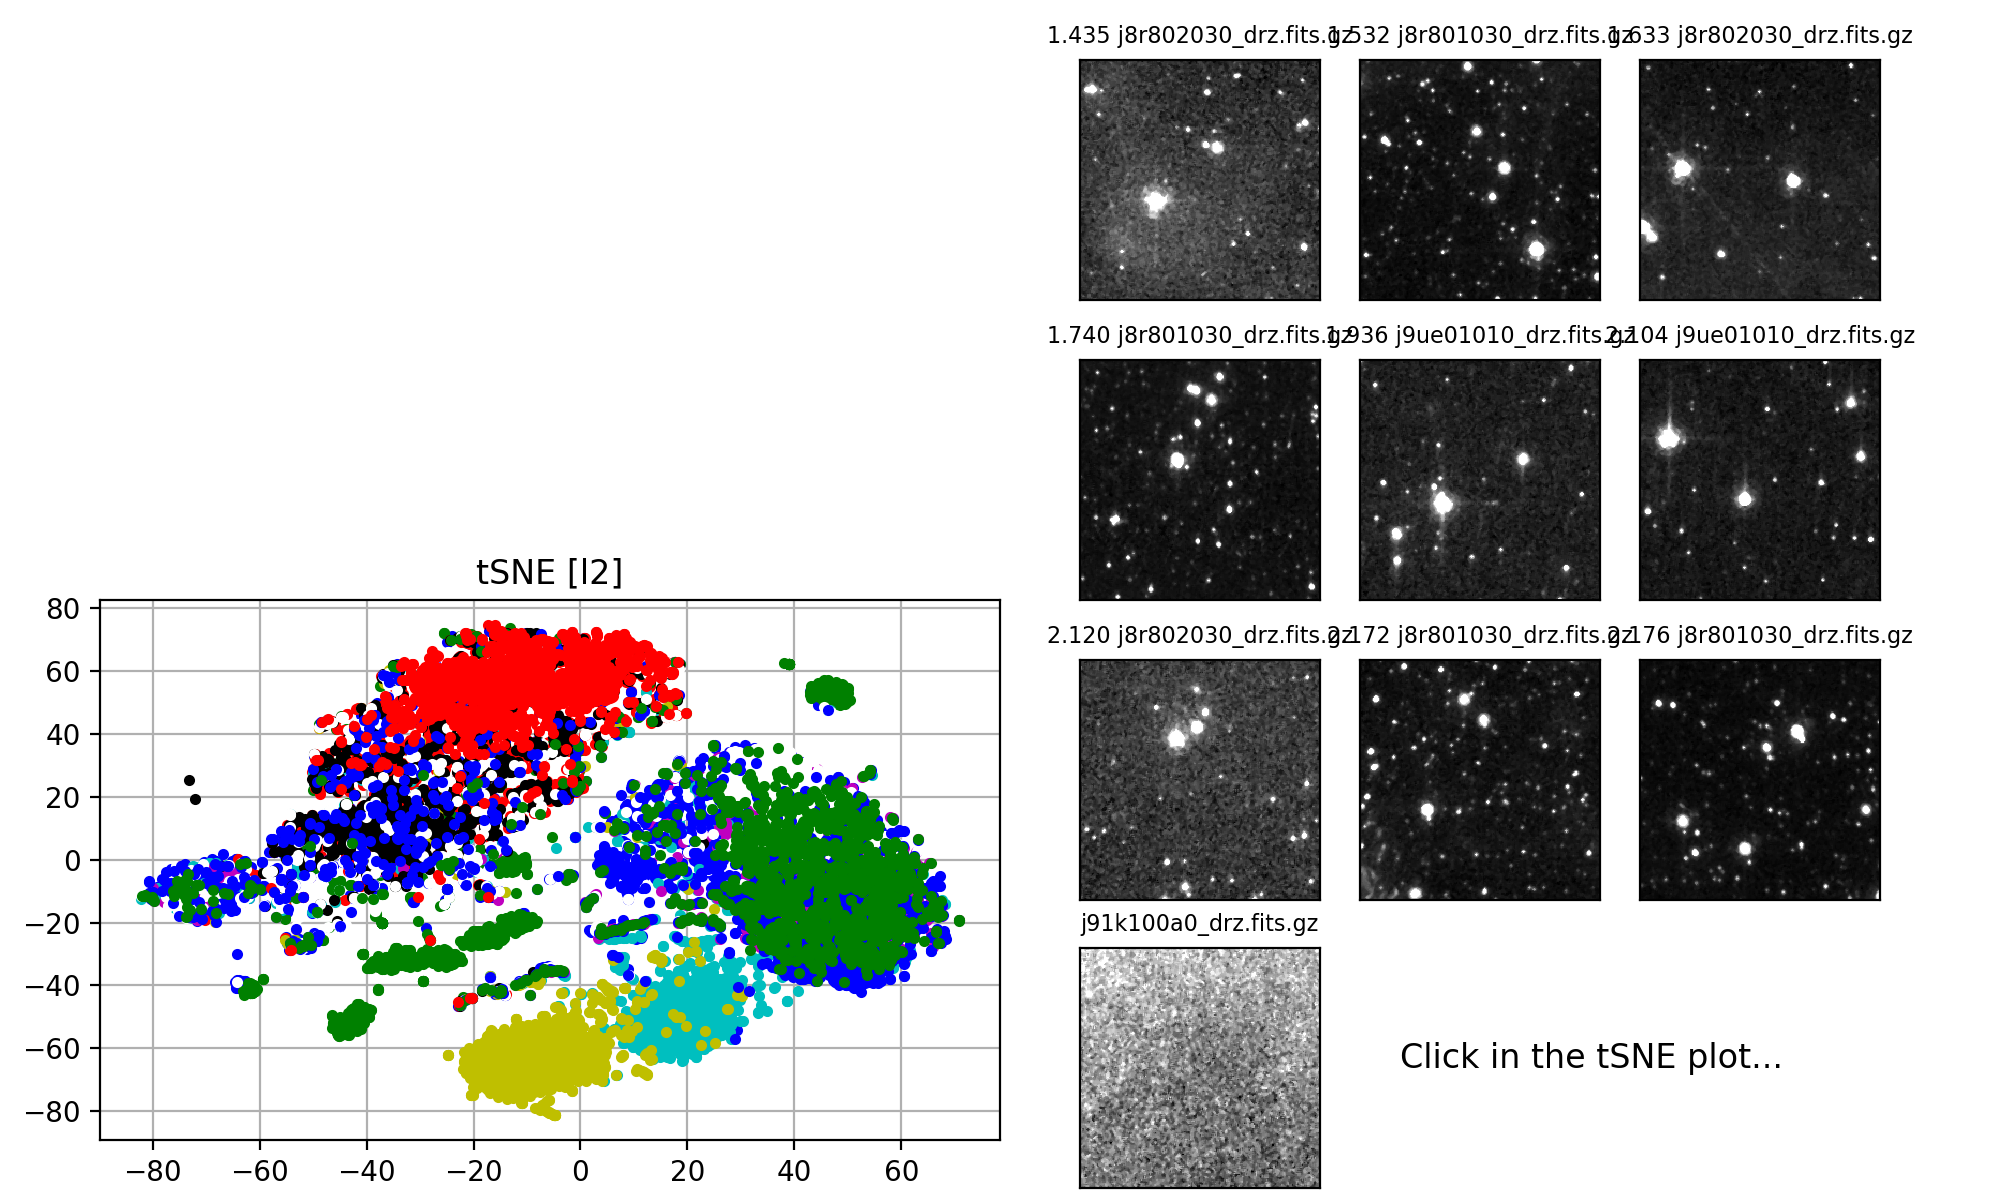

In [15]:
tld.show(tl.fingerprints)